In [34]:
import folium
from folium import IFrame

# Link direto da imagem
img_url = "https://picsum.photos/300/200"  # ou use qualquer outro dos exemplos acima

# HTML para o popup
html = f"""
<div style="width:300px; height:200px;">
  <img src="{img_url}" width="300" height="200" style="object-fit:cover; border-radius:12px;" />
</div>
"""

iframe = IFrame(html, width=320, height=220)
popup = folium.Popup(iframe, max_width=320)

# Coordenadas da Arena TUSCA
coords = [-22.0125, -47.8927]

# Mapa
m = folium.Map(location=coords, zoom_start=16)
folium.Marker(location=coords, popup=popup, tooltip="Arena TUSCA").add_to(m)
m.save("mapa_com_foto_externa.html")

m


In [ ]:
import folium
from folium import IFrame, Popup, Marker, CustomIcon
from folium.plugins import Fullscreen, MiniMap

# Função para gerar card Notion

def gerar_carrossel_minimalista(imagens):
    img_tags = "".join([
        f'<div class="slide"><img src="{url}"></div>' for url in imagens
    ])

    html = f"""
    <style>
    .carousel {{
        width: 270px;
        height: 180px;
        overflow: hidden;
        position: relative;
        border-radius: 10px;
    }}
    .carousel .slide {{
        display: none;
        position: absolute;
        width: 100%;
        height: 100%;
    }}
    .carousel .slide img {{
        width: 100%;
        height: 100%;
        object-fit: cover;
        border-radius: 10px;
    }}
    .carousel .slide.active {{
        display: block;
    }}
    .carousel button {{
        position: absolute;
        top: 50%;
        transform: translateY(-50%);
        background: rgba(255, 255, 255, 0.2);
        border: none;
        font-size: 18px;
        color: white;
        padding: 5px;
        cursor: pointer;
        z-index: 10;
    }}
    .carousel button:hover {{
        background: rgba(0, 0, 0, 0.3);
    }}
    .carousel #prev {{
        left: 5px;
    }}
    .carousel #next {{
        right: 5px;
    }}
    </style>

    <div class="carousel" id="carousel">
        {img_tags}
        <button id="prev">&#10094;</button>
        <button id="next">&#10095;</button>
    </div>

    <script>
    var slides = document.querySelectorAll('.carousel .slide');
    var index = 0;
    slides[index].classList.add('active');

    document.getElementById('prev').onclick = function () {{
        slides[index].classList.remove('active');
        index = (index - 1 + slides.length) % slides.length;
        slides[index].classList.add('active');
    }};
    document.getElementById('next').onclick = function () {{
        slides[index].classList.remove('active');
        index = (index + 1) % slides.length;
        slides[index].classList.add('active');
    }};
    </script>
    """
    return html


# Locais
locais = [
    {
        "titulo": "Arena TUSCA",
        "autor": "Heitor – 2023",
        "img": "fotos/sao-carlos/IMG_2401.JPG",
        "descricao": "Competição esportiva universitária cheia de momentos marcantes.",
        "coord": [-22.0145, -47.8915]
    },
    {
        "titulo": "USP São Carlos",
        "autor": "Heitor – 2022",
        "img": ["https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2497.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
                "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
        ],
        "descricao": "Onde tudo começou, com estudos, amizades e desafios.",
        "coord": [-22.0056, -47.8975]
    }
]

# Mapa base com tema claro
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap")


# Plugins
Fullscreen().add_to(m)
MiniMap(toggle_display=True).add_to(m)

# Adiciona marcadores personalizados
for local in locais:
    html = gerar_carrossel_minimalista(local["img"] if isinstance(local["img"], list) else [local["img"]])
    iframe = IFrame(html, width=300, height=300)
    popup = Popup(iframe, max_width=300)
    marker = Marker(
    location=local["coord"],
    popup=popup,
    tooltip="📍 " + local["titulo"],
).add_to(m)


# Salvar
m.save("mapa_customizado.html")
m



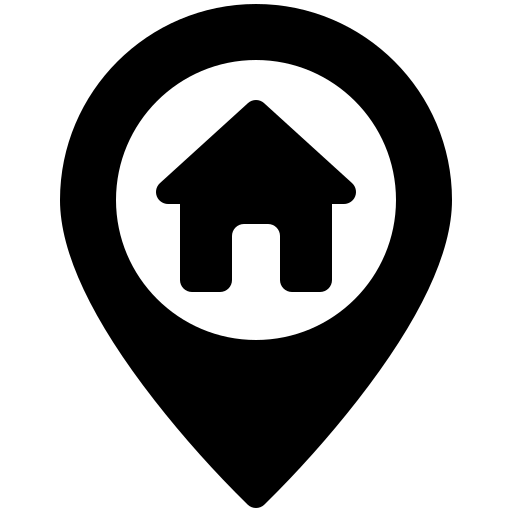

In [7]:
import folium
from folium import IFrame, Popup, Marker, CustomIcon
from folium.plugins import Fullscreen, MiniMap
import uuid

# Função para gerar carrossel minimalista responsivo
icone = CustomIcon(
    icon_image="fotos/icons/home.png",
    icon_size=(32, 32)
)

def gerar_carrossel_minimalista(imagens):
    carousel_id = "carousel_" + str(uuid.uuid4()).replace("-", "")

    img_tags = "".join([
        f'<div class="slide"><img src="{url}"></div>' for url in imagens
    ])

    html = f"""
    <style>
    .carousel {{
        max-width: 260px;
        height: 180px;
        overflow: hidden;
        position: relative;
        border-radius: 12px;
        box-sizing: border-box;
        margin: auto;
        background: white;
    }}
    .carousel .slide {{
        display: none;
        position: absolute;
        width: 100%;
        height: 100%;
    }}
    .carousel .slide img {{
        width: 100%;
        height: 100%;
        object-fit: contain;
        border-radius: 12px;
    }}
    .carousel .slide.active {{
        display: block;
    }}
    .carousel button {{
        position: absolute;
        top: 50%;
        transform: translateY(-50%);
        background: rgba(255, 255, 255, 0.1);
        border: none;
        font-size: 24px;
        color: black;
        padding: 2px 6px;
        cursor: pointer;
        z-index: 10;
        opacity: 0.4;
    }}
    .carousel button:hover {{
        opacity: 1;
    }}
    .carousel .prev {{
        left: 4px;
    }}
    .carousel .next {{
        right: 4px;
    }}
    </style>

    <div class="carousel" id="{carousel_id}">
        {img_tags}
        <button class="prev">&#10094;</button>
        <button class="next">&#10095;</button>
    </div>

    <script>
    (function() {{
        const carousel = document.getElementById("{carousel_id}");
        const slides = carousel.querySelectorAll('.slide');
        let index = 0;
        slides[index].classList.add('active');

        carousel.querySelector('.prev').onclick = () => {{
            slides[index].classList.remove('active');
            index = (index - 1 + slides.length) % slides.length;
            slides[index].classList.add('active');
        }};

        carousel.querySelector('.next').onclick = () => {{
            slides[index].classList.remove('active');
            index = (index + 1) % slides.length;
            slides[index].classList.add('active');
        }};
    }})();
    </script>
    """
    return html

# Lista de locais com múltiplas imagens
locais = [
    {
        "titulo": "Casa",
        "coord" : [-2.4954358267741763, -44.28640375594444],
        "imagens": ["https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG" ],
    },
    {
        "titulo": "USP São Carlos",
        "coord": [-22.040719070964354, -47.86714043645404],
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
        ]
    },
]

# Mapa base
m = folium.Map(zoom_start=14, tiles="OpenStreetMap")

# Plugins úteis
Fullscreen().add_to(m)
MiniMap(toggle_display=True).add_to(m)

# Adiciona os marcadores com carrossel
for local in locais:
    html = gerar_carrossel_minimalista(local["imagens"])
    iframe = IFrame(html, width=280, height=200)
    popup = Popup(iframe, max_width=300, sticky=True)
    marker = Marker(
        location=local["coord"],
        popup=popup,
        tooltip=local["titulo"],
        icon=icone
    ).add_to(m)



# Salvar
m.save("teste.html")
m



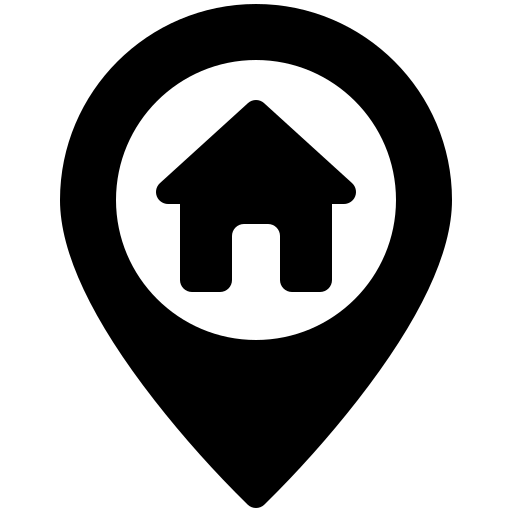

In [2]:
import folium
from folium import IFrame, Popup, Marker, CustomIcon
from folium.plugins import Fullscreen, MiniMap
import uuid

# Função para gerar carrossel minimalista responsivo
icone = CustomIcon(
    icon_image="fotos/icons/home.png",
    icon_size=(32, 32)
)

def gerar_card_spotify(titulo, descricao, imagem_url):
    html = f"""
    <style>
    .spotify-card {{
        width: 280px;
        height: auto;
        background-color: #121212;
        color: #FFFFFF;
        font-family: 'Arial', sans-serif;
        border-radius: 16px;
        overflow: hidden;
        box-shadow: 0 4px 12px rgba(0,0,0,0.4);
    }}
    .spotify-card img {{
        width: 100%;
        height: auto;
        object-fit: cover;
        display: block;
    }}
    .spotify-card .content {{
        padding: 12px 16px;
    }}
    .spotify-card h4 {{
        margin: 0;
        font-size: 16px;
        font-weight: bold;
    }}
    .spotify-card p {{
        margin-top: 4px;
        font-size: 13px;
        color: #b3b3b3;
    }}
    </style>

    <div class="spotify-card">
        <img src="{imagem_url}">
        <div class="content">
            <h4>{titulo}</h4>
            <p>{descricao}</p>
        </div>
    </div>
    """
    return html

# Lista de locais com múltiplas imagens
locais = [
    {
        "titulo": "Casa",
        "coord" : [-2.4954358267741763, -44.28640375594444],
        "imagens": ["https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG" ],
    },
    {
        "titulo": "USP São Carlos",
        "coord": [-22.040719070964354, -47.86714043645404],
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
        ]
    },
]

# Mapa base
m = folium.Map( zoom_start=14, tiles="OpenStreetMap")

# Plugins úteis
Fullscreen().add_to(m)
MiniMap(toggle_display=True).add_to(m)

# Adiciona os marcadores com carrossel
for local in locais:
    html = gerar_card_spotify(local["imagens"],["título"],["descrição"])
    iframe = IFrame(html, width=280, height=200)
    popup = Popup(iframe, max_width=300, sticky=True)
    Marker(
        location=local["coord"],
        popup=popup,
        tooltip=local["titulo"],
        icon=icone
    ).add_to(m)

# Salvar
m.save("teste.html")
m


In [10]:
import folium
from folium import IFrame

# Caminho da imagem (você pode usar uma URL ou codificar com base64 local se preferir)
capa = "https://i.scdn.co/image/ab67616d0000b2734ce9c1fa9fa2aafadd7abff2"  # exemplo Ed Sheeran
musica = "Learning to Fly"
artista = "Pink Floyd"
tempo_atual = "0:15"
tempo_total = "4:52"

# HTML estilizado no estilo Spotify
html = f"""
<div style="background-color: #181818; color: white; width: 250px; padding: 15px; font-family: Arial, sans-serif; border-radius: 10px;">
    <div style="display: flex; justify-content: center;">
        <img src="{capa}" style="width: 100%; border-radius: 12px; box-shadow: 0 4px 8px rgba(0,0,0,0.5);">
    </div>
    <div style="margin-top: 10px; text-align: center;">
        <div style="font-weight: bold; font-size: 14px;">{musica}</div>
        <div style="color: #b3b3b3; font-size: 12px;">{artista}</div>
    </div>
    <div style="margin-top: 10px;">
        <div style="height: 4px; background-color: #404040; border-radius: 2px; overflow: hidden;">
            <div style="width: 6%; height: 100%; background-color: #1DB954;"></div>
        </div>
        <div style="display: flex; justify-content: space-between; font-size: 10px; color: #b3b3b3; margin-top: 2px;">
            <span>{tempo_atual}</span><span>{tempo_total}</span>
        </div>
    </div>
    <div style="margin-top: 12px; display: flex; justify-content: center; gap: 10px;">
        <span style="font-size: 14px;">⏮️</span>
        <span style="font-size: 18px;">⏯️</span>
        <span style="font-size: 14px;">⏭️</span>
    </div>
</div>
"""

# Cria o popup com o HTML
iframe = IFrame(html, width=270, height=330)
popup = folium.Popup(iframe, max_width=270)

# Mapa e marcador
m = folium.Map(location=[-23.55, -46.63], zoom_start=12)
folium.Marker(
    location=[-23.55, -46.63],
    popup=popup,
    tooltip="▶️ Pink Floyd - Learning to Fly"
).add_to(m)

# Salva
m.save("popup_spotify.html")
m

In [13]:
from folium import Map, Marker, Popup, IFrame
import folium

# Lista de imagens fornecidas
imagens = [
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
]

# Criar carrossel HTML
img_tags = "".join([
    f'<div class="slide"><img src="{url}" style="width:100%; height: 160px; object-fit: cover;"></div>' for url in imagens
])

# HTML final para o popup com player de áudio, barra de progresso, carrossel
html = f"""
<div style="background-color: #181818; color: white; width: 270px; font-family: Arial, sans-serif; border-radius: 10px; padding: 10px;">
    <div class="carousel" style="position: relative; height: 160px; overflow: hidden; border-radius: 10px;">
        {img_tags}
    </div>
    <div style="margin-top: 10px; text-align: center;">
        <div style="font-weight: bold;">Minha música</div>
        <div style="color: gray;">Artista Desconhecido</div>
    </div>
    <input type="range" id="progressBar" value="0" style="width: 100%; margin-top: 8px;">
    <div style="display: flex; justify-content: space-between; font-size: 10px; color: #b3b3b3;">
        <span id="currentTime">0:00</span>
        <span id="duration">3:21</span>
    </div>
    <div style="text-align: center; margin-top: 8px;">
        <button onclick="togglePlay()" style="background: none; border: none; color: white; font-size: 20px;">⏯️</button>
    </div>
    <audio id="audio" src="https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"></audio>
    <script>
        const audio = document.getElementById('audio');
        const progressBar = document.getElementById('progressBar');
        const currentTimeEl = document.getElementById('currentTime');
        const durationEl = document.getElementById('duration');

        audio.addEventListener('loadedmetadata', () => {{
            progressBar.max = audio.duration;
            durationEl.innerText = formatTime(audio.duration);
        }});

        audio.addEventListener('timeupdate', () => {{
            progressBar.value = audio.currentTime;
            currentTimeEl.innerText = formatTime(audio.currentTime);
        }});

        progressBar.addEventListener('input', () => {{
            audio.currentTime = progressBar.value;
        }});

        function togglePlay() {{
            if (audio.paused) {{
                audio.play();
            }} else {{
                audio.pause();
            }}
        }}

        function formatTime(sec) {{
            const m = Math.floor(sec / 60);
            const s = Math.floor(sec % 60).toString().padStart(2, '0');
            return `${{m}}:${{s}}`;
        }}

        // Carrossel
        let slideIndex = 0;
        const slides = document.querySelectorAll('.slide');
        function showSlides() {{
            for (let i = 0; i < slides.length; i++) {{
                slides[i].style.display = "none";
            }}
            slideIndex++;
            if (slideIndex > slides.length) {{ slideIndex = 1; }}
            slides[slideIndex - 1].style.display = "block";
            setTimeout(showSlides, 2500);
        }}
        showSlides();
    </script>
</div>
"""

# Incorporar no mapa
iframe = IFrame(html, width=290, height=400)
popup = Popup(iframe, max_width=300)

m = Map(location=[-22.0056, -47.8977], zoom_start=13)
Marker(location=[-22.0056, -47.8977], popup=popup, tooltip="Clique para ver o popup estilo Spotify").add_to(m)

# Salvar o HTML
m.save("popup_spotify_avancado.html")
m


In [20]:
from folium import Map, Marker, Popup, IFrame

# Lista de imagens fornecidas
imagens = [
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
]

# Criar carrossel HTML
img_tags = "".join([
    f'<div class="slide"><img src="{url}" style="width:100%; height: 250px; object-fit: cover;"></div>' for url in imagens
])

# HTML final com tamanho adaptado ao conteúdo estilo player Spotify
html = f"""
<html>
<head>
<style>
body {{
    margin: 0;
    padding: 0;
    background-color: black;
    overflow: hidden;
}}
</style>
</head>
<body>
<div style="background-color: #000; color: white; width: 300px; font-family: Arial, sans-serif; border-radius: 10px; padding: 10px;">
    <div class="carousel" style="position: relative; height: 250px; overflow: hidden; border-radius: 10px;">
        {img_tags}
    </div>
    <div style="margin-top: 10px; text-align: center;">
        <div style="font-weight: bold; font-size: 16px;">Minha música</div>
        <div style="color: gray; font-size: 13px;">Artista Desconhecido</div>
    </div>
    <input type="range" id="progressBar" value="0" style="width: 100%; margin-top: 8px;">
    <div style="display: flex; justify-content: space-between; font-size: 10px; color: #b3b3b3;">
        <span id="currentTime">0:00</span>
        <span id="duration">6:12</span>
    </div>
    <div style="text-align: center; margin-top: 8px;">
        <button onclick="togglePlay()" style="background: none; border: none; color: white; font-size: 20px;">⏯️</button>
    </div>
    <audio id="audio" src="https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"></audio>
</div>
<script>
    const audio = document.getElementById('audio');
    const progressBar = document.getElementById('progressBar');
    const currentTimeEl = document.getElementById('currentTime');
    const durationEl = document.getElementById('duration');

    audio.addEventListener('loadedmetadata', () => {{
        progressBar.max = audio.duration;
        durationEl.innerText = formatTime(audio.duration);
    }});

    audio.addEventListener('timeupdate', () => {{
        progressBar.value = audio.currentTime;
        currentTimeEl.innerText = formatTime(audio.currentTime);
    }});

    progressBar.addEventListener('input', () => {{
        audio.currentTime = progressBar.value;
    }});

    function togglePlay() {{
        if (audio.paused) {{
            audio.play();
        }} else {{
            audio.pause();
        }}
    }}

    function formatTime(sec) {{
        const m = Math.floor(sec / 60);
        const s = Math.floor(sec % 60).toString().padStart(2, '0');
        return `${{m}}:${{s}}`;
    }}

    let slideIndex = 0;
    const slides = document.querySelectorAll('.slide');
    function showSlides() {{
        for (let i = 0; i < slides.length; i++) {{
            slides[i].style.display = "none";
        }}
        slideIndex++;
        if (slideIndex > slides.length) {{ slideIndex = 1; }}
        slides[slideIndex - 1].style.display = "block";
        setTimeout(showSlides, 3000);
    }}
    showSlides();
</script>
</body>
</html>
"""

# Redimensionar o popup para caber perfeitamente ao conteúdo
iframe = IFrame(html, width=320, height=430)
popup = Popup(iframe, max_width=330, color="black")

m = Map(location=[-22.0056, -47.8977], zoom_start=13)
Marker(location=[-22.0056, -47.8977], popup=popup, tooltip="▶️ Reproduzir música").add_to(m)

# Salvar o HTML final
m.save("popup_spotify_tamanho_perfeito.html")

m

In [34]:
from folium import Map, Marker, Popup, IFrame, Element

# Lista de imagens fornecidas
imagens = [
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
]

# Criar carrossel HTML
img_tags = "".join([
    f'<div class="slide"><img src="{url}" style="width:100%; height: 250px; object-fit: cover;"></div>' for url in imagens
])

# HTML com fundo preto absoluto (inclusive bordas externas)
html = f"""
<html>
<head>
<style>
html, body {{
    margin: 0;
    padding: 0;
    background-color: black;
    overflow: hidden;
}}
</style>
</head>
<body>
<div style="background-color: black; color: white; width: 300px; font-family: Arial, sans-serif; padding: 10px; box-sizing: border-box;">
    <div class="carousel" style="position: relative; height: 250px; overflow: hidden; border-radius: 10px;">
        {img_tags}
    </div>
    <div style="margin-top: 10px; text-align: center;">
        <div style="font-weight: bold; font-size: 16px;">Minha música</div>
        <div style="color: gray; font-size: 13px;">Artista Desconhecido</div>
    </div>
    <input type="range" id="progressBar" value="0" style="width: 100%; margin-top: 8px;">
    <div style="display: flex; justify-content: space-between; font-size: 10px; color: #b3b3b3;">
        <span id="currentTime">0:00</span>
        <span id="duration">6:12</span>
    </div>
    <div style="text-align: center; margin-top: 8px;">
        <button onclick="togglePlay()" style="background: none; border: none; color: white; font-size: 20px;">⏯️</button>
    </div>
    <audio id="audio" src="https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"></audio>
</div>
<script>
    const audio = document.getElementById('audio');
    const progressBar = document.getElementById('progressBar');
    const currentTimeEl = document.getElementById('currentTime');
    const durationEl = document.getElementById('duration');

    audio.addEventListener('loadedmetadata', () => {{
        progressBar.max = audio.duration;
        durationEl.innerText = formatTime(audio.duration);
    }});

    audio.addEventListener('timeupdate', () => {{
        progressBar.value = audio.currentTime;
        currentTimeEl.innerText = formatTime(audio.currentTime);
    }});

    progressBar.addEventListener('input', () => {{
        audio.currentTime = progressBar.value;
    }});

    function togglePlay() {{
        if (audio.paused) {{
            audio.play();
        }} else {{
            audio.pause();
        }}
    }}

    function formatTime(sec) {{
        const m = Math.floor(sec / 60);
        const s = Math.floor(sec % 60).toString().padStart(2, '0');
        return `${{m}}:${{s}}`;
    }}

    let slideIndex = 0;
    const slides = document.querySelectorAll('.slide');
    function showSlides() {{
        for (let i = 0; i < slides.length; i++) {{
            slides[i].style.display = "none";
        }}
        slideIndex++;
        if (slideIndex > slides.length) {{ slideIndex = 1; }}
        slides[slideIndex - 1].style.display = "block";
        setTimeout(showSlides, 3000);
    }}
    showSlides();
</script>
</body>
</html>
"""

# Redimensionar o popup para caber perfeitamente ao conteúdo, incluindo bordas pretas
iframe = IFrame(html, width=320, height=450,)
popup = Popup(iframe, max_width=330)

m = Map(location=[-22.0056, -47.8977], zoom_start=13)
Marker(location=[-22.0056, -47.8977], popup=popup, tooltip="▶️ Reproduzir música").add_to(m)

css = """
<style>
.leaflet-popup-content-wrapper {
    background: black !important;
    color: white !important;
    box-shadow: none !important;
    border-radius: 16px !important;
    padding: 0px !important;
}
.leaflet-popup-tip {
    background: black !important;
}
</style>
"""

# Injetar CSS no HTML final
m.get_root().html.add_child(Element(css))

# Salvar o HTML final
m.save("popup_spotify_bordas_pretas.html")

m

In [ ]:
import folium
from folium import IFrame, Popup, Element

# HTML do conteúdo interno do popup
html = """
<div style="background-color: black; color: white; width: 260px; height: 310px; padding: 10px; box-sizing: border-box; border-radius: 12px; font-family: Arial, sans-serif;">
    <div style="display: flex; justify-content: center;">
        <img src="https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG" style="width: 240px; height: 240px; border-radius: 8px; object-fit: cover;">
    </div>
    <h3 style="text-align: center; margin: 8px 0 2px 0; font-size: 16px;">Minha Música</h3>
    <p style="text-align: center; margin: 0; font-size: 12px; color: #bbb;">Artista Desconhecido</p>
    <div style="margin-top: 10px; display: flex; justify-content: center; gap: 15px;">
        <button onclick="anterior()" style="background: none; border: none; font-size: 18px; color: white;">⏮️</button>
        <button onclick="togglePlay()" style="background: none; border: none; font-size: 22px; color: white;">▶️</button>
        <button onclick="proxima()" style="background: none; border: none; font-size: 18px; color: white;">⏭️</button>
    </div>
    <audio id="audio" src="https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"></audio>
</div>

<script>
    const audio = document.getElementById('audio');

    function togglePlay() {
        if (audio.paused) {
            audio.play();
        } else {
            audio.pause();
        }
    }

    function anterior() {
        audio.currentTime = 0;
    }

    function proxima() {
        audio.currentTime = audio.duration; 
    }
</script>
"""

# Criar o iframe e o popup
iframe = IFrame(html, width=280, height=350)
popup = Popup(iframe, max_width=300)

# Criar o mapa
m = folium.Map(location=[-22.0056, -47.8977], zoom_start=13)
folium.Marker(location=[-22.0056, -47.8977], popup=popup).add_to(m)

# CSS customizado para o estilo externo do popup do Leaflet
css = """
<style>
.leaflet-popup-content-wrapper {
    background: black !important;
    color: white !important;
    box-shadow: none !important;
    border-radius: 16px !important;
    padding: 0px !important;
}
.leaflet-popup-tip {
    background: black !important;
}
</style>
"""

# Injetar o CSS no mapa
m.get_root().html.add_child(Element(css))

# Salvar
m.save("popup_com_icone_imagem_centrada_borda_arredondada.html")

m

In [41]:
from folium import Map, Marker, Popup, IFrame, Element

# Lista de imagens fornecidas
imagens = [
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
]

# Criar carrossel HTML
img_tags = "".join([
    f'<div class="slide"><img src="{url}" style="width:100%; height: 240px; object-fit: cover; display: block; margin: auto; border-radius: 10px;"></div>' for url in imagens
])

# HTML com ajustes refinados
html = f"""
<html>
<head>
<style>
html, body {{
    margin: 0;
    padding: 0;
    background-color: black;
    overflow: hidden;
    font-family: Arial, sans-serif;
}}
button {{
    background: none;
    border: none;
    color: white;
    font-size: 20px;
    cursor: pointer;
}}
</style>
</head>
<body>
<div style="background-color: black; color: white; width: 300px; padding: 10px; box-sizing: border-box; border-radius: 18px;">
    <div class="carousel" style="position: relative; height: 240px; overflow: hidden; border-radius: 12px; justify-content: center; align-items: center;">
        {img_tags}
    </div>
    <div style="margin-top: 10px; text-align: center;">
        <div style="font-weight: bold; font-size: 16px;">Minha música</div>
        <div style="color: gray; font-size: 13px;">Artista Desconhecido</div>
    </div>
    <input type="range" id="progressBar" value="0" style="width: 100%; margin-top: 8px;">
    <div style="display: flex; justify-content: space-between; font-size: 10px; color: #b3b3b3;">
        <span id="currentTime">0:00</span>
        <span id="duration">6:12</span>
    </div>
    <div style="text-align: center; margin-top: 8px; display: flex; justify-content: center; gap: 16px;">
        <button onclick="anterior()">⏮</button>
        <button onclick="togglePlay()">⏵</button>
        <button onclick="proxima()">⏭</button>
    </div>
    <audio id="audio" src="https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"></audio>
</div>
<script>
    const audio = document.getElementById('audio');
    const progressBar = document.getElementById('progressBar');
    const currentTimeEl = document.getElementById('currentTime');
    const durationEl = document.getElementById('duration');

    audio.addEventListener('loadedmetadata', () => {{
        progressBar.max = audio.duration;
        durationEl.innerText = formatTime(audio.duration);
    }});

    audio.addEventListener('timeupdate', () => {{
        progressBar.value = audio.currentTime;
        currentTimeEl.innerText = formatTime(audio.currentTime);
    }});

    progressBar.addEventListener('input', () => {{
        audio.currentTime = progressBar.value;
    }});

    function togglePlay() {{
        if (audio.paused) {{
            audio.play();
        }} else {{
            audio.pause();
        }}
    }}

    function anterior() {{
        audio.currentTime = 0;
    }}

    function proxima() {{
        audio.currentTime = audio.duration;
    }}

    function formatTime(sec) {{
        const m = Math.floor(sec / 60);
        const s = Math.floor(sec % 60).toString().padStart(2, '0');
        return `${{m}}:${{s}}`;
    }}

    let slideIndex = 0;
    const slides = document.querySelectorAll('.slide');
    function showSlides() {{
        for (let i = 0; i < slides.length; i++) {{
            slides[i].style.display = "none";
        }}
        slideIndex++;
        if (slideIndex > slides.length) {{ slideIndex = 1; }}
        slides[slideIndex - 1].style.display = "block";
        setTimeout(showSlides, 3000);
    }}
    showSlides();
</script>
</body>
</html>
"""

# Redimensionar o popup para caber perfeitamente ao conteúdo
iframe = IFrame(html, width=320, height=460)
popup = Popup(iframe, max_width=330)

m = Map(location=[-22.0056, -47.8977], zoom_start=13)
Marker(location=[-22.0056, -47.8977], popup=popup, tooltip="▶️ Reproduzir música").add_to(m)

# CSS global do Leaflet para bordas arredondadas e fundo preto
css = """
<style>
.leaflet-popup-content-wrapper {
    background: black !important;
    color: white !important;
    box-shadow: none !important;
    border-radius: 18px !important;
    padding: 0px !important;
}
.leaflet-popup-tip {
    background: black !important;
}
</style>
"""

m.get_root().html.add_child(Element(css))
m.save("popup_ajustado_finalmente_igual.html")
m

In [39]:
from folium import Map, Marker, Popup, IFrame, Element

# Lista de imagens fornecidas
imagens = [
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
    "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
]

# Criar carrossel HTML
img_tags = "".join([
    f'<div class="slide"><img src="{url}" style="width:100%; height: 240px; object-fit: cover; display: block; margin: auto; border-radius: 10px;"></div>' for url in imagens
])

# HTML ajustado com menos espaço abaixo do play e centralização refinada
html = f"""
<html>
<head>
<style>
html, body {{
    margin: 0;
    padding: 0;
    background-color: black;
    overflow: hidden;
    font-family: Arial, sans-serif;
}}
button {{
    background: none;
    border: none;
    color: white;
    font-size: 20px;
    cursor: pointer;
}}
</style>
</head>
<body>
<div style="background-color: black; color: white; width: 300px; padding: 10px; box-sizing: border-box; border-radius: 18px;">
    <div class="carousel" style="position: relative; height: 240px; overflow: hidden; border-radius: 12px;">
        {img_tags}
    </div>
    <div style="margin-top: 10px; text-align: center;">
        <div style="font-weight: bold; font-size: 16px;">Minha música</div>
        <div style="color: gray; font-size: 13px;">Artista Desconhecido</div>
    </div>
    <input type="range" id="progressBar" value="0" style="width: 100%; margin-top: 8px;">
    <div style="display: flex; justify-content: space-between; font-size: 10px; color: #b3b3b3; margin-bottom: 4px;">
        <span id="currentTime">0:00</span>
        <span id="duration">6:12</span>
    </div>
    <div style="text-align: center; margin-top: 4px; margin-bottom: 4px; display: flex; justify-content: center; gap: 16px;">
        <button onclick="anterior()">⏮</button>
        <button onclick="togglePlay()" style="font-size: 22px;">⏵</button>
        <button onclick="proxima()">⏭</button>
    </div>
    <audio id="audio" src="https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"></audio>
</div>
<script>
    const audio = document.getElementById('audio');
    const progressBar = document.getElementById('progressBar');
    const currentTimeEl = document.getElementById('currentTime');
    const durationEl = document.getElementById('duration');

    audio.addEventListener('loadedmetadata', () => {{
        progressBar.max = audio.duration;
        durationEl.innerText = formatTime(audio.duration);
    }});

    audio.addEventListener('timeupdate', () => {{
        progressBar.value = audio.currentTime;
        currentTimeEl.innerText = formatTime(audio.currentTime);
    }});

    progressBar.addEventListener('input', () => {{
        audio.currentTime = progressBar.value;
    }});

    function togglePlay() {{
        if (audio.paused) {{
            audio.play();
        }} else {{
            audio.pause();
        }}
    }}

    function anterior() {{
        audio.currentTime = 0;
    }}

    function proxima() {{
        audio.currentTime = audio.duration;
    }}

    function formatTime(sec) {{
        const m = Math.floor(sec / 60);
        const s = Math.floor(sec % 60).toString().padStart(2, '0');
        return `${{m}}:${{s}}`;
    }}

    let slideIndex = 0;
    const slides = document.querySelectorAll('.slide');
    function showSlides() {{
        for (let i = 0; i < slides.length; i++) {{
            slides[i].style.display = "none";
        }}
        slideIndex++;
        if (slideIndex > slides.length) {{ slideIndex = 1; }}
        slides[slideIndex - 1].style.display = "block";
        setTimeout(showSlides, 3000);
    }}
    showSlides();
</script>
</body>
</html>
"""

# Ajustar altura total do iframe para reduzir espaço extra
iframe = IFrame(html, width=320, height=430)
popup = Popup(iframe, max_width=330)

m = Map(location=[-22.0056, -47.8977], zoom_start=13)
Marker(location=[-22.0056, -47.8977], popup=popup, tooltip="▶️ Reproduzir música").add_to(m)

# CSS global para bordas arredondadas e fundo preto
css = """
<style>
.leaflet-popup-content-wrapper {
    background: black !important;
    color: white !important;
    box-shadow: none !important;
    border-radius: 18px !important;
    padding: 0px !important;
}
.leaflet-popup-tip {
    background: black !important;
}
</style>
"""

m.get_root().html.add_child(Element(css))
m.save("popup_menor_espaco_play.html")
m

In [43]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "Minha música em São Carlos",
            "artista": "Artista Desconhecido",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG"
        ]
    }
]

def criar_mapa_com_localidades(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: black !important;
        color: white !important;
        box-shadow: none !important;
        border-radius: 18px !important;
        padding: 0px !important;
    }
    .leaflet-popup-tip {
        background: black !important;
    }
    </style>
    """
    m.get_root().html.add_child(Element(css_global))

    for local in localidades:
        img_tags = "".join([
            f'<div class="slide"><img src="{url}" style="width:100%; height: 240px; object-fit: cover; display: block; margin: auto; border-radius: 10px;"></div>'
            for url in local["imagens"]
        ])

        html = f"""
        <html>
        <head>
        <style>
        html, body {{
            margin: 0;
            padding: 0;
            background-color: black;
            overflow: hidden;
            font-family: Arial, sans-serif;
        }}
        button {{
            background: none;
            border: none;
            color: white;
            font-size: 20px;
            cursor: pointer;
        }}
        </style>
        </head>
        <body>
        <div style="background-color: black; color: white; width: 300px; padding: 10px; box-sizing: border-box; border-radius: 18px;">
            <div class="carousel" style="display: flex; justify-content: center; align-items: center; position: relative; height: 240px; overflow: hidden; border-radius: 12px;">
                {img_tags}
            </div>
            <div style="margin-top: 10px; text-align: center;">
                <div style="font-weight: bold; font-size: 16px;">{local['musica']['titulo']}</div>
                <div style="color: gray; font-size: 13px;">{local['musica']['artista']}</div>
            </div>
            <input type="range" id="progressBar" value="0" style="width: 100%; margin-top: 8px;">
            <div style="display: flex; justify-content: space-between; font-size: 10px; color: #b3b3b3;">
                <span id="currentTime">0:00</span>
                <span id="duration">0:00</span>
            </div>
            <div style="margin-top: 8px; display: flex; justify-content: center; align-items: center; gap: 16px;">
                <button onclick="anterior()">⏮</button>
                <button onclick="togglePlay()">⏵</button>
                <button onclick="proxima()">⏭</button>
            </div>
            <audio id="audio" src="{local['musica']['url']}"></audio>
        </div>

        <script>
        const audio = document.getElementById('audio');
        const progressBar = document.getElementById('progressBar');
        const currentTimeEl = document.getElementById('currentTime');
        const durationEl = document.getElementById('duration');

        audio.addEventListener('loadedmetadata', () => {{
            progressBar.max = audio.duration;
            durationEl.innerText = formatTime(audio.duration);
        }});

        audio.addEventListener('timeupdate', () => {{
            progressBar.value = audio.currentTime;
            currentTimeEl.innerText = formatTime(audio.currentTime);
        }});

        progressBar.addEventListener('input', () => {{
            audio.currentTime = progressBar.value;
        }});

        function togglePlay() {{
            if (audio.paused) {{
                audio.play();
            }} else {{
                audio.pause();
            }}
        }}

        function anterior() {{
            audio.currentTime = 0;
        }}

        function proxima() {{
            audio.currentTime = audio.duration;
        }}

        function formatTime(sec) {{
            const m = Math.floor(sec / 60);
            const s = Math.floor(sec % 60).toString().padStart(2, '0');
            return `${{m}}:${{s}}`;
        }}

        let slideIndex = 0;
        const slides = document.querySelectorAll('.slide');
        function showSlides() {{
            for (let i = 0; i < slides.length; i++) {{
                slides[i].style.display = "none";
            }}
            slideIndex++;
            if (slideIndex > slides.length) {{ slideIndex = 1; }}
            slides[slideIndex - 1].style.display = "block";
            setTimeout(showSlides, 3000);
        }}
        showSlides();
        </script>
        </body>
        </html>
        """

        iframe = IFrame(html, width=320, height=460)
        popup = Popup(iframe, max_width=330)
        Marker(location=[local["lat"], local["lon"]], popup=popup, tooltip=f"▶️ {local['nome']}").add_to(m)

    return m

# Gerar o mapa com os dados fornecidos
mapa_final = criar_mapa_com_localidades(localidades)
output_path = "mapa_com_musicas_e_fotos.html"
mapa_final.save(output_path)
mapa_final


In [44]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "Minha música em São Carlos",
            "artista": "Artista Desconhecido",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG"
        ]
    }
]

def criar_mapa_com_localidades(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: black !important;
        color: white !important;
        box-shadow: none !important;
        border-radius: 18px !important;
        padding: 0px !important;
    }
    .leaflet-popup-tip {
        background: black !important;
    }
    </style>
    """
    m.get_root().html.add_child(Element(css_global))

    for local in localidades:
        img_tags = "".join([
            f'<div class="slide"><img src="{url}" style="width:100%; height: 240px; object-fit: cover; display: block; margin: auto; border-radius: 10px;"></div>'
            for url in local["imagens"]
        ])

        html = f"""
<html>
<head>
<style>
html, body {{
    margin: 0;
    padding: 0;
    background-color: black;
    overflow: hidden;
    font-family: Arial, sans-serif;
}}
button {{
    background: none;
    border: none;
    color: white;
    font-size: 18px;
    cursor: pointer;
}}
</style>
</head>
<body>
<div style="background-color: black; color: white; width: 240px; padding: 10px; box-sizing: border-box; border-radius: 14px;">
    <div class="carousel" style="position: relative; height: 200px; overflow: hidden; border-radius: 10px;">
        {"".join([f'<div class="slide" style="text-align: center;"><img src="{url}" style="width:100%; height: 200px; object-fit: cover; border-radius: 10px;"></div>' for url in imagens])}
    </div>
    <div style="margin-top: 6px; text-align: center;">
        <div style="font-weight: bold; font-size: 14px;">Minha Música</div>
        <div style="color: gray; font-size: 11px;">Artista Desconhecido</div>
    </div>
    <div style="text-align: center; margin-top: 8px; display: flex; justify-content: center; gap: 12px;">
        <button onclick="anterior()">⏮️</button>
        <button onclick="togglePlay()">▶️</button>
        <button onclick="proxima()">⏭️</button>
    </div>
    <audio id="audio" src="https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"></audio>
</div>

<script>
    const audio = document.getElementById('audio');

    function togglePlay() {{
        if (audio.paused) {{
            audio.play();
        }} else {{
            audio.pause();
        }}
    }}

    function anterior() {{
        audio.currentTime = 0;
    }}

    function proxima() {{
        audio.currentTime = audio.duration;
    }}

    // Carrossel
    let slideIndex = 0;
    const slides = document.querySelectorAll('.slide');
    function showSlides() {{
        slides.forEach(slide => slide.style.display = "none");
        slideIndex = (slideIndex + 1) % slides.length;
        slides[slideIndex].style.display = "block";
        setTimeout(showSlides, 3000);
    }}
    showSlides();
</script>
</body>
</html>
"""
        iframe = IFrame(html, width=320, height=460)
        popup = Popup(iframe, max_width=330)
        Marker(location=[local["lat"], local["lon"]], popup=popup, tooltip=f"▶️ {local['nome']}").add_to(m)

    return m

# Gerar o mapa com os dados fornecidos
mapa_final = criar_mapa_com_localidades(localidades)
output_path = "mapa_com_musicas_e_fotos.html"
mapa_final.save(output_path)
mapa_final


In [45]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "Minha música em São Carlos",
            "artista": "Artista Desconhecido",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG"
        ]
    }
]

def criar_mapa_spotify_style(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    # CSS global para estilizar os popups
    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: linear-gradient(135deg, #1db954, #191414) !important;
        color: white !important;
        box-shadow: 0 8px 32px rgba(0, 0, 0, 0.4) !important;
        border-radius: 16px !important;
        padding: 0px !important;
        border: 1px solid rgba(255, 255, 255, 0.1) !important;
    }
    .leaflet-popup-tip {
        background: #191414 !important;
        border: none !important;
    }
    .leaflet-popup-close-button {
        color: white !important;
        font-size: 20px !important;
        font-weight: bold !important;
        right: 8px !important;
        top: 8px !important;
    }
    </style>
    """
    m.get_root().html.add_child(Element(css_global))

    for local in localidades:
        html = f"""
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Circular:wght@300;400;500;600;700&display=swap');

* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}

body {{
    font-family: 'Circular', -apple-system, BlinkMacSystemFont, sans-serif;
    background: linear-gradient(135deg, #1db954 0%, #191414 100%);
    color: white;
    overflow: hidden;
    width: 300px;
    height: 400px;
}}

.spotify-player {{
    width: 300px;
    height: 400px;
    background: linear-gradient(135deg, #1db954 0%, #191414 60%);
    border-radius: 12px;
    overflow: hidden;
    position: relative;
    box-shadow: 0 8px 32px rgba(0, 0, 0, 0.3);
}}

.album-art {{
    width: 100%;
    height: 200px;
    position: relative;
    overflow: hidden;
}}

.album-art img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
    transition: transform 0.3s ease;
}}

.album-art:hover img {{
    transform: scale(1.05);
}}

.gradient-overlay {{
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    height: 60px;
    background: linear-gradient(transparent, rgba(25, 20, 20, 0.8));
}}

.track-info {{
    padding: 20px;
    text-align: center;
}}

.track-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 4px;
    color: #ffffff;
    text-shadow: 0 2px 4px rgba(0, 0, 0, 0.3);
}}

.artist-name {{
    font-size: 14px;
    color: #b3b3b3;
    font-weight: 400;
    margin-bottom: 20px;
}}

.progress-container {{
    margin: 15px 20px;
}}

.progress-bar {{
    width: 100%;
    height: 4px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 2px;
    overflow: hidden;
}}

.progress-fill {{
    height: 100%;
    background: #1db954;
    width: 0%;
    transition: width 0.1s ease;
    border-radius: 2px;
}}

.controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 25px;
    padding: 0 20px 20px;
}}

.control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 20px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 16px;
    width: 48px;
    height: 48px;
}}

.play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.location-tag {{
    position: absolute;
    top: 10px;
    left: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 4px 8px;
    border-radius: 12px;
    font-size: 11px;
    font-weight: 500;
    backdrop-filter: blur(10px);
}}

.slide-indicator {{
    position: absolute;
    bottom: 10px;
    right: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 2px 6px;
    border-radius: 8px;
    font-size: 10px;
    backdrop-filter: blur(10px);
}}

@keyframes pulse {{
    0% {{ transform: scale(1); }}
    50% {{ transform: scale(1.05); }}
    100% {{ transform: scale(1); }}
}}

.playing .play-btn {{
    animation: pulse 2s infinite;
}}
</style>
</head>
<body>
<div class="spotify-player" id="player">
    <div class="album-art">
        <div class="location-tag">📍 {local['nome']}</div>
        <div class="slide-indicator" id="slideIndicator">1/{len(local['imagens'])}</div>
        <div class="gradient-overlay"></div>
        <img id="albumImage" src="{local['imagens'][0]}" alt="Album Art">
    </div>
    
    <div class="track-info">
        <div class="track-title">{local['musica']['titulo']}</div>
        <div class="artist-name">{local['musica']['artista']}</div>
    </div>
    
    <div class="progress-container">
        <div class="progress-bar">
            <div class="progress-fill" id="progressFill"></div>
        </div>
    </div>
    
    <div class="controls">
        <button class="control-btn" onclick="previousImage()" title="Imagem anterior">⏮</button>
        <button class="control-btn play-btn" id="playBtn" onclick="togglePlay()" title="Play/Pause">▶</button>
        <button class="control-btn" onclick="nextImage()" title="Próxima imagem">⏭</button>
    </div>
</div>

<audio id="audio" src="{local['musica']['url']}" preload="metadata"></audio>

<script>
const audio = document.getElementById('audio');
const playBtn = document.getElementById('playBtn');
const progressFill = document.getElementById('progressFill');
const player = document.getElementById('player');
const albumImage = document.getElementById('albumImage');
const slideIndicator = document.getElementById('slideIndicator');

const images = {[str(local['imagens']).replace("'", '"')]};
let currentImageIndex = 0;
let isPlaying = false;

// Controles de áudio
function togglePlay() {{
    if (isPlaying) {{
        audio.pause();
        playBtn.innerHTML = '▶';
        player.classList.remove('playing');
        isPlaying = false;
    }} else {{
        audio.play().catch(e => console.log('Erro ao reproduzir:', e));
        playBtn.innerHTML = '⏸';
        player.classList.add('playing');
        isPlaying = true;
    }}
}}

// Controles de imagem
function nextImage() {{
    currentImageIndex = (currentImageIndex + 1) % images.length;
    updateImage();
}}

function previousImage() {{
    currentImageIndex = currentImageIndex === 0 ? images.length - 1 : currentImageIndex - 1;
    updateImage();
}}

function updateImage() {{
    albumImage.src = images[currentImageIndex];
    slideIndicator.textContent = `${{currentImageIndex + 1}}/${{images.length}}`;
}}

// Atualização da barra de progresso
audio.addEventListener('timeupdate', function() {{
    if (audio.duration) {{
        const progress = (audio.currentTime / audio.duration) * 100;
        progressFill.style.width = progress + '%';
    }}
}});

// Auto-rotação de imagens
setInterval(() => {{
    if (!isPlaying) {{
        nextImage();
    }}
}}, 4000);

// Eventos do áudio
audio.addEventListener('ended', function() {{
    playBtn.innerHTML = '▶';
    player.classList.remove('playing');
    isPlaying = false;
    progressFill.style.width = '0%';
}});

audio.addEventListener('loadstart', function() {{
    console.log('Carregando áudio...');
}});

audio.addEventListener('error', function(e) {{
    console.log('Erro no áudio:', e);
}});
</script>
</body>
</html>
"""

        iframe = IFrame(html, width=320, height=420)
        popup = Popup(iframe, max_width=330, max_height=440)
        
        # Ícone customizado para o marcador
        marker_html = f'''
        <div style="
            background: linear-gradient(135deg, #1db954, #191414);
            border: 2px solid white;
            border-radius: 50%;
            width: 30px;
            height: 30px;
            display: flex;
            align-items: center;
            justify-content: center;
            box-shadow: 0 4px 12px rgba(0,0,0,0.3);
        ">
            <span style="color: white; font-size: 14px;">♪</span>
        </div>
        '''
        
        marker = Marker(
            location=[local["lat"], local["lon"]], 
            popup=popup, 
            tooltip=f"🎵 {local['nome']} - {local['musica']['titulo']}"
        )
        marker.add_to(m)

    return m

# Gerar o mapa com estilo Spotify
mapa_spotify = criar_mapa_spotify_style(localidades)
output_path = "mapa_spotify_style.html"
mapa_spotify.save(output_path)
print(f"Mapa salvo em: {output_path}")

# Retornar o mapa para visualização
mapa_spotify

Mapa salvo em: mapa_spotify_style.html


In [48]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "Minha música em São Carlos",
            "artista": "Artista Desconhecido",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG"
        ]
    }
]

def criar_mapa_spotify_style(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    # CSS global para estilizar os popups
    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: linear-gradient(135deg, #1db954, #191414) !important;
        color: white !important;
        box-shadow: 0 8px 32px rgba(0, 0, 0, 0.4) !important;
        border-radius: 16px !important;
        padding: 0px !important;
        border: 1px solid rgba(255, 255, 255, 0.1) !important;
    }
    .leaflet-popup-tip {
        background: #191414 !important;
        border: none !important;
    }
    .leaflet-popup-close-button {
        color: white !important;
        font-size: 20px !important;
        font-weight: bold !important;
        right: 8px !important;
        top: 8px !important;
    }
    </style>
    """
    m.get_root().html.add_child(Element(css_global))

    for local in localidades:
        html = f"""
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Circular:wght@300;400;500;600;700&display=swap');

* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}

body {{
    font-family: 'Circular', -apple-system, BlinkMacSystemFont, sans-serif;
    background: linear-gradient(135deg, #1db954 0%, #191414 100%);
    color: white;
    overflow: hidden;
    width: 300px;
    height: 400px;
}}

.spotify-player {{
    width: 300px;
    height: 400px;
    background: linear-gradient(135deg, #1db954 0%, #191414 60%);
    border-radius: 12px;
    overflow: hidden;
    position: relative;
    box-shadow: 0 8px 32px rgba(0, 0, 0, 0.3);
}}

.album-art {{
    width: 100%;
    height: 200px;
    position: relative;
    overflow: hidden;
}}

.carousel-container {{
    width: 100%;
    height: 100%;
    position: relative;
    overflow: hidden;
}}

.carousel-track {{
    display: flex;
    width: {len(local['imagens']) * 100}%;
    height: 100%;
    transition: transform 0.5s cubic-bezier(0.25, 0.46, 0.45, 0.94);
}}

.carousel-slide {{
    flex: 0 0 {100 / len(local['imagens'])}%;
    height: 100%;
}}

.carousel-slide img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
    transition: transform 0.3s ease;
}}

.album-art:hover .carousel-slide img {{
    transform: scale(1.05);
}}

.carousel-nav {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    background: rgba(0, 0, 0, 0.5);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 12px;
    opacity: 0;
    transition: opacity 0.3s ease;
    backdrop-filter: blur(10px);
}}

.album-art:hover .carousel-nav {{
    opacity: 1;
}}

.carousel-nav:hover {{
    background: rgba(0, 0, 0, 0.8);
}}

.carousel-prev {{
    left: 10px;
}}

.carousel-next {{
    right: 10px;
}}

.carousel-dots {{
    position: absolute;
    bottom: 15px;
    left: 50%;
    transform: translateX(-50%);
    display: flex;
    gap: 6px;
}}

.carousel-dot {{
    width: 6px;
    height: 6px;
    border-radius: 50%;
    background: rgba(255, 255, 255, 0.4);
    cursor: pointer;
    transition: all 0.3s ease;
}}

.carousel-dot.active {{
    background: white;
    transform: scale(1.2);
}}

.gradient-overlay {{
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    height: 60px;
    background: linear-gradient(transparent, rgba(25, 20, 20, 0.8));
    pointer-events: none;
}}

.track-info {{
    padding: 20px;
    text-align: center;
}}

.track-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 4px;
    color: #ffffff;
    text-shadow: 0 2px 4px rgba(0, 0, 0, 0.3);
}}

.artist-name {{
    font-size: 14px;
    color: #b3b3b3;
    font-weight: 400;
    margin-bottom: 20px;
}}

.progress-container {{
    margin: 15px 20px;
    position: relative;
}}

.progress-bar {{
    width: 100%;
    height: 4px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 2px;
    cursor: pointer;
    position: relative;
}}

.progress-fill {{
    height: 100%;
    background: #1db954;
    width: 0%;
    border-radius: 2px;
    transition: width 0.1s ease;
}}

.progress-handle {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    width: 12px;
    height: 12px;
    background: #1db954;
    border-radius: 50%;
    opacity: 0;
    transition: opacity 0.2s ease;
    left: 0%;
    margin-left: -6px;
}}

.progress-container:hover .progress-handle {{
    opacity: 1;
}}

.time-display {{
    display: flex;
    justify-content: space-between;
    font-size: 11px;
    color: #b3b3b3;
    margin-top: 5px;
}}

.controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 25px;
    padding: 0 20px 20px;
}}

.control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 20px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 16px;
    width: 48px;
    height: 48px;
}}

.play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.location-tag {{
    position: absolute;
    top: 10px;
    left: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 4px 8px;
    border-radius: 12px;
    font-size: 11px;
    font-weight: 500;
    backdrop-filter: blur(10px);
    z-index: 10;
}}

@keyframes pulse {{
    0% {{ transform: scale(1); }}
    50% {{ transform: scale(1.05); }}
    100% {{ transform: scale(1); }}
}}

.playing .play-btn {{
    animation: pulse 2s infinite;
}}
</style>
</head>
<body>
<div class="spotify-player" id="player">
    <div class="album-art">
        <div class="location-tag">📍 {local['nome']}</div>
        
        <div class="carousel-container">
            <div class="carousel-track" id="carouselTrack">
                {''.join([f'<div class="carousel-slide"><img src="{img}" alt="Slide {i+1}"></div>' for i, img in enumerate(local['imagens'])])}
            </div>
            
            <button class="carousel-nav carousel-prev" onclick="prevSlide()">‹</button>
            <button class="carousel-nav carousel-next" onclick="nextSlide()">›</button>
            
            <div class="carousel-dots">
                {''.join([f'<div class="carousel-dot {"active" if i == 0 else ""}" onclick="goToSlide({i})"></div>' for i in range(len(local['imagens']))])}
            </div>
        </div>
        
        <div class="gradient-overlay"></div>
    </div>
    
    <div class="track-info">
        <div class="track-title">{local['musica']['titulo']}</div>
        <div class="artist-name">{local['musica']['artista']}</div>
    </div>
    
    <div class="progress-container">
        <div class="progress-bar" id="progressBar">
            <div class="progress-fill" id="progressFill"></div>
            <div class="progress-handle" id="progressHandle"></div>
        </div>
        <div class="time-display">
            <span id="currentTime">0:00</span>
            <span id="totalTime">0:00</span>
        </div>
    </div>
    
    <div class="controls">
        <button class="control-btn" onclick="previousTrack()" title="Música anterior">⏮</button>
        <button class="control-btn play-btn" id="playBtn" onclick="togglePlay()" title="Play/Pause">▶</button>
        <button class="control-btn" onclick="nextTrack()" title="Próxima música">⏭</button>
    </div>
</div>

<audio id="audio" src="{local['musica']['url']}" preload="metadata"></audio>

<script>
const audio = document.getElementById('audio');
const playBtn = document.getElementById('playBtn');
const progressFill = document.getElementById('progressFill');
const progressHandle = document.getElementById('progressHandle');
const progressBar = document.getElementById('progressBar');
const currentTimeEl = document.getElementById('currentTime');
const totalTimeEl = document.getElementById('totalTime');
const player = document.getElementById('player');
const carouselTrack = document.getElementById('carouselTrack');

let currentSlide = 0;
const totalSlides = {len(local['imagens'])};
let isPlaying = false;
let isDragging = false;

// Controles de áudio
function togglePlay() {{
    if (isPlaying) {{
        audio.pause();
        playBtn.innerHTML = '▶';
        player.classList.remove('playing');
        isPlaying = false;
    }} else {{
        audio.play().catch(e => console.log('Erro ao reproduzir:', e));
        playBtn.innerHTML = '⏸';
        player.classList.add('playing');
        isPlaying = true;
    }}
}}

function previousTrack() {{
    audio.currentTime = 0;
}}

function nextTrack() {{
    audio.currentTime = audio.duration || 0;
}}

// Controles do carrossel
function updateCarousel() {{
    const translateX = -currentSlide * (100 / totalSlides);
    carouselTrack.style.transform = `translateX(${{translateX}}%)`;
    
    // Atualizar dots
    const dots = document.querySelectorAll('.carousel-dot');
    dots.forEach((dot, index) => {{
        dot.classList.toggle('active', index === currentSlide);
    }});
}}

function nextSlide() {{
    currentSlide = (currentSlide + 1) % totalSlides;
    updateCarousel();
}}

function prevSlide() {{
    currentSlide = currentSlide === 0 ? totalSlides - 1 : currentSlide - 1;
    updateCarousel();
}}

function goToSlide(index) {{
    currentSlide = index;
    updateCarousel();
}}

// Controles do slider de progresso
function formatTime(seconds) {{
    if (isNaN(seconds)) return '0:00';
    const mins = Math.floor(seconds / 60);
    const secs = Math.floor(seconds % 60);
    return `${{mins}}:${{secs.toString().padStart(2, '0')}}`;
}}

function updateProgress() {{
    if (audio.duration && !isDragging) {{
        const progress = (audio.currentTime / audio.duration) * 100;
        progressFill.style.width = progress + '%';
        progressHandle.style.left = progress + '%';
        currentTimeEl.textContent = formatTime(audio.currentTime);
    }}
}}

function setProgress(e) {{
    const rect = progressBar.getBoundingClientRect();
    const percent = (e.clientX - rect.left) / rect.width;
    const time = percent * audio.duration;
    
    if (!isNaN(time)) {{
        audio.currentTime = time;
        const progress = percent * 100;
        progressFill.style.width = progress + '%';
        progressHandle.style.left = progress + '%';
    }}
}}

// Event listeners para o slider
progressBar.addEventListener('click', setProgress);

progressBar.addEventListener('mousedown', (e) => {{
    isDragging = true;
    setProgress(e);
}});

document.addEventListener('mousemove', (e) => {{
    if (isDragging) {{
        setProgress(e);
    }}
}});

document.addEventListener('mouseup', () => {{
    isDragging = false;
}});

// Event listeners do áudio
audio.addEventListener('timeupdate', updateProgress);

audio.addEventListener('loadedmetadata', function() {{
    totalTimeEl.textContent = formatTime(audio.duration);
    currentTimeEl.textContent = formatTime(0);
}});

audio.addEventListener('ended', function() {{
    playBtn.innerHTML = '▶';
    player.classList.remove('playing');
    isPlaying = false;
    progressFill.style.width = '0%';
    progressHandle.style.left = '0%';
    currentTimeEl.textContent = formatTime(0);
}});

// Auto-rotação do carrossel (pausa quando estiver tocando música)
setInterval(() => {{
    if (!isPlaying) {{
        nextSlide();
    }}
}}, 4000);

// Inicialização
updateCarousel();
</script>
</body>
</html>
"""

        iframe = IFrame(html, width=320, height=420)
        popup = Popup(iframe, max_width=330, max_height=440)
        
        # Ícone customizado para o marcador
        marker_html = f'''
        <div style="
            background: linear-gradient(135deg, #1db954, #191414);
            border: 2px solid white;
            border-radius: 50%;
            width: 30px;
            height: 30px;
            display: flex;
            align-items: center;
            justify-content: center;
            box-shadow: 0 4px 12px rgba(0,0,0,0.3);
        ">
            <span style="color: white; font-size: 14px;">♪</span>
        </div>
        '''
        
        marker = Marker(
            location=[local["lat"], local["lon"]], 
            popup=popup, 
            tooltip=f"🎵 {local['nome']} - {local['musica']['titulo']}"
        )
        marker.add_to(m)

    return m

# Gerar o mapa com estilo Spotify
mapa_spotify = criar_mapa_spotify_style(localidades)
output_path = "mapa_spotify_style.html"
mapa_spotify.save(output_path)
print(f"Mapa salvo em: {output_path}")

# Retornar o mapa para visualização
mapa_spotify

Mapa salvo em: mapa_spotify_style.html


In [49]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "Minha música em São Carlos",
            "artista": "Artista Desconhecido",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG"
        ]
    }
]

def criar_mapa_spotify_style(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    # CSS global para estilizar os popups
    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: #191414 !important;
        color: white !important;
        box-shadow: 0 8px 32px rgba(0, 0, 0, 0.4) !important;
        border-radius: 16px !important;
        padding: 0px !important;
        border: 1px solid rgba(255, 255, 255, 0.1) !important;
    }
    .leaflet-popup-tip {
        background: #191414 !important;
        border: none !important;
    }
    .leaflet-popup-close-button {
        color: white !important;
        font-size: 20px !important;
        font-weight: bold !important;
        right: 8px !important;
        top: 8px !important;
    }
    .leaflet-popup-content {
        margin: 0 !important;
        padding: 0 !important;
        background: transparent !important;
    }
    .leaflet-popup {
        margin-bottom: 0 !important;
    }
    .leaflet-popup-content iframe {
        border: none !important;
        background: transparent !important;
    }
    </style>
    """
    m.get_root().html.add_child(Element(css_global))

    for local in localidades:
        html = f"""
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Circular:wght@300;400;500;600;700&display=swap');

* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}

body {{
    font-family: 'Circular', -apple-system, BlinkMacSystemFont, sans-serif;
    background: linear-gradient(135deg, #1db954 0%, #191414 100%);
    color: white;
    overflow: hidden;
    width: 300px;
    height: 400px;
}}

.spotify-player {{
    width: 300px;
    height: 400px;
    background: linear-gradient(135deg, #1db954 0%, #191414 60%);
    border-radius: 12px;
    overflow: hidden;
    position: relative;
    box-shadow: 0 8px 32px rgba(0, 0, 0, 0.3);
    border-bottom: none !important;
}}

.album-art {{
    width: 100%;
    height: 200px;
    position: relative;
    overflow: hidden;
}}

.carousel-container {{
    width: 100%;
    height: 100%;
    position: relative;
    overflow: hidden;
}}

.carousel-track {{
    display: flex;
    width: {len(local['imagens']) * 100}%;
    height: 100%;
    transition: transform 0.5s cubic-bezier(0.25, 0.46, 0.45, 0.94);
}}

.carousel-slide {{
    flex: 0 0 {100 / len(local['imagens'])}%;
    height: 100%;
}}

.carousel-slide img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
    transition: transform 0.3s ease;
}}

.album-art:hover .carousel-slide img {{
    transform: scale(1.05);
}}

.carousel-nav {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    background: rgba(0, 0, 0, 0.5);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 12px;
    opacity: 0;
    transition: opacity 0.3s ease;
    backdrop-filter: blur(10px);
}}

.album-art:hover .carousel-nav {{
    opacity: 1;
}}

.carousel-nav:hover {{
    background: rgba(0, 0, 0, 0.8);
}}

.carousel-prev {{
    left: 10px;
}}

.carousel-next {{
    right: 10px;
}}

.carousel-dots {{
    position: absolute;
    bottom: 15px;
    left: 50%;
    transform: translateX(-50%);
    display: flex;
    gap: 6px;
}}

.carousel-dot {{
    width: 6px;
    height: 6px;
    border-radius: 50%;
    background: rgba(255, 255, 255, 0.4);
    cursor: pointer;
    transition: all 0.3s ease;
}}

.carousel-dot.active {{
    background: white;
    transform: scale(1.2);
}}

.gradient-overlay {{
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    height: 60px;
    background: linear-gradient(transparent, rgba(25, 20, 20, 0.8));
    pointer-events: none;
}}

.track-info {{
    padding: 20px;
    text-align: center;
}}

.track-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 4px;
    color: #ffffff;
    text-shadow: 0 2px 4px rgba(0, 0, 0, 0.3);
}}

.artist-name {{
    font-size: 14px;
    color: #b3b3b3;
    font-weight: 400;
    margin-bottom: 20px;
}}

.progress-container {{
    margin: 15px 20px;
    position: relative;
}}

.progress-bar {{
    width: 100%;
    height: 4px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 2px;
    cursor: pointer;
    position: relative;
}}

.progress-fill {{
    height: 100%;
    background: #1db954;
    width: 0%;
    border-radius: 2px;
    transition: width 0.1s ease;
}}

.progress-handle {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    width: 12px;
    height: 12px;
    background: #1db954;
    border-radius: 50%;
    opacity: 0;
    transition: opacity 0.2s ease;
    left: 0%;
    margin-left: -6px;
}}

.progress-container:hover .progress-handle {{
    opacity: 1;
}}

.time-display {{
    display: flex;
    justify-content: space-between;
    font-size: 11px;
    color: #b3b3b3;
    margin-top: 5px;
}}

.controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 25px;
    padding: 0 20px 15px;
    background: transparent;
    border: none;
}}

.control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 20px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 16px;
    width: 48px;
    height: 48px;
}}

.play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.location-tag {{
    position: absolute;
    top: 10px;
    left: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 4px 8px;
    border-radius: 12px;
    font-size: 11px;
    font-weight: 500;
    backdrop-filter: blur(10px);
    z-index: 10;
}}

@keyframes pulse {{
    0% {{ transform: scale(1); }}
    50% {{ transform: scale(1.05); }}
    100% {{ transform: scale(1); }}
}}

.playing .play-btn {{
    animation: pulse 2s infinite;
}}
</style>
</head>
<body>
<div class="spotify-player" id="player">
    <div class="album-art">
        <div class="location-tag">📍 {local['nome']}</div>
        
        <div class="carousel-container">
            <div class="carousel-track" id="carouselTrack">
                {''.join([f'<div class="carousel-slide"><img src="{img}" alt="Slide {i+1}"></div>' for i, img in enumerate(local['imagens'])])}
            </div>
            
            <button class="carousel-nav carousel-prev" onclick="prevSlide()">‹</button>
            <button class="carousel-nav carousel-next" onclick="nextSlide()">›</button>
            
            <div class="carousel-dots">
                {''.join([f'<div class="carousel-dot {"active" if i == 0 else ""}" onclick="goToSlide({i})"></div>' for i in range(len(local['imagens']))])}
            </div>
        </div>
        
        <div class="gradient-overlay"></div>
    </div>
    
    <div class="track-info">
        <div class="track-title">{local['musica']['titulo']}</div>
        <div class="artist-name">{local['musica']['artista']}</div>
    </div>
    
    <div class="progress-container">
        <div class="progress-bar" id="progressBar">
            <div class="progress-fill" id="progressFill"></div>
            <div class="progress-handle" id="progressHandle"></div>
        </div>
        <div class="time-display">
            <span id="currentTime">0:00</span>
            <span id="totalTime">0:00</span>
        </div>
    </div>
    
    <div class="controls">
        <button class="control-btn" onclick="previousTrack()" title="Música anterior">⏮</button>
        <button class="control-btn play-btn" id="playBtn" onclick="togglePlay()" title="Play/Pause">▶</button>
        <button class="control-btn" onclick="nextTrack()" title="Próxima música">⏭</button>
    </div>
</div>

<audio id="audio" src="{local['musica']['url']}" preload="metadata"></audio>

<script>
const audio = document.getElementById('audio');
const playBtn = document.getElementById('playBtn');
const progressFill = document.getElementById('progressFill');
const progressHandle = document.getElementById('progressHandle');
const progressBar = document.getElementById('progressBar');
const currentTimeEl = document.getElementById('currentTime');
const totalTimeEl = document.getElementById('totalTime');
const player = document.getElementById('player');
const carouselTrack = document.getElementById('carouselTrack');

let currentSlide = 0;
const totalSlides = {len(local['imagens'])};
let isPlaying = false;
let isDragging = false;

// Controles de áudio
function togglePlay() {{
    if (isPlaying) {{
        audio.pause();
        playBtn.innerHTML = '▶';
        player.classList.remove('playing');
        isPlaying = false;
    }} else {{
        audio.play().catch(e => console.log('Erro ao reproduzir:', e));
        playBtn.innerHTML = '⏸';
        player.classList.add('playing');
        isPlaying = true;
    }}
}}

function previousTrack() {{
    audio.currentTime = 0;
}}

function nextTrack() {{
    audio.currentTime = audio.duration || 0;
}}

// Controles do carrossel
function updateCarousel() {{
    const translateX = -currentSlide * (100 / totalSlides);
    carouselTrack.style.transform = `translateX(${{translateX}}%)`;
    
    // Atualizar dots
    const dots = document.querySelectorAll('.carousel-dot');
    dots.forEach((dot, index) => {{
        dot.classList.toggle('active', index === currentSlide);
    }});
}}

function nextSlide() {{
    currentSlide = (currentSlide + 1) % totalSlides;
    updateCarousel();
}}

function prevSlide() {{
    currentSlide = currentSlide === 0 ? totalSlides - 1 : currentSlide - 1;
    updateCarousel();
}}

function goToSlide(index) {{
    currentSlide = index;
    updateCarousel();
}}

// Controles do slider de progresso
function formatTime(seconds) {{
    if (isNaN(seconds)) return '0:00';
    const mins = Math.floor(seconds / 60);
    const secs = Math.floor(seconds % 60);
    return `${{mins}}:${{secs.toString().padStart(2, '0')}}`;
}}

function updateProgress() {{
    if (audio.duration && !isDragging) {{
        const progress = (audio.currentTime / audio.duration) * 100;
        progressFill.style.width = progress + '%';
        progressHandle.style.left = progress + '%';
        currentTimeEl.textContent = formatTime(audio.currentTime);
    }}
}}

function setProgress(e) {{
    const rect = progressBar.getBoundingClientRect();
    const percent = (e.clientX - rect.left) / rect.width;
    const time = percent * audio.duration;
    
    if (!isNaN(time)) {{
        audio.currentTime = time;
        const progress = percent * 100;
        progressFill.style.width = progress + '%';
        progressHandle.style.left = progress + '%';
    }}
}}

// Event listeners para o slider
progressBar.addEventListener('click', setProgress);

progressBar.addEventListener('mousedown', (e) => {{
    isDragging = true;
    setProgress(e);
}});

document.addEventListener('mousemove', (e) => {{
    if (isDragging) {{
        setProgress(e);
    }}
}});

document.addEventListener('mouseup', () => {{
    isDragging = false;
}});

// Event listeners do áudio
audio.addEventListener('timeupdate', updateProgress);

audio.addEventListener('loadedmetadata', function() {{
    totalTimeEl.textContent = formatTime(audio.duration);
    currentTimeEl.textContent = formatTime(0);
}});

audio.addEventListener('ended', function() {{
    playBtn.innerHTML = '▶';
    player.classList.remove('playing');
    isPlaying = false;
    progressFill.style.width = '0%';
    progressHandle.style.left = '0%';
    currentTimeEl.textContent = formatTime(0);
}});

// Auto-rotação do carrossel (pausa quando estiver tocando música)
setInterval(() => {{
    if (!isPlaying) {{
        nextSlide();
    }}
}}, 4000);

// Inicialização
updateCarousel();
</script>
</body>
</html>
"""

        iframe = IFrame(html, width=320, height=420)
        popup = Popup(iframe, max_width=330, max_height=440)
        
        # Ícone customizado para o marcador
        marker_html = f'''
        <div style="
            background: linear-gradient(135deg, #1db954, #191414);
            border: 2px solid white;
            border-radius: 50%;
            width: 30px;
            height: 30px;
            display: flex;
            align-items: center;
            justify-content: center;
            box-shadow: 0 4px 12px rgba(0,0,0,0.3);
        ">
            <span style="color: white; font-size: 14px;">♪</span>
        </div>
        '''
        
        marker = Marker(
            location=[local["lat"], local["lon"]], 
            popup=popup, 
            tooltip=f"🎵 {local['nome']} - {local['musica']['titulo']}"
        )
        marker.add_to(m)

    return m

# Gerar o mapa com estilo Spotify
mapa_spotify = criar_mapa_spotify_style(localidades)
output_path = "mapa_spotify_style.html"
mapa_spotify.save(output_path)
print(f"Mapa salvo em: {output_path}")

# Retornar o mapa para visualização
mapa_spotify

Mapa salvo em: mapa_spotify_style.html


In [50]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "Minha música em São Carlos",
            "artista": "Artista Desconhecido",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG"
        ]
    }
]

def criar_mapa_spotify_style(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    # CSS global para estilizar os popups
    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: transparent !important;
        color: white !important;
        box-shadow: none !important;
        border-radius: 0 !important;
        padding: 0px !important;
        border: none !important;
    }
    .leaflet-popup-tip {
        display: none !important;
    }
    .leaflet-popup-close-button {
        color: white !important;
        font-size: 20px !important;
        font-weight: bold !important;
        right: 8px !important;
        top: 8px !important;
        z-index: 1000;
        background: rgba(0,0,0,0.5) !important;
        border-radius: 50% !important;
        width: 25px !important;
        height: 25px !important;
        text-align: center !important;
        line-height: 25px !important;
    }
    .leaflet-popup-content {
        margin: 0 !important;
        padding: 0 !important;
        background: transparent !important;
        border-radius: 16px !important;
        overflow: hidden !important;
    }
    .leaflet-popup {
        margin-bottom: 0 !important;
    }
    .leaflet-popup-content iframe {
        border: none !important;
        background: transparent !important;
        border-radius: 16px !important;
    }
    </style>
    """
    m.get_root().html.add_child(Element(css_global))

    for local in localidades:
        html = f"""
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Circular:wght@300;400;500;600;700&display=swap');

* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}

body {{
    font-family: 'Circular', -apple-system, BlinkMacSystemFont, sans-serif;
    background: transparent;
    color: white;
    overflow: hidden;
    width: 300px;
    height: 400px;
    margin: 0;
    padding: 8px;
    box-sizing: border-box;
}}

.spotify-player {{
    width: 300px;
    height: 400px;
    background: linear-gradient(135deg, #1db954 0%, #191414 70%);
    border-radius: 16px;
    overflow: hidden;
    position: relative;
    box-shadow: 0 12px 40px rgba(0, 0, 0, 0.6);
    border: 2px solid rgba(255, 255, 255, 0.1);
    backdrop-filter: blur(10px);
}}

.album-art {{
    width: 100%;
    height: 200px;
    position: relative;
    overflow: hidden;
}}

.carousel-container {{
    width: 100%;
    height: 100%;
    position: relative;
    overflow: hidden;
}}

.carousel-track {{
    display: flex;
    width: {len(local['imagens']) * 100}%;
    height: 100%;
    transition: transform 0.5s cubic-bezier(0.25, 0.46, 0.45, 0.94);
}}

.carousel-slide {{
    flex: 0 0 {100 / len(local['imagens'])}%;
    height: 100%;
}}

.carousel-slide img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
    transition: transform 0.3s ease;
}}

.album-art:hover .carousel-slide img {{
    transform: scale(1.05);
}}

.carousel-nav {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    background: rgba(0, 0, 0, 0.5);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 12px;
    opacity: 0;
    transition: opacity 0.3s ease;
    backdrop-filter: blur(10px);
}}

.album-art:hover .carousel-nav {{
    opacity: 1;
}}

.carousel-nav:hover {{
    background: rgba(0, 0, 0, 0.8);
}}

.carousel-prev {{
    left: 10px;
}}

.carousel-next {{
    right: 10px;
}}

.carousel-dots {{
    position: absolute;
    bottom: 15px;
    left: 50%;
    transform: translateX(-50%);
    display: flex;
    gap: 6px;
}}

.carousel-dot {{
    width: 6px;
    height: 6px;
    border-radius: 50%;
    background: rgba(255, 255, 255, 0.4);
    cursor: pointer;
    transition: all 0.3s ease;
}}

.carousel-dot.active {{
    background: white;
    transform: scale(1.2);
}}

.gradient-overlay {{
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    height: 60px;
    background: linear-gradient(transparent, rgba(25, 20, 20, 0.8));
    pointer-events: none;
}}

.track-info {{
    padding: 20px;
    text-align: center;
}}

.track-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 4px;
    color: #ffffff;
    text-shadow: 0 2px 4px rgba(0, 0, 0, 0.3);
}}

.artist-name {{
    font-size: 14px;
    color: #b3b3b3;
    font-weight: 400;
    margin-bottom: 20px;
}}

.progress-container {{
    margin: 15px 20px;
    position: relative;
}}

.progress-bar {{
    width: 100%;
    height: 4px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 2px;
    cursor: pointer;
    position: relative;
}}

.progress-fill {{
    height: 100%;
    background: #1db954;
    width: 0%;
    border-radius: 2px;
    transition: width 0.1s ease;
}}

.progress-handle {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    width: 12px;
    height: 12px;
    background: #1db954;
    border-radius: 50%;
    opacity: 0;
    transition: opacity 0.2s ease;
    left: 0%;
    margin-left: -6px;
}}

.progress-container:hover .progress-handle {{
    opacity: 1;
}}

.time-display {{
    display: flex;
    justify-content: space-between;
    font-size: 11px;
    color: #b3b3b3;
    margin-top: 5px;
}}

.controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 25px;
    padding: 0 20px 20px;
    background: transparent;
    border: none;
    position: relative;
    z-index: 10;
}}

.control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 20px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 16px;
    width: 48px;
    height: 48px;
}}

.play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.location-tag {{
    position: absolute;
    top: 10px;
    left: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 4px 8px;
    border-radius: 12px;
    font-size: 11px;
    font-weight: 500;
    backdrop-filter: blur(10px);
    z-index: 10;
}}

@keyframes pulse {{
    0% {{ transform: scale(1); }}
    50% {{ transform: scale(1.05); }}
    100% {{ transform: scale(1); }}
}}

.playing .play-btn {{
    animation: pulse 2s infinite;
}}
</style>
</head>
<body>
<div class="spotify-player" id="player">
    <div class="album-art">
        <div class="location-tag">📍 {local['nome']}</div>
        
        <div class="carousel-container">
            <div class="carousel-track" id="carouselTrack">
                {''.join([f'<div class="carousel-slide"><img src="{img}" alt="Slide {i+1}"></div>' for i, img in enumerate(local['imagens'])])}
            </div>
            
            <button class="carousel-nav carousel-prev" onclick="prevSlide()">‹</button>
            <button class="carousel-nav carousel-next" onclick="nextSlide()">›</button>
            
            <div class="carousel-dots">
                {''.join([f'<div class="carousel-dot {"active" if i == 0 else ""}" onclick="goToSlide({i})"></div>' for i in range(len(local['imagens']))])}
            </div>
        </div>
        
        <div class="gradient-overlay"></div>
    </div>
    
    <div class="track-info">
        <div class="track-title">{local['musica']['titulo']}</div>
        <div class="artist-name">{local['musica']['artista']}</div>
    </div>
    
    <div class="progress-container">
        <div class="progress-bar" id="progressBar">
            <div class="progress-fill" id="progressFill"></div>
            <div class="progress-handle" id="progressHandle"></div>
        </div>
        <div class="time-display">
            <span id="currentTime">0:00</span>
            <span id="totalTime">0:00</span>
        </div>
    </div>
    
    <div class="controls">
        <button class="control-btn" onclick="previousTrack()" title="Música anterior">⏮</button>
        <button class="control-btn play-btn" id="playBtn" onclick="togglePlay()" title="Play/Pause">▶</button>
        <button class="control-btn" onclick="nextTrack()" title="Próxima música">⏭</button>
    </div>
</div>

<audio id="audio" src="{local['musica']['url']}" preload="metadata"></audio>

<script>
const audio = document.getElementById('audio');
const playBtn = document.getElementById('playBtn');
const progressFill = document.getElementById('progressFill');
const progressHandle = document.getElementById('progressHandle');
const progressBar = document.getElementById('progressBar');
const currentTimeEl = document.getElementById('currentTime');
const totalTimeEl = document.getElementById('totalTime');
const player = document.getElementById('player');
const carouselTrack = document.getElementById('carouselTrack');

let currentSlide = 0;
const totalSlides = {len(local['imagens'])};
let isPlaying = false;
let isDragging = false;

// Controles de áudio
function togglePlay() {{
    if (isPlaying) {{
        audio.pause();
        playBtn.innerHTML = '▶';
        player.classList.remove('playing');
        isPlaying = false;
    }} else {{
        audio.play().catch(e => console.log('Erro ao reproduzir:', e));
        playBtn.innerHTML = '⏸';
        player.classList.add('playing');
        isPlaying = true;
    }}
}}

function previousTrack() {{
    audio.currentTime = 0;
}}

function nextTrack() {{
    audio.currentTime = audio.duration || 0;
}}

// Controles do carrossel
function updateCarousel() {{
    const translateX = -currentSlide * (100 / totalSlides);
    carouselTrack.style.transform = `translateX(${{translateX}}%)`;
    
    // Atualizar dots
    const dots = document.querySelectorAll('.carousel-dot');
    dots.forEach((dot, index) => {{
        dot.classList.toggle('active', index === currentSlide);
    }});
}}

function nextSlide() {{
    currentSlide = (currentSlide + 1) % totalSlides;
    updateCarousel();
}}

function prevSlide() {{
    currentSlide = currentSlide === 0 ? totalSlides - 1 : currentSlide - 1;
    updateCarousel();
}}

function goToSlide(index) {{
    currentSlide = index;
    updateCarousel();
}}

// Controles do slider de progresso
function formatTime(seconds) {{
    if (isNaN(seconds)) return '0:00';
    const mins = Math.floor(seconds / 60);
    const secs = Math.floor(seconds % 60);
    return `${{mins}}:${{secs.toString().padStart(2, '0')}}`;
}}

function updateProgress() {{
    if (audio.duration && !isDragging) {{
        const progress = (audio.currentTime / audio.duration) * 100;
        progressFill.style.width = progress + '%';
        progressHandle.style.left = progress + '%';
        currentTimeEl.textContent = formatTime(audio.currentTime);
    }}
}}

function setProgress(e) {{
    const rect = progressBar.getBoundingClientRect();
    const percent = (e.clientX - rect.left) / rect.width;
    const time = percent * audio.duration;
    
    if (!isNaN(time)) {{
        audio.currentTime = time;
        const progress = percent * 100;
        progressFill.style.width = progress + '%';
        progressHandle.style.left = progress + '%';
    }}
}}

// Event listeners para o slider
progressBar.addEventListener('click', setProgress);

progressBar.addEventListener('mousedown', (e) => {{
    isDragging = true;
    setProgress(e);
}});

document.addEventListener('mousemove', (e) => {{
    if (isDragging) {{
        setProgress(e);
    }}
}});

document.addEventListener('mouseup', () => {{
    isDragging = false;
}});

// Event listeners do áudio
audio.addEventListener('timeupdate', updateProgress);

audio.addEventListener('loadedmetadata', function() {{
    totalTimeEl.textContent = formatTime(audio.duration);
    currentTimeEl.textContent = formatTime(0);
}});

audio.addEventListener('ended', function() {{
    playBtn.innerHTML = '▶';
    player.classList.remove('playing');
    isPlaying = false;
    progressFill.style.width = '0%';
    progressHandle.style.left = '0%';
    currentTimeEl.textContent = formatTime(0);
}});

// Auto-rotação do carrossel (pausa quando estiver tocando música)
setInterval(() => {{
    if (!isPlaying) {{
        nextSlide();
    }}
}}, 4000);

// Inicialização
updateCarousel();
</script>
</body>
</html>
"""

        iframe = IFrame(html, width=320, height=420)
        popup = Popup(iframe, max_width=330, max_height=440)
        
        # Ícone customizado para o marcador
        marker_html = f'''
        <div style="
            background: linear-gradient(135deg, #1db954, #191414);
            border: 2px solid white;
            border-radius: 50%;
            width: 30px;
            height: 30px;
            display: flex;
            align-items: center;
            justify-content: center;
            box-shadow: 0 4px 12px rgba(0,0,0,0.3);
        ">
            <span style="color: white; font-size: 14px;">♪</span>
        </div>
        '''
        
        marker = Marker(
            location=[local["lat"], local["lon"]], 
            popup=popup, 
            tooltip=f"🎵 {local['nome']} - {local['musica']['titulo']}"
        )
        marker.add_to(m)

    return m

# Gerar o mapa com estilo Spotify
mapa_spotify = criar_mapa_spotify_style(localidades)
output_path = "mapa_spotify_style.html"
mapa_spotify.save(output_path)
print(f"Mapa salvo em: {output_path}")

# Retornar o mapa para visualização
mapa_spotify

Mapa salvo em: mapa_spotify_style.html


In [52]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "Minha música em São Carlos",
            "artista": "Artista Desconhecido",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG"
        ]
    }
]

def criar_mapa_spotify_style(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    # CSS global para estilizar os popups
    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: transparent !important;
        color: white !important;
        box-shadow: none !important;
        border-radius: 0 !important;
        padding: 0px !important;
        border: none !important;
    }
    .leaflet-popup-tip {
        display: none !important;
    }
    .leaflet-popup-close-button {
        color: white !important;
        font-size: 20px !important;
        font-weight: bold !important;
        right: 12px !important;
        top: -5px !important;
        z-index: 1000;
        background: rgba(0,0,0,0.7) !important;
        border-radius: 50% !important;
        width: 28px !important;
        height: 28px !important;
        text-align: center !important;
        line-height: 28px !important;
        border: 1px solid rgba(255,255,255,0.2) !important;
        backdrop-filter: blur(10px) !important;
    }
    .leaflet-popup-content {
        margin: 0 !important;
        padding: 0 !important;
        background: transparent !important;
        border-radius: 16px !important;
        overflow: hidden !important;
    }
    .leaflet-popup {
        margin-bottom: 0 !important;
    }
    .leaflet-popup-content iframe {
        border: none !important;
        background: transparent !important;
        border-radius: 16px !important;
    }
    </style>
    """
    m.get_root().html.add_child(Element(css_global))

    for local in localidades:
        html = f"""
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Circular:wght@300;400;500;600;700&display=swap');

* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}

body {{
    font-family: 'Circular', -apple-system, BlinkMacSystemFont, sans-serif;
    background: transparent;
    color: white;
    overflow: hidden;
    width: 300px;
    height: 400px;
    margin: 0;
    padding: 8px;
    box-sizing: border-box;
}}

.spotify-player {{
    width: 300px;
    height: 400px;
    background: linear-gradient(135deg, #1db954 0%, #191414 70%);
    border-radius: 16px;
    overflow: hidden;
    position: relative;
    box-shadow: 0 12px 40px rgba(0, 0, 0, 0.6);
    border: 2px solid rgba(255, 255, 255, 0.1);
    backdrop-filter: blur(10px);
}}

.album-art {{
    width: 100%;
    height: 200px;
    position: relative;
    overflow: hidden;
}}

.carousel-container {{
    width: 100%;
    height: 100%;
    position: relative;
    overflow: hidden;
}}

.carousel-track {{
    display: flex;
    width: {len(local['imagens']) * 100}%;
    height: 100%;
    transition: transform 0.5s cubic-bezier(0.25, 0.46, 0.45, 0.94);
}}

.carousel-slide {{
    flex: 0 0 {100 / len(local['imagens'])}%;
    height: 100%;
}}

.carousel-slide img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
    transition: transform 0.3s ease;
}}

.album-art:hover .carousel-slide img {{
    transform: scale(1.05);
}}

.carousel-nav {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    background: rgba(0, 0, 0, 0.5);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 12px;
    opacity: 0;
    transition: opacity 0.3s ease;
    backdrop-filter: blur(10px);
}}

.album-art:hover .carousel-nav {{
    opacity: 1;
}}

.carousel-nav:hover {{
    background: rgba(0, 0, 0, 0.8);
}}

.carousel-prev {{
    left: 10px;
}}

.carousel-next {{
    right: 10px;
}}

.carousel-dots {{
    position: absolute;
    bottom: 15px;
    left: 50%;
    transform: translateX(-50%);
    display: flex;
    gap: 6px;
}}

.carousel-dot {{
    width: 6px;
    height: 6px;
    border-radius: 50%;
    background: rgba(255, 255, 255, 0.4);
    cursor: pointer;
    transition: all 0.3s ease;
}}

.carousel-dot.active {{
    background: white;
    transform: scale(1.2);
}}

.gradient-overlay {{
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    height: 60px;
    background: linear-gradient(transparent, rgba(25, 20, 20, 0.8));
    pointer-events: none;
}}

.track-info {{
    padding: 20px;
    text-align: center;
}}

.track-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 4px;
    color: #ffffff;
    text-shadow: 0 2px 4px rgba(0, 0, 0, 0.3);
}}

.artist-name {{
    font-size: 14px;
    color: #b3b3b3;
    font-weight: 400;
    margin-bottom: 20px;
}}

.progress-container {{
    margin: 15px 20px;
    position: relative;
}}

.progress-bar {{
    width: 100%;
    height: 4px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 2px;
    cursor: pointer;
    position: relative;
}}

.progress-fill {{
    height: 100%;
    background: #1db954;
    width: 0%;
    border-radius: 2px;
    transition: width 0.1s ease;
}}

.progress-handle {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    width: 12px;
    height: 12px;
    background: #1db954;
    border-radius: 50%;
    opacity: 0;
    transition: opacity 0.2s ease;
    left: 0%;
    margin-left: -6px;
}}

.progress-container:hover .progress-handle {{
    opacity: 1;
}}

.time-display {{
    display: flex;
    justify-content: space-between;
    font-size: 11px;
    color: #b3b3b3;
    margin-top: 5px;
}}

.controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 25px;
    padding: 0 20px 20px;
    background: transparent;
    border: none;
    position: relative;
    z-index: 10;
}}

.control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 20px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 16px;
    width: 48px;
    height: 48px;
}}

.play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.location-tag {{
    position: absolute;
    top: 10px;
    left: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 4px 8px;
    border-radius: 12px;
    font-size: 11px;
    font-weight: 500;
    backdrop-filter: blur(10px);
    z-index: 10;
}}

@keyframes pulse {{
    0% {{ transform: scale(1); }}
    50% {{ transform: scale(1.05); }}
    100% {{ transform: scale(1); }}
}}

.playing .play-btn {{
    animation: pulse 2s infinite;
}}
</style>
</head>
<body>
<div class="spotify-player" id="player">
    <div class="album-art">
        <div class="location-tag">📍 {local['nome']}</div>
        
        <div class="carousel-container">
            <div class="carousel-track" id="carouselTrack">
                {''.join([f'<div class="carousel-slide"><img src="{img}" alt="Slide {i+1}"></div>' for i, img in enumerate(local['imagens'])])}
            </div>
            
            <button class="carousel-nav carousel-prev" onclick="prevSlide()">‹</button>
            <button class="carousel-nav carousel-next" onclick="nextSlide()">›</button>
            
            <div class="carousel-dots">
                {''.join([f'<div class="carousel-dot {"active" if i == 0 else ""}" onclick="goToSlide({i})"></div>' for i in range(len(local['imagens']))])}
            </div>
        </div>
        
        <div class="gradient-overlay"></div>
    </div>
    
    <div class="track-info">
        <div class="track-title">{local['musica']['titulo']}</div>
        <div class="artist-name">{local['musica']['artista']}</div>
    </div>
    
    <div class="progress-container">
        <div class="progress-bar" id="progressBar">
            <div class="progress-fill" id="progressFill"></div>
            <div class="progress-handle" id="progressHandle"></div>
        </div>
        <div class="time-display">
            <span id="currentTime">0:00</span>
            <span id="totalTime">0:00</span>
        </div>
    </div>
    
    <div class="controls">
        <button class="control-btn" onclick="previousTrack()" title="Música anterior">⏮</button>
        <button class="control-btn play-btn" id="playBtn" onclick="togglePlay()" title="Play/Pause">▶</button>
        <button class="control-btn" onclick="nextTrack()" title="Próxima música">⏭</button>
    </div>
</div>

<audio id="audio" src="{local['musica']['url']}" preload="metadata"></audio>

<script>
const audio = document.getElementById('audio');
const playBtn = document.getElementById('playBtn');
const progressFill = document.getElementById('progressFill');
const progressHandle = document.getElementById('progressHandle');
const progressBar = document.getElementById('progressBar');
const currentTimeEl = document.getElementById('currentTime');
const totalTimeEl = document.getElementById('totalTime');
const player = document.getElementById('player');
const carouselTrack = document.getElementById('carouselTrack');

let currentSlide = 0;
const totalSlides = {len(local['imagens'])};
let isPlaying = false;
let isDragging = false;

// Controles de áudio
function togglePlay() {{
    if (isPlaying) {{
        audio.pause();
        playBtn.innerHTML = '▶';
        player.classList.remove('playing');
        isPlaying = false;
    }} else {{
        audio.play().catch(e => console.log('Erro ao reproduzir:', e));
        playBtn.innerHTML = '⏸';
        player.classList.add('playing');
        isPlaying = true;
    }}
}}

function previousTrack() {{
    audio.currentTime = 0;
}}

function nextTrack() {{
    audio.currentTime = audio.duration || 0;
}}

// Controles do carrossel
function updateCarousel() {{
    const translateX = -currentSlide * (100 / totalSlides);
    carouselTrack.style.transform = `translateX(${{translateX}}%)`;
    
    // Atualizar dots
    const dots = document.querySelectorAll('.carousel-dot');
    dots.forEach((dot, index) => {{
        dot.classList.toggle('active', index === currentSlide);
    }});
}}

function nextSlide() {{
    currentSlide = (currentSlide + 1) % totalSlides;
    updateCarousel();
}}

function prevSlide() {{
    currentSlide = currentSlide === 0 ? totalSlides - 1 : currentSlide - 1;
    updateCarousel();
}}

function goToSlide(index) {{
    currentSlide = index;
    updateCarousel();
}}

// Controles do slider de progresso
function formatTime(seconds) {{
    if (isNaN(seconds)) return '0:00';
    const mins = Math.floor(seconds / 60);
    const secs = Math.floor(seconds % 60);
    return `${{mins}}:${{secs.toString().padStart(2, '0')}}`;
}}

function updateProgress() {{
    if (audio.duration && !isDragging) {{
        const progress = (audio.currentTime / audio.duration) * 100;
        progressFill.style.width = progress + '%';
        progressHandle.style.left = progress + '%';
        currentTimeEl.textContent = formatTime(audio.currentTime);
    }}
}}

function setProgress(e) {{
    const rect = progressBar.getBoundingClientRect();
    const percent = (e.clientX - rect.left) / rect.width;
    const time = percent * audio.duration;
    
    if (!isNaN(time)) {{
        audio.currentTime = time;
        const progress = percent * 100;
        progressFill.style.width = progress + '%';
        progressHandle.style.left = progress + '%';
    }}
}}

// Event listeners para o slider
progressBar.addEventListener('click', setProgress);

progressBar.addEventListener('mousedown', (e) => {{
    isDragging = true;
    setProgress(e);
}});

document.addEventListener('mousemove', (e) => {{
    if (isDragging) {{
        setProgress(e);
    }}
}});

document.addEventListener('mouseup', () => {{
    isDragging = false;
}});

// Event listeners do áudio
audio.addEventListener('timeupdate', updateProgress);

audio.addEventListener('loadedmetadata', function() {{
    totalTimeEl.textContent = formatTime(audio.duration);
    currentTimeEl.textContent = formatTime(0);
}});

audio.addEventListener('ended', function() {{
    playBtn.innerHTML = '▶';
    player.classList.remove('playing');
    isPlaying = false;
    progressFill.style.width = '0%';
    progressHandle.style.left = '0%';
    currentTimeEl.textContent = formatTime(0);
}});

// Auto-rotação do carrossel (pausa quando estiver tocando música)
setInterval(() => {{
    if (!isPlaying) {{
        nextSlide();
    }}
}}, 4000);

// Inicialização
updateCarousel();
</script>
</body>
</html>
"""

        iframe = IFrame(html, width=320, height=420)
        popup = Popup(iframe, max_width=330, max_height=440)
        
        # Ícone customizado para o marcador
        marker_html = f'''
        <div style="
            background: linear-gradient(135deg, #1db954, #191414);
            border: 2px solid white;
            border-radius: 50%;
            width: 30px;
            height: 30px;
            display: flex;
            align-items: center;
            justify-content: center;
            box-shadow: 0 4px 12px rgba(0,0,0,0.3);
        ">
            <span style="color: white; font-size: 14px;">♪</span>
        </div>
        '''
        
        marker = Marker(
            location=[local["lat"], local["lon"]], 
            popup=popup, 
            tooltip=f"🎵 {local['nome']} - {local['musica']['titulo']}"
        )
        marker.add_to(m)

    return m

# Gerar o mapa com estilo Spotify
mapa_spotify = criar_mapa_spotify_style(localidades)
output_path = "mapa_spotify_style.html"
mapa_spotify.save(output_path)
print(f"Mapa salvo em: {output_path}")

# Retornar o mapa para visualização
mapa_spotify

Mapa salvo em: mapa_spotify_style.html


In [54]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "Minha música em São Carlos",
            "artista": "Artista Desconhecido",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG"
        ]
    }
]

def criar_mapa_spotify_style(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    # CSS global para estilizar os popups
    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: transparent !important;
        color: white !important;
        box-shadow: none !important;
        border-radius: 0 !important;
        padding: 0px !important;
        border: none !important;
    }
    .leaflet-popup-tip {
        display: none !important;
    }
    .leaflet-popup-close-button {
        color: white !important;
        font-size: 20px !important;
        font-weight: bold !important;
        right: 12px !important;
        top: -15px !important;
        z-index: 1000;
        background: rgba(0,0,0,0.7) !important;
        border-radius: 50% !important;
        width: 28px !important;
        height: 28px !important;
        text-align: center !important;
        line-height: 28px !important;
        border: 1px solid rgba(255,255,255,0.2) !important;
        backdrop-filter: blur(10px) !important;
    }
    .leaflet-popup-content {
        margin: 0 !important;
        padding: 0 !important;
        background: transparent !important;
        border-radius: 16px !important;
        overflow: hidden !important;
    }
    .leaflet-popup {
        margin-bottom: 0 !important;
    }
    .leaflet-popup-content iframe {
        border: none !important;
        background: transparent !important;
        border-radius: 16px !important;
    }
    </style>
    """
    m.get_root().html.add_child(Element(css_global))

    for local in localidades:
        html = f"""
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Circular:wght@300;400;500;600;700&display=swap');

* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}

body {{
    font-family: 'Circular', -apple-system, BlinkMacSystemFont, sans-serif;
    background: transparent;
    color: white;
    overflow: hidden;
    width: 300px;
    height: 400px;
    margin: 0;
    padding: 8px;
    box-sizing: border-box;
}}

.spotify-player {{
    width: 300px;
    height: 400px;
    background: linear-gradient(135deg, #1db954 0%, #191414 70%);
    border-radius: 16px;
    overflow: hidden;
    position: relative;
    box-shadow: 0 12px 40px rgba(0, 0, 0, 0.6);
    border: 2px solid rgba(255, 255, 255, 0.1);
    backdrop-filter: blur(10px);
}}

.album-art {{
    width: 100%;
    height: 200px;
    position: relative;
    overflow: hidden;
}}

.carousel-container {{
    width: 100%;
    height: 100%;
    position: relative;
    overflow: hidden;
}}

.carousel-track {{
    display: flex;
    width: {len(local['imagens']) * 100}%;
    height: 100%;
    transition: transform 0.5s cubic-bezier(0.25, 0.46, 0.45, 0.94);
}}

.carousel-slide {{
    flex: 0 0 {100 / len(local['imagens'])}%;
    height: 100%;
}}

.carousel-slide img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
    transition: transform 0.3s ease;
}}

.album-art:hover .carousel-slide img {{
    transform: scale(1.05);
}}

.carousel-nav {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    background: rgba(0, 0, 0, 0.5);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 12px;
    opacity: 0;
    transition: opacity 0.3s ease;
    backdrop-filter: blur(10px);
}}

.album-art:hover .carousel-nav {{
    opacity: 1;
}}

.carousel-nav:hover {{
    background: rgba(0, 0, 0, 0.8);
}}

.carousel-prev {{
    left: 10px;
}}

.carousel-next {{
    right: 10px;
}}

.carousel-dots {{
    position: absolute;
    bottom: 15px;
    left: 50%;
    transform: translateX(-50%);
    display: flex;
    gap: 6px;
}}

.carousel-dot {{
    width: 6px;
    height: 6px;
    border-radius: 50%;
    background: rgba(255, 255, 255, 0.4);
    cursor: pointer;
    transition: all 0.3s ease;
}}

.carousel-dot.active {{
    background: white;
    transform: scale(1.2);
}}

.gradient-overlay {{
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    height: 60px;
    background: linear-gradient(transparent, rgba(25, 20, 20, 0.8));
    pointer-events: none;
}}

.track-info {{
    padding: 15px 20px;
    text-align: center;
    display: flex;
    flex-direction: column;
    justify-content: center;
    align-items: center;
}}

.track-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 6px;
    color: #ffffff;
    text-shadow: 0 2px 4px rgba(0, 0, 0, 0.3);
    text-align: center;
    line-height: 1.2;
    max-width: 100%;
}}

.artist-name {{
    font-size: 14px;
    color: #b3b3b3;
    font-weight: 400;
    margin-bottom: 20px;
}}

.progress-container {{
    margin: 15px 20px;
    position: relative;
}}

.progress-bar {{
    width: 100%;
    height: 4px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 2px;
    cursor: pointer;
    position: relative;
}}

.progress-fill {{
    height: 100%;
    background: #1db954;
    width: 0%;
    border-radius: 2px;
    transition: width 0.1s ease;
}}

.progress-handle {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    width: 12px;
    height: 12px;
    background: #1db954;
    border-radius: 50%;
    opacity: 0;
    transition: opacity 0.2s ease;
    left: 0%;
    margin-left: -6px;
}}

.progress-container:hover .progress-handle {{
    opacity: 1;
}}

.time-display {{
    display: flex;
    justify-content: space-between;
    font-size: 11px;
    color: #b3b3b3;
    margin-top: 5px;
}}

.controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 25px;
    padding: 0 20px 20px;
    background: transparent;
    border: none;
    position: relative;
    z-index: 10;
}}

.control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 20px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 16px;
    width: 48px;
    height: 48px;
}}

.play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.location-tag {{
    position: absolute;
    top: 10px;
    left: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 4px 8px;
    border-radius: 12px;
    font-size: 11px;
    font-weight: 500;
    backdrop-filter: blur(10px);
    z-index: 10;
}}

@keyframes pulse {{
    0% {{ transform: scale(1); }}
    50% {{ transform: scale(1.05); }}
    100% {{ transform: scale(1); }}
}}

.playing .play-btn {{
    animation: pulse 2s infinite;
}}
</style>
</head>
<body>
<div class="spotify-player" id="player">
    <div class="album-art">
        <div class="location-tag">📍 {local['nome']}</div>
        
        <div class="carousel-container">
            <div class="carousel-track" id="carouselTrack">
                {''.join([f'<div class="carousel-slide"><img src="{img}" alt="Slide {i+1}"></div>' for i, img in enumerate(local['imagens'])])}
            </div>
            
            <button class="carousel-nav carousel-prev" onclick="prevSlide()">‹</button>
            <button class="carousel-nav carousel-next" onclick="nextSlide()">›</button>
            
            <div class="carousel-dots">
                {''.join([f'<div class="carousel-dot {"active" if i == 0 else ""}" onclick="goToSlide({i})"></div>' for i in range(len(local['imagens']))])}
            </div>
        </div>
        
        <div class="gradient-overlay"></div>
    </div>
    
    <div class="track-info">
        <div class="track-title">{local['musica']['titulo']}</div>
        <div class="artist-name">{local['musica']['artista']}</div>
    </div>
    
    <div class="progress-container">
        <div class="progress-bar" id="progressBar">
            <div class="progress-fill" id="progressFill"></div>
            <div class="progress-handle" id="progressHandle"></div>
        </div>
        <div class="time-display">
            <span id="currentTime">0:00</span>
            <span id="totalTime">0:00</span>
        </div>
    </div>
    
    <div class="controls">
        <button class="control-btn" onclick="previousTrack()" title="Música anterior">⏮</button>
        <button class="control-btn play-btn" id="playBtn" onclick="togglePlay()" title="Play/Pause">▶</button>
        <button class="control-btn" onclick="nextTrack()" title="Próxima música">⏭</button>
    </div>
</div>

<audio id="audio" src="{local['musica']['url']}" preload="metadata"></audio>

<script>
const audio = document.getElementById('audio');
const playBtn = document.getElementById('playBtn');
const progressFill = document.getElementById('progressFill');
const progressHandle = document.getElementById('progressHandle');
const progressBar = document.getElementById('progressBar');
const currentTimeEl = document.getElementById('currentTime');
const totalTimeEl = document.getElementById('totalTime');
const player = document.getElementById('player');
const carouselTrack = document.getElementById('carouselTrack');

let currentSlide = 0;
const totalSlides = {len(local['imagens'])};
let isPlaying = false;
let isDragging = false;

// Controles de áudio
function togglePlay() {{
    if (isPlaying) {{
        audio.pause();
        playBtn.innerHTML = '▶';
        player.classList.remove('playing');
        isPlaying = false;
    }} else {{
        audio.play().catch(e => console.log('Erro ao reproduzir:', e));
        playBtn.innerHTML = '⏸';
        player.classList.add('playing');
        isPlaying = true;
    }}
}}

function previousTrack() {{
    audio.currentTime = 0;
}}

function nextTrack() {{
    audio.currentTime = audio.duration || 0;
}}

// Controles do carrossel
function updateCarousel() {{
    const translateX = -currentSlide * (100 / totalSlides);
    carouselTrack.style.transform = `translateX(${{translateX}}%)`;
    
    // Atualizar dots
    const dots = document.querySelectorAll('.carousel-dot');
    dots.forEach((dot, index) => {{
        dot.classList.toggle('active', index === currentSlide);
    }});
}}

function nextSlide() {{
    currentSlide = (currentSlide + 1) % totalSlides;
    updateCarousel();
}}

function prevSlide() {{
    currentSlide = currentSlide === 0 ? totalSlides - 1 : currentSlide - 1;
    updateCarousel();
}}

function goToSlide(index) {{
    currentSlide = index;
    updateCarousel();
}}

// Controles do slider de progresso
function formatTime(seconds) {{
    if (isNaN(seconds)) return '0:00';
    const mins = Math.floor(seconds / 60);
    const secs = Math.floor(seconds % 60);
    return `${{mins}}:${{secs.toString().padStart(2, '0')}}`;
}}

function updateProgress() {{
    if (audio.duration && !isDragging) {{
        const progress = (audio.currentTime / audio.duration) * 100;
        progressFill.style.width = progress + '%';
        progressHandle.style.left = progress + '%';
        currentTimeEl.textContent = formatTime(audio.currentTime);
    }}
}}

function setProgress(e) {{
    const rect = progressBar.getBoundingClientRect();
    const percent = (e.clientX - rect.left) / rect.width;
    const time = percent * audio.duration;
    
    if (!isNaN(time)) {{
        audio.currentTime = time;
        const progress = percent * 100;
        progressFill.style.width = progress + '%';
        progressHandle.style.left = progress + '%';
    }}
}}

// Event listeners para o slider
progressBar.addEventListener('click', setProgress);

progressBar.addEventListener('mousedown', (e) => {{
    isDragging = true;
    setProgress(e);
}});

document.addEventListener('mousemove', (e) => {{
    if (isDragging) {{
        setProgress(e);
    }}
}});

document.addEventListener('mouseup', () => {{
    isDragging = false;
}});

// Event listeners do áudio
audio.addEventListener('timeupdate', updateProgress);

audio.addEventListener('loadedmetadata', function() {{
    totalTimeEl.textContent = formatTime(audio.duration);
    currentTimeEl.textContent = formatTime(0);
}});

audio.addEventListener('ended', function() {{
    playBtn.innerHTML = '▶';
    player.classList.remove('playing');
    isPlaying = false;
    progressFill.style.width = '0%';
    progressHandle.style.left = '0%';
    currentTimeEl.textContent = formatTime(0);
}});

// Auto-rotação do carrossel (pausa quando estiver tocando música)
setInterval(() => {{
    if (!isPlaying) {{
        nextSlide();
    }}
}}, 4000);

// Inicialização
updateCarousel();
</script>
</body>
</html>
"""

        iframe = IFrame(html, width=320, height=420)
        popup = Popup(iframe, max_width=330, max_height=440)
        
        # Ícone customizado para o marcador
        marker_html = f'''
        <div style="
            background: linear-gradient(135deg, #1db954, #191414);
            border: 2px solid white;
            border-radius: 50%;
            width: 30px;
            height: 30px;
            display: flex;
            align-items: center;
            justify-content: center;
            box-shadow: 0 4px 12px rgba(0,0,0,0.3);
        ">
            <span style="color: white; font-size: 14px;">♪</span>
        </div>
        '''
        
        marker = Marker(
            location=[local["lat"], local["lon"]], 
            popup=popup, 
            tooltip=f"🎵 {local['nome']} - {local['musica']['titulo']}"
        )
        marker.add_to(m)

    return m

# Gerar o mapa com estilo Spotify
mapa_spotify = criar_mapa_spotify_style(localidades)
output_path = "mapa_spotify_style.html"
mapa_spotify.save(output_path)
print(f"Mapa salvo em: {output_path}")

# Retornar o mapa para visualização
mapa_spotify

Mapa salvo em: mapa_spotify_style.html


In [55]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "Minha música em São Carlos",
            "artista": "Artista Desconhecido",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG"
        ]
    }
]

def criar_mapa_spotify_expandivel(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    # CSS global para estilizar os popups
    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: transparent !important;
        color: white !important;
        box-shadow: none !important;
        border-radius: 0 !important;
        padding: 0px !important;
        border: none !important;
    }
    .leaflet-popup-tip {
        display: none !important;
    }
    .leaflet-popup-close-button {
        color: white !important;
        font-size: 20px !important;
        font-weight: bold !important;
        right: 12px !important;
        top: -15px !important;
        z-index: 1000;
        background: rgba(0,0,0,0.7) !important;
        border-radius: 50% !important;
        width: 28px !important;
        height: 28px !important;
        text-align: center !important;
        line-height: 28px !important;
        border: 1px solid rgba(255,255,255,0.2) !important;
        backdrop-filter: blur(10px) !important;
    }
    .leaflet-popup-content {
        margin: 0 !important;
        padding: 0 !important;
        background: transparent !important;
        border-radius: 16px !important;
        overflow: hidden !important;
    }
    .leaflet-popup {
        margin-bottom: 0 !important;
    }
    .leaflet-popup-content iframe {
        border: none !important;
        background: transparent !important;
        border-radius: 16px !important;
    }
    </style>
    """
    m.get_root().html.add_child(Element(css_global))

    for index, local in enumerate(localidades):
        html = f"""
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Circular:wght@300;400;500;600;700&display=swap');

* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}

body {{
    font-family: 'Circular', -apple-system, BlinkMacSystemFont, sans-serif;
    background: transparent;
    color: white;
    overflow: hidden;
    width: 300px;
    height: 400px;
    margin: 0;
    padding: 8px;
    box-sizing: border-box;
}}

.spotify-player {{
    width: 300px;
    height: 400px;
    background: linear-gradient(135deg, #1db954 0%, #191414 70%);
    border-radius: 16px;
    overflow: hidden;
    position: relative;
    box-shadow: 0 12px 40px rgba(0, 0, 0, 0.6);
    border: 2px solid rgba(255, 255, 255, 0.1);
    backdrop-filter: blur(10px);
}}

.album-art {{
    width: 100%;
    height: 200px;
    position: relative;
    overflow: hidden;
}}

.carousel-container {{
    width: 100%;
    height: 100%;
    position: relative;
    overflow: hidden;
}}

.carousel-track {{
    display: flex;
    width: {len(local['imagens']) * 100}%;
    height: 100%;
    transition: transform 0.5s cubic-bezier(0.25, 0.46, 0.45, 0.94);
}}

.carousel-slide {{
    flex: 0 0 {100 / len(local['imagens'])}%;
    height: 100%;
}}

.carousel-slide img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
    transition: transform 0.3s ease;
}}

.album-art:hover .carousel-slide img {{
    transform: scale(1.05);
}}

.carousel-nav {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    background: rgba(0, 0, 0, 0.5);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 12px;
    opacity: 0;
    transition: opacity 0.3s ease;
    backdrop-filter: blur(10px);
}}

.album-art:hover .carousel-nav {{
    opacity: 1;
}}

.carousel-nav:hover {{
    background: rgba(0, 0, 0, 0.8);
}}

.carousel-prev {{
    left: 10px;
}}

.carousel-next {{
    right: 10px;
}}

.carousel-dots {{
    position: absolute;
    bottom: 15px;
    left: 50%;
    transform: translateX(-50%);
    display: flex;
    gap: 6px;
}}

.carousel-dot {{
    width: 6px;
    height: 6px;
    border-radius: 50%;
    background: rgba(255, 255, 255, 0.4);
    cursor: pointer;
    transition: all 0.3s ease;
}}

.carousel-dot.active {{
    background: white;
    transform: scale(1.2);
}}

.gradient-overlay {{
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    height: 60px;
    background: linear-gradient(transparent, rgba(25, 20, 20, 0.8));
    pointer-events: none;
}}

.track-info {{
    padding: 15px 20px;
    text-align: center;
    display: flex;
    flex-direction: column;
    justify-content: center;
    align-items: center;
}}

.track-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 6px;
    color: #ffffff;
    text-shadow: 0 2px 4px rgba(0, 0, 0, 0.3);
    text-align: center;
    line-height: 1.2;
    max-width: 100%;
}}

.artist-name {{
    font-size: 14px;
    color: #b3b3b3;
    font-weight: 400;
    margin-bottom: 15px;
    text-align: center;
    line-height: 1.2;
    max-width: 100%;
}}

.progress-container {{
    margin: 15px 20px;
    position: relative;
}}

.progress-bar {{
    width: 100%;
    height: 4px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 2px;
    cursor: pointer;
    position: relative;
}}

.progress-fill {{
    height: 100%;
    background: #1db954;
    width: 0%;
    border-radius: 2px;
    transition: width 0.1s ease;
}}

.progress-handle {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    width: 12px;
    height: 12px;
    background: #1db954;
    border-radius: 50%;
    opacity: 0;
    transition: opacity 0.2s ease;
    left: 0%;
    margin-left: -6px;
}}

.progress-container:hover .progress-handle {{
    opacity: 1;
}}

.time-display {{
    display: flex;
    justify-content: space-between;
    font-size: 11px;
    color: #b3b3b3;
    margin-top: 5px;
}}

.controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 25px;
    padding: 0 20px 20px;
    background: transparent;
    border: none;
    position: relative;
    z-index: 10;
}}

.control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 20px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 16px;
    width: 48px;
    height: 48px;
}}

.play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.expand-btn {{
    position: absolute;
    top: 15px;
    right: 15px;
    background: rgba(0, 0, 0, 0.6);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 14px;
    opacity: 0.7;
    transition: all 0.3s ease;
    backdrop-filter: blur(10px);
    z-index: 20;
}}

.expand-btn:hover {{
    opacity: 1;
    background: rgba(0, 0, 0, 0.8);
    transform: scale(1.1);
}}

.location-tag {{
    position: absolute;
    top: 10px;
    left: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 4px 8px;
    border-radius: 12px;
    font-size: 11px;
    font-weight: 500;
    backdrop-filter: blur(10px);
    z-index: 10;
}}

@keyframes pulse {{
    0% {{ transform: scale(1); }}
    50% {{ transform: scale(1.05); }}
    100% {{ transform: scale(1); }}
}}

.playing .play-btn {{
    animation: pulse 2s infinite;
}}

/* Player Expandido */
.expanded-overlay {{
    position: fixed;
    top: 0;
    left: 0;
    right: 0;
    bottom: 0;
    background: linear-gradient(135deg, #8B4513 0%, #2F1B14 70%, #121212 100%);
    z-index: 9999;
    transform: translateY(100%);
    transition: transform 0.4s cubic-bezier(0.25, 0.46, 0.45, 0.94);
    display: flex;
    flex-direction: column;
}}

.expanded-overlay.show {{
    transform: translateY(0);
}}

.expanded-header {{
    display: flex;
    justify-content: space-between;
    align-items: center;
    padding: 20px 30px;
    background: rgba(0, 0, 0, 0.3);
    backdrop-filter: blur(20px);
}}

.collapse-btn {{
    background: none;
    border: none;
    color: white;
    font-size: 24px;
    cursor: pointer;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
    transition: background 0.2s ease;
}}

.collapse-btn:hover {{
    background: rgba(255, 255, 255, 0.1);
}}

.expanded-title {{
    font-size: 14px;
    font-weight: 600;
    text-align: center;
    color: #b3b3b3;
}}

.expanded-content {{
    flex: 1;
    display: flex;
    flex-direction: column;
    align-items: center;
    justify-content: center;
    padding: 40px;
    max-width: 600px;
    margin: 0 auto;
    width: 100%;
}}

.expanded-album-container {{
    position: relative;
    width: 400px;
    height: 400px;
    margin-bottom: 40px;
    border-radius: 20px;
    overflow: hidden;
    box-shadow: 0 20px 60px rgba(0, 0, 0, 0.5);
}}

.expanded-carousel {{
    width: 100%;
    height: 100%;
    position: relative;
    overflow: hidden;
}}

.expanded-carousel-track {{
    display: flex;
    width: {len(local['imagens']) * 100}%;
    height: 100%;
    transition: transform 0.5s cubic-bezier(0.25, 0.46, 0.45, 0.94);
}}

.expanded-carousel-slide {{
    flex: 0 0 {100 / len(local['imagens'])}%;
    height: 100%;
}}

.expanded-carousel-slide img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
}}

.expanded-carousel-nav {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    background: rgba(0, 0, 0, 0.6);
    border: none;
    color: white;
    width: 50px;
    height: 50px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 18px;
    opacity: 0;
    transition: all 0.3s ease;
    backdrop-filter: blur(10px);
}}

.expanded-album-container:hover .expanded-carousel-nav {{
    opacity: 1;
}}

.expanded-carousel-nav:hover {{
    background: rgba(0, 0, 0, 0.8);
    transform: translateY(-50%) scale(1.1);
}}

.expanded-carousel-prev {{
    left: 20px;
}}

.expanded-carousel-next {{
    right: 20px;
}}

.expanded-carousel-dots {{
    position: absolute;
    bottom: 20px;
    left: 50%;
    transform: translateX(-50%);
    display: flex;
    gap: 10px;
}}

.expanded-carousel-dot {{
    width: 8px;
    height: 8px;
    border-radius: 50%;
    background: rgba(255, 255, 255, 0.4);
    cursor: pointer;
    transition: all 0.3s ease;
}}

.expanded-carousel-dot.active {{
    background: white;
    transform: scale(1.3);
}}

.expanded-track-info {{
    text-align: center;
    margin-bottom: 40px;
    max-width: 100%;
}}

.expanded-track-title {{
    font-size: 32px;
    font-weight: 700;
    margin-bottom: 10px;
    color: white;
    line-height: 1.2;
}}

.expanded-artist-name {{
    font-size: 18px;
    color: #b3b3b3;
    font-weight: 500;
}}

.expanded-progress-container {{
    width: 100%;
    margin-bottom: 30px;
}}

.expanded-progress-bar {{
    width: 100%;
    height: 6px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 3px;
    cursor: pointer;
    position: relative;
}}

.expanded-progress-fill {{
    height: 100%;
    background: #1db954;
    border-radius: 3px;
    width: 0%;
    transition: width 0.1s ease;
}}

.expanded-progress-handle {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    width: 16px;
    height: 16px;
    background: #1db954;
    border-radius: 50%;
    left: 0%;
    margin-left: -8px;
    opacity: 0;
    transition: opacity 0.2s ease;
}}

.expanded-progress-container:hover .expanded-progress-handle {{
    opacity: 1;
}}

.expanded-time-display {{
    display: flex;
    justify-content: space-between;
    font-size: 12px;
    color: #b3b3b3;
    margin-top: 8px;
}}

.expanded-controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 40px;
}}

.expanded-control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 28px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 60px;
    height: 60px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.expanded-control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.expanded-play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 32px;
    width: 80px;
    height: 80px;
}}

.expanded-play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.playing .expanded-play-btn {{
    animation: pulse 2s infinite;
}}

@media (max-width: 768px) {{
    .expanded-album-container {{
        width: 300px;
        height: 300px;
    }}
    .expanded-track-title {{
        font-size: 24px;
    }}
    .expanded-artist-name {{
        font-size: 16px;
    }}
}}
</style>
</head>
<body>
<div class="spotify-player" id="player{index}">
    <div class="album-art">
        <div class="location-tag">📍 {local['nome']}</div>
        <button class="expand-btn" onclick="expandPlayer{index}()">⬆</button>
        
        <div class="carousel-container">
            <div class="carousel-track" id="carouselTrack{index}">
                {''.join([f'<div class="carousel-slide"><img src="{img}" alt="Slide {i+1}"></div>' for i, img in enumerate(local['imagens'])])}
            </div>
            
            <button class="carousel-nav carousel-prev" onclick="prevSlide{index}()">‹</button>
            <button class="carousel-nav carousel-next" onclick="nextSlide{index}()">›</button>
            
            <div class="carousel-dots">
                {''.join([f'<div class="carousel-dot {"active" if i == 0 else ""}" onclick="goToSlide{index}({i})"></div>' for i in range(len(local['imagens']))])}
            </div>
        </div>
        
        <div class="gradient-overlay"></div>
    </div>
    
    <div class="track-info">
        <div class="track-title">{local['musica']['titulo']}</div>
        <div class="artist-name">{local['musica']['artista']}</div>
    </div>
    
    <div class="progress-container">
        <div class="progress-bar" id="progressBar{index}">
            <div class="progress-fill" id="progressFill{index}"></div>
            <div class="progress-handle" id="progressHandle{index}"></div>
        </div>
        <div class="time-display">
            <span id="currentTime{index}">0:00</span>
            <span id="totalTime{index}">0:00</span>
        </div>
    </div>
    
    <div class="controls">
        <button class="control-btn" onclick="previousTrack{index}()" title="Música anterior">⏮</button>
        <button class="control-btn play-btn" id="playBtn{index}" onclick="togglePlay{index}()" title="Play/Pause">▶</button>
        <button class="control-btn" onclick="nextTrack{index}()" title="Próxima música">⏭</button>
    </div>
</div>

<!-- Player Expandido -->
<div class="expanded-overlay" id="expandedPlayer{index}">
    <div class="expanded-header">
        <button class="collapse-btn" onclick="collapsePlayer{index}()">⬇</button>
        <div class="expanded-title">📍 {local['nome']} - Músicas Curtidas</div>
        <div style="width: 40px;"></div>
    </div>
    
    <div class="expanded-content">
        <div class="expanded-album-container">
            <div class="expanded-carousel">
                <div class="expanded-carousel-track" id="expandedCarouselTrack{index}">
                    {''.join([f'<div class="expanded-carousel-slide"><img src="{img}" alt="Slide {i+1}"></div>' for i, img in enumerate(local['imagens'])])}
                </div>
                
                <button class="expanded-carousel-nav expanded-carousel-prev" onclick="prevExpandedSlide{index}()">‹</button>
                <button class="expanded-carousel-nav expanded-carousel-next" onclick="nextExpandedSlide{index}()">›</button>
                
                <div class="expanded-carousel-dots">
                    {''.join([f'<div class="expanded-carousel-dot {"active" if i == 0 else ""}" onclick="goToExpandedSlide{index}({i})"></div>' for i in range(len(local['imagens']))])}
                </div>
            </div>
        </div>
        
        <div class="expanded-track-info">
            <div class="expanded-track-title">{local['musica']['titulo']}</div>
            <div class="expanded-artist-name">{local['musica']['artista']}</div>
        </div>
        
        <div class="expanded-progress-container">
            <div class="expanded-progress-bar" id="expandedProgressBar{index}">
                <div class="expanded-progress-fill" id="expandedProgressFill{index}"></div>
                <div class="expanded-progress-handle" id="expandedProgressHandle{index}"></div>
            </div>
            <div class="expanded-time-display">
                <span id="expandedCurrentTime{index}">0:00</span>
                <span id="expandedTotalTime{index}">0:00</span>
            </div>
        </div>
        
        <div class="expanded-controls">
            <button class="expanded-control-btn" onclick="shuffleToggle{index}()">🔀</button>
            <button class="expanded-control-btn" onclick="previousTrack{index}()">⏮</button>
            <button class="expanded-control-btn expanded-play-btn" id="expandedPlayBtn{index}" onclick="togglePlay{index}()">▶</button>
            <button class="expanded-control-btn" onclick="nextTrack{index}()">⏭</button>
            <button class="expanded-control-btn" onclick="repeatToggle{index}()">🔁</button>
        </div>
    </div>
</div>

<audio id="audio{index}" src="{local['musica']['url']}" preload="metadata"></audio>

<script>
const audio{index} = document.getElementById('audio{index}');
const player{index} = document.getElementById('player{index}');
const expandedPlayer{index} = document.getElementById('expandedPlayer{index}');
const playBtn{index} = document.getElementById('playBtn{index}');
const expandedPlayBtn{index} = document.getElementById('expandedPlayBtn{index}');
const progressFill{index} = document.getElementById('progressFill{index}');
const progressHandle{index} = document.getElementById('progressHandle{index}');
const progressBar{index} = document.getElementById('progressBar{index}');
const currentTimeEl{index} = document.getElementById('currentTime{index}');
const totalTimeEl{index} = document.getElementById('totalTime{index}');
const carouselTrack{index} = document.getElementById('carouselTrack{index}');
const expandedCarouselTrack{index} = document.getElementById('expandedCarouselTrack{index}');
const expandedProgressFill{index} = document.getElementById('expandedProgressFill{index}');
const expandedProgressHandle{index} = document.getElementById('expandedProgressHandle{index}');
const expandedProgressBar{index} = document.getElementById('expandedProgressBar{index}');
const expandedCurrentTime{index} = document.getElementById('expandedCurrentTime{index}');
const expandedTotalTime{index} = document.getElementById('expandedTotalTime{index}');

let currentSlide{index} = 0;
let expandedCurrentSlide{index} = 0;
const totalSlides{index} = {len(local['imagens'])};
let isPlaying{index} = false;
let isDragging{index} = false;
let isExpanded{index} = false;

// Controles de áudio
function togglePlay{index}() {{
    if (isPlaying{index}) {{
        audio{index}.pause();
        playBtn{index}.innerHTML = '▶';
        expandedPlayBtn{index}.innerHTML = '▶';
        player{index}.classList.remove('playing');
        isPlaying{index} = false;
    }} else {{
        audio{index}.play().catch(e => console.log('Erro ao reproduzir:', e));
        playBtn{index}.innerHTML = '⏸';
        expandedPlayBtn{index}.innerHTML = '⏸';
        player{index}.classList.add('playing');
        isPlaying{index} = true;
    }}
}}

function previousTrack{index}() {{
    audio{index}.currentTime = 0;
}}

function nextTrack{index}() {{
    audio{index}.currentTime = audio{index}.duration || 0;
}}

function shuffleToggle{index}() {{
    // Implementar shuffle
}}

function repeatToggle{index}() {{
    // Implementar repeat
}}

// Controles de expansão
function expandPlayer{index}() {{
    isExpanded{index} = true;
    expandedPlayer{index}.classList.add('show');
    // Sincronizar slides
    expandedCurrentSlide{index} = currentSlide{index};
    updateExpandedCarousel{index}();
}}

function collapsePlayer{index}() {{
    isExpanded{index} = false;
    expandedPlayer{index}.classList.remove('show');
    // Sincronizar slides de volta
    currentSlide{index} = expandedCurrentSlide{index};
    updateCarousel{index}();
}}

// Controles do carrossel compacto
function updateCarousel{index}() {{
    const translateX = -currentSlide{index} * (100 / totalSlides{index});
    carouselTrack{index}.style.transform = `translateX(${{translateX}}%)`;
    
    const dots = document.querySelectorAll('#player{index} .carousel-dot');
    dots.forEach((dot, index) => {{
        dot.classList.toggle('active', index === currentSlide{index});
    }});
}}

function nextSlide{index}() {{
    currentSlide{index} = (currentSlide{index} + 1) % totalSlides{index};
    updateCarousel{index}();
}}

function prevSlide{index}() {{
    currentSlide{index} = currentSlide{index} === 0 ? totalSlides{index} - 1 : currentSlide{index} - 1;
    updateCarousel{index}();
}}

function goToSlide{index}(index) {{
    currentSlide{index} = index;
    updateCarousel{index}();
}}

// Controles do carrossel expandido
function updateExpandedCarousel{index}() {{
    const translateX = -expandedCurrentSlide{index} * (100 / totalSlides{index});
    expandedCarouselTrack{index}.style.transform = `translateX(${{translateX}}%)`;
    
    const dots = document.querySelectorAll('#expandedPlayer{index} .expanded-carousel-dot');
    dots.forEach((dot, index) => {{
        dot.classList.toggle('active', index === expandedCurrentSlide{index});
    }});
}}

function nextExpandedSlide{index}() {{
    expandedCurrentSlide{index} = (expandedCurrentSlide{index} + 1) % totalSlides{index};
    updateExpandedCarousel{index}();
}}

function prevExpandedSlide{index}() {{
    expandedCurrentSlide{index} = expandedCurrentSlide{index} === 0 ? totalSlides{index} - 1 : expandedCurrentSlide{index} - 1;
    updateExpandedCarousel{index}();
}}

function goToExpandedSlide{index}(index) {{
    expandedCurrentSlide{index} = index;
    updateExpandedCarousel{index}();
}}

// Controles do slider de progresso
function formatTime{index}(seconds) {{
    if (isNaN(seconds)) return '0:00';
    const mins = Math.floor(seconds / 60);
    const secs = Math.floor(seconds % 60);
    return `${{mins}}:${{secs.toString().padStart(2, '0')}}`;
}}

function updateProgress{index}() {{
    if (audio{index}.duration && !isDragging{index}) {{
        const progress = (audio{index}.currentTime / audio{index}.duration) * 100;
        progressFill{index}.style.width = progress + '%';
        progressHandle{index}.style.left = progress + '%';
        expandedProgressFill{index}.style.width = progress + '%';
        expandedProgressHandle{index}.style.left = progress + '%';
        currentTimeEl{index}.textContent = formatTime{index}(audio{index}.currentTime);
        expandedCurrentTime{index}.textContent = formatTime{index}(audio{index}.currentTime);
    }}
}}

function setProgress{index}(e, isExpanded = false) {{
    const bar = isExpanded ? expandedProgressBar{index} : progressBar{index};
    const rect = bar.getBoundingClientRect();
    const percent = (e.clientX - rect.left) / rect.width;
    const time = percent * audio{index}.duration;
    
    if (!isNaN(time)) {{
        audio{index}.currentTime = time;
        const progress = percent * 100;
        progressFill{index}.style.width = progress + '%';
        progressHandle{index}.style.left = progress + '%';
        expandedProgressFill{index}.style.width = progress + '%';
        expandedProgressHandle{index}.style.left = progress + '%';
    }}
}}

// Event listeners para o slider compacto
progressBar{index}.addEventListener('click', (e) => setProgress{index}(e, false));
progressBar{index}.addEventListener('mousedown', (e) => {{
    isDragging{index} = true;
    setProgress{index}(e, false);
}});

// Event listeners para o slider expandido
expandedProgressBar{index}.addEventListener('click', (e) => setProgress{index}(e, true));
expandedProgressBar{index}.addEventListener('mousedown', (e) => {{
    isDragging{index} = true;
    setProgress{index}(e, true);
}});

document.addEventListener('mousemove', (e) => {{
    if (isDragging{index}) {{
        setProgress{index}(e, isExpanded{index});
    }}
}});

document.addEventListener('mouseup', () => {{
    isDragging{index} = false;
}});

// Event listeners do áudio
audio{index}.addEventListener('timeupdate', updateProgress{index});

audio{index}.addEventListener('loadedmetadata', function() {{
    totalTimeEl{index}.textContent = formatTime{index}(audio{index}.duration);
    expandedTotalTime{index}.textContent = formatTime{index}(audio{index}.duration);
    currentTimeEl{index}.textContent = formatTime{index}(0);
    expandedCurrentTime{index}.textContent = formatTime{index}(0);
}});

audio{index}.addEventListener('ended', function() {{
    playBtn{index}.innerHTML = '▶';
    expandedPlayBtn{index}.innerHTML = '▶';
    player{index}.classList.remove('playing');
    isPlaying{index} = false;
    progressFill{index}.style.width = '0%';
    progressHandle{index}.style.left = '0%';
    expandedProgressFill{index}.style.width = '0%';
    expandedProgressHandle{index}.style.left = '0%';
    currentTimeEl{index}.textContent = formatTime{index}(0);
    expandedCurrentTime{index}.textContent = formatTime{index}(0);
}});

// Auto-rotação do carrossel (pausa quando estiver tocando música)
setInterval(() => {{
    if (!isPlaying{index}) {{
        if (isExpanded{index}) {{
            nextExpandedSlide{index}();
        }} else {{
            nextSlide{index}();
        }}
    }}
}}, 4000);

// Tecla ESC para fechar player expandido
document.addEventListener('keydown', (e) => {{
    if (e.key === 'Escape' && isExpanded{index}) {{
        collapsePlayer{index}();
    }}
}});

// Inicialização
updateCarousel{index}();
updateExpandedCarousel{index}();
</script>
</body>
</html>
"""

        iframe = IFrame(html, width=320, height=420)
        popup = Popup(iframe, max_width=330, max_height=440)
        
        # Ícone customizado para o marcador
        marker_html = f'''
        <div style="
            background: linear-gradient(135deg, #1db954, #191414);
            border: 2px solid white;
            border-radius: 50%;
            width: 30px;
            height: 30px;
            display: flex;
            align-items: center;
            justify-content: center;
            box-shadow: 0 4px 12px rgba(0,0,0,0.3);
        ">
            <span style="color: white; font-size: 14px;">♪</span>
        </div>
        '''
        
        marker = Marker(
            location=[local["lat"], local["lon"]], 
            popup=popup, 
            tooltip=f"🎵 {local['nome']} - {local['musica']['titulo']}"
        )
        marker.add_to(m)

    return m

# Gerar o mapa com estilo Spotify expansível
mapa_spotify_expandivel = criar_mapa_spotify_expandivel(localidades)
output_path = "mapa_spotify_expandivel.html"
mapa_spotify_expandivel.save(output_path)
print(f"Mapa salvo em: {output_path}")

# Retornar o mapa para visualização
mapa_spotify_expandivel

Mapa salvo em: mapa_spotify_expandivel.html


In [2]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "InterUsp 2025",
            "artista": "Los Normais",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2497.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG"
        ]
    },
    {
        "nome": "Brumadinho",
        "lat": -20.189345329764702,
        "lon": -44.157107615319134,
        "musica": {
            "titulo": "Fazenda Pedra Lisa",
            "artista": "Laís e Caio",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2642.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2666.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2667.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2668.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2703.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2709.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2714.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2715.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2717.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2721.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2728.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2741.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2768.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2769.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2772.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2773.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2777.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2790.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2791.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2810.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2811.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2813.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2824.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2825.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2826.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2827.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2828.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2829.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2830.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2831.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2832.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2833.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2837.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2838.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2839.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2840.JPG"
]
    },
    {
        "nome": "Belo Horizonte",
        "lat": -19.953922594875564, 
        "lon": -43.94706485766164,
        "musica": {
            "titulo": "Belo Horizonte",
            "artista": "Francisco",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2612.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2613.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2614.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2615.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2616.JPG"
        ]
    }
]

def criar_mapa_spotify_fullscreen(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    # CSS global para os popups compactos
    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: transparent !important;
        color: white !important;
        box-shadow: none !important;
        border-radius: 0 !important;
        padding: 0px !important;
        border: none !important;
    }
    .leaflet-popup-tip {
        display: none !important;
    }
    .leaflet-popup-close-button {
        color: white !important;
        font-size: 20px !important;
        font-weight: bold !important;
        right: 12px !important;
        top: -15px !important;
        z-index: 1000;
        background: rgba(0,0,0,0.7) !important;
        border-radius: 50% !important;
        width: 28px !important;
        height: 28px !important;
        text-align: center !important;
        line-height: 28px !important;
        border: 1px solid rgba(255,255,255,0.2) !important;
        backdrop-filter: blur(10px) !important;
    }
    .leaflet-popup-content {
        margin: 0 !important;
        padding: 0 !important;
        background: transparent !important;
        border-radius: 16px !important;
        overflow: hidden !important;
    }
    .leaflet-popup {
        margin-bottom: 0 !important;
    }
    .leaflet-popup-content iframe {
        border: none !important;
        background: transparent !important;
        border-radius: 16px !important;
    }
    </style>
    """
    
    # JavaScript para comunicação com a página pai
    js_comunicacao = """
    <script>
    // Sistema de comunicação PostMessage para overlay fullscreen
    window.addEventListener('message', function(event) {
        if (event.data.type === 'SPOTIFY_EXPAND') {
            // Recebe dados do iframe e cria overlay fullscreen
            createFullscreenOverlay(event.data.payload);
        } else if (event.data.type === 'SPOTIFY_COLLAPSE') {
            // Remove overlay fullscreen
            removeFullscreenOverlay();
        }
    });
    
    function createFullscreenOverlay(data) {
        // Remove overlay existente se houver
        removeFullscreenOverlay();
        
        // Cria overlay fullscreen
        const overlay = document.createElement('div');
        overlay.id = 'spotify-fullscreen-overlay';
        overlay.innerHTML = `
            <div class="spotify-fullscreen-container">
                <!-- Header com botão de fechar -->
                <div class="spotify-header">
                    <button class="close-btn" onclick="removeFullscreenOverlay()">
                        <svg width="24" height="24" viewBox="0 0 24 24" fill="currentColor">
                            <path d="M19 6.41L17.59 5 12 10.59 6.41 5 5 6.41 10.59 12 5 17.59 6.41 19 12 13.41 17.59 19 19 17.59 13.41 12z"/>
                        </svg>
                    </button>
                    <h1>Músicas Curtidas</h1>
                    <div class="header-actions">
                        <button class="action-btn">⋯</button>
                    </div>
                </div>
                
                <!-- Conteúdo principal -->
                <div class="spotify-main-content">
                    <div class="album-section">
                        <div class="album-art-large">
                            <img src="${data.imagens[0]}" alt="Album Art" id="main-album-image">
                            <div class="album-overlay">
                                <button class="play-large-btn" onclick="togglePlayFullscreen()">
                                    <svg width="60" height="60" viewBox="0 0 24 24" fill="currentColor">
                                        <path d="M8 5v14l11-7z"/>
                                    </svg>
                                </button>
                            </div>
                        </div>
                        
                        <div class="track-details">
                            <h2 class="track-title-large">${data.titulo}</h2>
                            <p class="artist-name-large">${data.artista}</p>
                            <p class="location-info">📍 ${data.nome}</p>
                        </div>
                    </div>
                    
                    <!-- Videoclipes relacionados -->
                    <div class="related-videos">
                        <h3>Videoclipes relacionados</h3>
                        <div class="video-grid">
                            ${data.imagens.map((img, index) => `
                                <div class="video-thumbnail" onclick="changeMainImage('${img}')">
                                    <img src="${img}" alt="Video ${index + 1}">
                                    <div class="play-overlay">
                                        <svg width="20" height="20" viewBox="0 0 24 24" fill="white">
                                            <path d="M8 5v14l11-7z"/>
                                        </svg>
                                    </div>
                                </div>
                            `).join('')}
                        </div>
                    </div>
                </div>
                
                <!-- Player bar inferior -->
                <div class="spotify-player-bar">
                    <div class="current-track-info">
                        <img src="${data.imagens[0]}" alt="Current Track" class="current-track-thumb">
                        <div class="current-track-details">
                            <div class="current-track-name">${data.titulo}</div>
                            <div class="current-artist-name">${data.artista}</div>
                        </div>
                        <button class="heart-btn">♡</button>
                    </div>
                    
                    <div class="player-controls-center">
                        <div class="control-buttons">
                            <button class="control-btn">🔀</button>
                            <button class="control-btn">⏮</button>
                            <button class="control-btn play-btn-main" onclick="togglePlayFullscreen()" id="mainPlayBtn">▶</button>
                            <button class="control-btn">⏭</button>
                            <button class="control-btn">🔁</button>
                        </div>
                        <div class="progress-section">
                            <span class="time-current">0:00</span>
                            <div class="progress-bar-main" onclick="seekTo(event)">
                                <div class="progress-fill-main" id="progressFillMain"></div>
                            </div>
                            <span class="time-total">0:00</span>
                        </div>
                    </div>
                    
                    <div class="volume-controls">
                        <button class="control-btn">🔊</button>
                        <div class="volume-bar">
                            <div class="volume-fill"></div>
                        </div>
                        <button class="control-btn">⊞</button>
                    </div>
                </div>
            </div>
            
            <!-- Audio element -->
            <audio id="fullscreen-audio" src="${data.url}" preload="metadata"></audio>
        `;
        
        document.body.appendChild(overlay);
        
        // Inicializar controles de áudio
        initFullscreenAudio(data);
    }
    
    function removeFullscreenOverlay() {
        const overlay = document.getElementById('spotify-fullscreen-overlay');
        if (overlay) {
            overlay.remove();
        }
    }
    
    function changeMainImage(imageUrl) {
        const mainImg = document.getElementById('main-album-image');
        if (mainImg) {
            mainImg.src = imageUrl;
        }
    }
    
    let fullscreenAudio = null;
    let isPlayingFullscreen = false;
    
    function initFullscreenAudio(data) {
        fullscreenAudio = document.getElementById('fullscreen-audio');
        const playBtn = document.getElementById('mainPlayBtn');
        
        fullscreenAudio.addEventListener('loadedmetadata', function() {
            document.querySelector('.time-total').textContent = formatTime(fullscreenAudio.duration);
        });
        
        fullscreenAudio.addEventListener('timeupdate', function() {
            const progress = (fullscreenAudio.currentTime / fullscreenAudio.duration) * 100;
            document.getElementById('progressFillMain').style.width = progress + '%';
            document.querySelector('.time-current').textContent = formatTime(fullscreenAudio.currentTime);
        });
        
        fullscreenAudio.addEventListener('ended', function() {
            playBtn.textContent = '▶';
            isPlayingFullscreen = false;
        });
    }
    
    function togglePlayFullscreen() {
        if (!fullscreenAudio) return;
        
        const playBtn = document.getElementById('mainPlayBtn');
        
        if (isPlayingFullscreen) {
            fullscreenAudio.pause();
            playBtn.textContent = '▶';
            isPlayingFullscreen = false;
        } else {
            fullscreenAudio.play().catch(e => console.log('Erro ao reproduzir:', e));
            playBtn.textContent = '⏸';
            isPlayingFullscreen = true;
        }
    }
    
    function seekTo(event) {
        if (!fullscreenAudio) return;
        
        const bar = event.currentTarget;
        const rect = bar.getBoundingClientRect();
        const percent = (event.clientX - rect.left) / rect.width;
        const time = percent * fullscreenAudio.duration;
        
        if (!isNaN(time)) {
            fullscreenAudio.currentTime = time;
        }
    }
    
    function formatTime(seconds) {
        if (isNaN(seconds)) return '0:00';
        const mins = Math.floor(seconds / 60);
        const secs = Math.floor(seconds % 60);
        return mins + ':' + (secs < 10 ? '0' : '') + secs;
    }
    </script>
    
    <style>
    #spotify-fullscreen-overlay {
        position: fixed;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
        background: linear-gradient(135deg, #8B4513 0%, #2F1B14 50%, #121212 100%);
        z-index: 99999;
        display: flex;
        flex-direction: column;
        color: white;
        font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, sans-serif;
        animation: slideIn 0.3s ease-out;
    }
    
    @keyframes slideIn {
        from { opacity: 0; transform: translateY(20px); }
        to { opacity: 1; transform: translateY(0); }
    }
    
    .spotify-fullscreen-container {
        height: 100vh;
        display: flex;
        flex-direction: column;
    }
    
    .spotify-header {
        display: flex;
        justify-content: space-between;
        align-items: center;
        padding: 20px 30px;
        background: rgba(0, 0, 0, 0.3);
        backdrop-filter: blur(20px);
    }
    
    .close-btn, .action-btn {
        background: none;
        border: none;
        color: white;
        font-size: 24px;
        cursor: pointer;
        width: 40px;
        height: 40px;
        border-radius: 50%;
        display: flex;
        align-items: center;
        justify-content: center;
        transition: background 0.2s;
    }
    
    .close-btn:hover, .action-btn:hover {
        background: rgba(255, 255, 255, 0.1);
    }
    
    .spotify-header h1 {
        font-size: 24px;
        font-weight: 700;
        margin: 0;
    }
    
    .spotify-main-content {
        flex: 1;
        display: flex;
        flex-direction: column;
        padding: 40px;
        overflow-y: auto;
        max-width: 1200px;
        margin: 0 auto;
        width: 100%;
    }
    
    .album-section {
        display: flex;
        align-items: center;
        gap: 40px;
        margin-bottom: 50px;
    }
    
    .album-art-large {
        position: relative;
        width: 400px;
        height: 400px;
        border-radius: 20px;
        overflow: hidden;
        box-shadow: 0 20px 60px rgba(0, 0, 0, 0.5);
        flex-shrink: 0;
    }
    
    .album-art-large img {
        width: 100%;
        height: 100%;
        object-fit: cover;
    }
    
    .album-overlay {
        position: absolute;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
        background: rgba(0, 0, 0, 0.3);
        display: flex;
        align-items: center;
        justify-content: center;
        opacity: 0;
        transition: opacity 0.3s;
    }
    
    .album-art-large:hover .album-overlay {
        opacity: 1;
    }
    
    .play-large-btn {
        background: #1db954;
        border: none;
        border-radius: 50%;
        width: 80px;
        height: 80px;
        color: white;
        cursor: pointer;
        display: flex;
        align-items: center;
        justify-content: center;
        transition: all 0.2s;
        box-shadow: 0 8px 30px rgba(29, 185, 84, 0.3);
    }
    
    .play-large-btn:hover {
        transform: scale(1.05);
        background: #1ed760;
    }
    
    .track-details {
        flex: 1;
    }
    
    .track-title-large {
        font-size: 48px;
        font-weight: 900;
        margin: 0 0 15px 0;
        line-height: 1.1;
    }
    
    .artist-name-large {
        font-size: 24px;
        color: #b3b3b3;
        margin: 0 0 10px 0;
        font-weight: 600;
    }
    
    .location-info {
        font-size: 16px;
        color: #1db954;
        margin: 0;
        font-weight: 500;
    }
    
    .related-videos {
        margin-top: 30px;
    }
    
    .related-videos h3 {
        font-size: 20px;
        font-weight: 700;
        margin-bottom: 20px;
    }
    
    .video-grid {
        display: grid;
        grid-template-columns: repeat(auto-fill, minmax(200px, 1fr));
        gap: 15px;
    }
    
    .video-thumbnail {
        position: relative;
        aspect-ratio: 16/9;
        border-radius: 12px;
        overflow: hidden;
        cursor: pointer;
        transition: transform 0.2s;
    }
    
    .video-thumbnail:hover {
        transform: scale(1.05);
    }
    
    .video-thumbnail img {
        width: 100%;
        height: 100%;
        object-fit: cover;
    }
    
    .play-overlay {
        position: absolute;
        top: 50%;
        left: 50%;
        transform: translate(-50%, -50%);
        background: rgba(0, 0, 0, 0.7);
        border-radius: 50%;
        width: 40px;
        height: 40px;
        display: flex;
        align-items: center;
        justify-content: center;
        opacity: 0;
        transition: opacity 0.3s;
    }
    
    .video-thumbnail:hover .play-overlay {
        opacity: 1;
    }
    
    .spotify-player-bar {
        background: #181818;
        border-top: 1px solid #333;
        padding: 15px 20px;
        display: flex;
        align-items: center;
        justify-content: space-between;
        gap: 20px;
    }
    
    .current-track-info {
        display: flex;
        align-items: center;
        gap: 12px;
        flex: 1;
        min-width: 0;
        max-width: 300px;
    }
    
    .current-track-thumb {
        width: 50px;
        height: 50px;
        border-radius: 8px;
        object-fit: cover;
    }
    
    .current-track-details {
        flex: 1;
        min-width: 0;
    }
    
    .current-track-name {
        font-size: 14px;
        font-weight: 600;
        color: white;
        white-space: nowrap;
        overflow: hidden;
        text-overflow: ellipsis;
    }
    
    .current-artist-name {
        font-size: 12px;
        color: #b3b3b3;
        white-space: nowrap;
        overflow: hidden;
        text-overflow: ellipsis;
    }
    
    .heart-btn {
        background: none;
        border: none;
        color: #b3b3b3;
        font-size: 16px;
        cursor: pointer;
        transition: color 0.2s;
    }
    
    .heart-btn:hover {
        color: white;
    }
    
    .player-controls-center {
        flex: 2;
        display: flex;
        flex-direction: column;
        align-items: center;
        gap: 10px;
        max-width: 500px;
    }
    
    .control-buttons {
        display: flex;
        align-items: center;
        gap: 20px;
    }
    
    .control-btn {
        background: none;
        border: none;
        color: #b3b3b3;
        font-size: 16px;
        cursor: pointer;
        width: 35px;
        height: 35px;
        border-radius: 50%;
        display: flex;
        align-items: center;
        justify-content: center;
        transition: all 0.2s;
    }
    
    .control-btn:hover {
        color: white;
        background: rgba(255, 255, 255, 0.1);
    }
    
    .play-btn-main {
        background: white !important;
        color: black !important;
        font-size: 14px;
        width: 40px;
        height: 40px;
    }
    
    .play-btn-main:hover {
        transform: scale(1.05);
    }
    
    .progress-section {
        display: flex;
        align-items: center;
        gap: 10px;
        width: 100%;
    }
    
    .time-current, .time-total {
        font-size: 11px;
        color: #b3b3b3;
        min-width: 40px;
        text-align: center;
    }
    
    .progress-bar-main {
        flex: 1;
        height: 4px;
        background: #4f4f4f;
        border-radius: 2px;
        cursor: pointer;
        position: relative;
    }
    
    .progress-fill-main {
        height: 100%;
        background: #1db954;
        border-radius: 2px;
        width: 0%;
        transition: width 0.1s;
    }
    
    .volume-controls {
        display: flex;
        align-items: center;
        gap: 10px;
        flex: 1;
        justify-content: flex-end;
        max-width: 300px;
    }
    
    .volume-bar {
        width: 80px;
        height: 4px;
        background: #4f4f4f;
        border-radius: 2px;
        position: relative;
    }
    
    .volume-fill {
        height: 100%;
        background: #1db954;
        border-radius: 2px;
        width: 70%;
    }
    
    @media (max-width: 768px) {
        .album-section {
            flex-direction: column;
            text-align: center;
        }
        
        .album-art-large {
            width: 300px;
            height: 300px;
        }
        
        .track-title-large {
            font-size: 32px;
        }
        
        .spotify-player-bar {
            flex-direction: column;
            gap: 15px;
            padding: 15px;
        }
        
        .volume-controls {
            display: none;
        }
    }
    </style>
    """
    
    m.get_root().html.add_child(Element(css_global + js_comunicacao))

    for index, local in enumerate(localidades):
        html = f"""
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Circular:wght@300;400;500;600;700&display=swap');

* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}

body {{
    font-family: 'Circular', -apple-system, BlinkMacSystemFont, sans-serif;
    background: transparent;
    color: white;
    overflow: hidden;
    width: 300px;
    height: 400px;
    margin: 0;
    padding: 8px;
    box-sizing: border-box;
}}

.spotify-player {{
    width: 300px;
    height: 400px;
    background: linear-gradient(135deg, #1db954 0%, #191414 70%);
    border-radius: 16px;
    overflow: hidden;
    position: relative;
    box-shadow: 0 12px 40px rgba(0, 0, 0, 0.6);
    border: 2px solid rgba(255, 255, 255, 0.1);
    backdrop-filter: blur(10px);
}}

.album-art {{
    width: 100%;
    height: 200px;
    position: relative;
    overflow: hidden;
}}

.carousel-container {{
    width: 100%;
    height: 100%;
    position: relative;
    overflow: hidden;
}}

.carousel-track {{
    display: flex;
    width: {len(local['imagens']) * 100}%;
    height: 100%;
    transition: transform 0.5s cubic-bezier(0.25, 0.46, 0.45, 0.94);
}}

.carousel-slide {{
    flex: 0 0 {100 / len(local['imagens'])}%;
    height: 100%;
}}

.carousel-slide img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
    transition: transform 0.3s ease;
}}

.album-art:hover .carousel-slide img {{
    transform: scale(1.05);
}}

.carousel-nav {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    background: rgba(0, 0, 0, 0.5);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 12px;
    opacity: 0;
    transition: opacity 0.3s ease;
    backdrop-filter: blur(10px);
}}

.album-art:hover .carousel-nav {{
    opacity: 1;
}}

.carousel-nav:hover {{
    background: rgba(0, 0, 0, 0.8);
}}

.carousel-prev {{
    left: 10px;
}}

.carousel-next {{
    right: 10px;
}}

.carousel-dots {{
    position: absolute;
    bottom: 15px;
    left: 50%;
    transform: translateX(-50%);
    display: flex;
    gap: 6px;
}}

.carousel-dot {{
    width: 6px;
    height: 6px;
    border-radius: 50%;
    background: rgba(255, 255, 255, 0.4);
    cursor: pointer;
    transition: all 0.3s ease;
}}

.carousel-dot.active {{
    background: white;
    transform: scale(1.2);
}}

.gradient-overlay {{
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    height: 60px;
    background: linear-gradient(transparent, rgba(25, 20, 20, 0.8));
    pointer-events: none;
}}

.track-info {{
    padding: 15px 20px;
    text-align: center;
    display: flex;
    flex-direction: column;
    justify-content: center;
    align-items: center;
}}

.track-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 6px;
    color: #ffffff;
    text-shadow: 0 2px 4px rgba(0, 0, 0, 0.3);
    text-align: center;
    line-height: 1.2;
    max-width: 100%;
}}

.artist-name {{
    font-size: 14px;
    color: #b3b3b3;
    font-weight: 400;
    margin-bottom: 15px;
    text-align: center;
    line-height: 1.2;
    max-width: 100%;
}}

.progress-container {{
    margin: 15px 20px;
    position: relative;
}}

.progress-bar {{
    width: 100%;
    height: 4px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 2px;
    cursor: pointer;
    position: relative;
}}

.progress-fill {{
    height: 100%;
    background: #1db954;
    width: 0%;
    border-radius: 2px;
    transition: width 0.1s ease;
}}

.progress-handle {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    width: 12px;
    height: 12px;
    background: #1db954;
    border-radius: 50%;
    opacity: 0;
    transition: opacity 0.2s ease;
    left: 0%;
    margin-left: -6px;
}}

.progress-container:hover .progress-handle {{
    opacity: 1;
}}

.time-display {{
    display: flex;
    justify-content: space-between;
    font-size: 11px;
    color: #b3b3b3;
    margin-top: 5px;
}}

.controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 25px;
    padding: 0 20px 20px;
    background: transparent;
    border: none;
    position: relative;
    z-index: 10;
}}

.control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 20px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 16px;
    width: 48px;
    height: 48px;
}}

.play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.expand-btn {{
    position: absolute;
    top: 15px;
    right: 15px;
    background: rgba(0, 0, 0, 0.6);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 14px;
    opacity: 0.7;
    transition: all 0.3s ease;
    backdrop-filter: blur(10px);
    z-index: 20;
}}

.expand-btn:hover {{
    opacity: 1;
    background: rgba(0, 0, 0, 0.8);
    transform: scale(1.1);
}}

.location-tag {{
    position: absolute;
    top: 10px;
    left: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 4px 8px;
    border-radius: 12px;
    font-size: 11px;
    font-weight: 500;
    backdrop-filter: blur(10px);
    z-index: 10;
}}

@keyframes pulse {{
    0% {{ transform: scale(1); }}
    50% {{ transform: scale(1.05); }}
    100% {{ transform: scale(1); }}
}}

.playing .play-btn {{
    animation: pulse 2s infinite;
}}
</style>
</head>
<body>
<div class="spotify-player" id="player{index}">
    <div class="album-art">
        <div class="location-tag">📍 {local['nome']}</div>
        <button class="expand-btn" onclick="expandToFullscreen{index}()">⬆</button>
        
        <div class="carousel-container">
            <div class="carousel-track" id="carouselTrack{index}">
                {''.join([f'<div class="carousel-slide"><img src="{img}" alt="Slide {i+1}"></div>' for i, img in enumerate(local['imagens'])])}
            </div>
            
            <button class="carousel-nav carousel-prev" onclick="prevSlide{index}()">‹</button>
            <button class="carousel-nav carousel-next" onclick="nextSlide{index}()">›</button>
            
            <div class="carousel-dots">
                {''.join([f'<div class="carousel-dot {"active" if i == 0 else ""}" onclick="goToSlide{index}({i})"></div>' for i in range(len(local['imagens']))])}
            </div>
        </div>
        
        <div class="gradient-overlay"></div>
    </div>
    
    <div class="track-info">
        <div class="track-title">{local['musica']['titulo']}</div>
        <div class="artist-name">{local['musica']['artista']}</div>
    </div>
    
    <div class="progress-container">
        <div class="progress-bar" id="progressBar{index}">
            <div class="progress-fill" id="progressFill{index}"></div>
            <div class="progress-handle" id="progressHandle{index}"></div>
        </div>
        <div class="time-display">
            <span id="currentTime{index}">0:00</span>
            <span id="totalTime{index}">0:00</span>
        </div>
    </div>
    
    <div class="controls">
        <button class="control-btn" onclick="previousTrack{index}()" title="Música anterior">⏮</button>
        <button class="control-btn play-btn" id="playBtn{index}" onclick="togglePlay{index}()" title="Play/Pause">▶</button>
        <button class="control-btn" onclick="nextTrack{index}()" title="Próxima música">⏭</button>
    </div>
</div>

<audio id="audio{index}" src="{local['musica']['url']}" preload="metadata"></audio>

<script>
const audio{index} = document.getElementById('audio{index}');
const player{index} = document.getElementById('player{index}');
const playBtn{index} = document.getElementById('playBtn{index}');
const progressFill{index} = document.getElementById('progressFill{index}');
const progressHandle{index} = document.getElementById('progressHandle{index}');
const progressBar{index} = document.getElementById('progressBar{index}');
const currentTimeEl{index} = document.getElementById('currentTime{index}');
const totalTimeEl{index} = document.getElementById('totalTime{index}');
const carouselTrack{index} = document.getElementById('carouselTrack{index}');

let currentSlide{index} = 0;
const totalSlides{index} = {len(local['imagens'])};
let isPlaying{index} = false;
let isDragging{index} = false;

// Função para expandir para fullscreen
function expandToFullscreen{index}() {{
    // Enviar dados para a página pai via PostMessage
    const data = {{
        type: 'SPOTIFY_EXPAND',
        payload: {{
            nome: '{local['nome']}',
            titulo: '{local['musica']['titulo']}',
            artista: '{local['musica']['artista']}',
            url: '{local['musica']['url']}',
            imagens: {local['imagens']},
            currentTime: audio{index}.currentTime || 0,
            isPlaying: isPlaying{index}
        }}
    }};
    
    // Tentar enviar para a página pai
    if (window.parent && window.parent !== window) {{
        window.parent.postMessage(data, '*');
    }} else {{
        // Se não estiver em iframe, criar overlay diretamente
        window.postMessage(data, '*');
    }}
}}

// Controles de áudio
function togglePlay{index}() {{
    if (isPlaying{index}) {{
        audio{index}.pause();
        playBtn{index}.innerHTML = '▶';
        player{index}.classList.remove('playing');
        isPlaying{index} = false;
    }} else {{
        audio{index}.play().catch(e => console.log('Erro ao reproduzir:', e));
        playBtn{index}.innerHTML = '⏸';
        player{index}.classList.add('playing');
        isPlaying{index} = true;
    }}
}}

function previousTrack{index}() {{
    audio{index}.currentTime = 0;
}}

function nextTrack{index}() {{
    audio{index}.currentTime = audio{index}.duration || 0;
}}

// Controles do carrossel
function updateCarousel{index}() {{
    const translateX = -currentSlide{index} * (100 / totalSlides{index});
    carouselTrack{index}.style.transform = `translateX(${{translateX}}%)`;
    
    const dots = document.querySelectorAll('#player{index} .carousel-dot');
    dots.forEach((dot, index) => {{
        dot.classList.toggle('active', index === currentSlide{index});
    }});
}}

function nextSlide{index}() {{
    currentSlide{index} = (currentSlide{index} + 1) % totalSlides{index};
    updateCarousel{index}();
}}

function prevSlide{index}() {{
    currentSlide{index} = currentSlide{index} === 0 ? totalSlides{index} - 1 : currentSlide{index} - 1;
    updateCarousel{index}();
}}

function goToSlide{index}(index) {{
    currentSlide{index} = index;
    updateCarousel{index}();
}}

// Controles do slider de progresso
function formatTime{index}(seconds) {{
    if (isNaN(seconds)) return '0:00';
    const mins = Math.floor(seconds / 60);
    const secs = Math.floor(seconds % 60);
    return `${{mins}}:${{secs.toString().padStart(2, '0')}}`;
}}

function updateProgress{index}() {{
    if (audio{index}.duration && !isDragging{index}) {{
        const progress = (audio{index}.currentTime / audio{index}.duration) * 100;
        progressFill{index}.style.width = progress + '%';
        progressHandle{index}.style.left = progress + '%';
        currentTimeEl{index}.textContent = formatTime{index}(audio{index}.currentTime);
    }}
}}

function setProgress{index}(e) {{
    const rect = progressBar{index}.getBoundingClientRect();
    const percent = (e.clientX - rect.left) / rect.width;
    const time = percent * audio{index}.duration;
    
    if (!isNaN(time)) {{
        audio{index}.currentTime = time;
        const progress = percent * 100;
        progressFill{index}.style.width = progress + '%';
        progressHandle{index}.style.left = progress + '%';
    }}
}}

// Event listeners para o slider
progressBar{index}.addEventListener('click', (e) => setProgress{index}(e));
progressBar{index}.addEventListener('mousedown', (e) => {{
    isDragging{index} = true;
    setProgress{index}(e);
}});

document.addEventListener('mousemove', (e) => {{
    if (isDragging{index}) {{
        setProgress{index}(e);
    }}
}});

document.addEventListener('mouseup', () => {{
    isDragging{index} = false;
}});

// Event listeners do áudio
audio{index}.addEventListener('timeupdate', updateProgress{index});

audio{index}.addEventListener('loadedmetadata', function() {{
    totalTimeEl{index}.textContent = formatTime{index}(audio{index}.duration);
    currentTimeEl{index}.textContent = formatTime{index}(0);
}});

audio{index}.addEventListener('ended', function() {{
    playBtn{index}.innerHTML = '▶';
    player{index}.classList.remove('playing');
    isPlaying{index} = false;
    progressFill{index}.style.width = '0%';
    progressHandle{index}.style.left = '0%';
    currentTimeEl{index}.textContent = formatTime{index}(0);
}});

// Auto-rotação do carrossel (pausa quando estiver tocando música)
setInterval(() => {{
    if (!isPlaying{index}) {{
        nextSlide{index}();
    }}
}}, 4000);

// Inicialização
updateCarousel{index}();
</script>
</body>
</html>
"""

        iframe = IFrame(html, width=320, height=420)
        popup = Popup(iframe, max_width=330, max_height=440)
        
        # Ícone customizado para o marcador
        marker_html = f'''
        <div style="
            background: linear-gradient(135deg, #1db954, #191414);
            border: 2px solid white;
            border-radius: 50%;
            width: 30px;
            height: 30px;
            display: flex;
            align-items: center;
            justify-content: center;
            box-shadow: 0 4px 12px rgba(0,0,0,0.3);
        ">
            <span style="color: white; font-size: 14px;">♪</span>
        </div>
        '''
        
        marker = Marker(
            location=[local["lat"], local["lon"]], 
            popup=popup, 
            tooltip=f"🎵 {local['nome']} - {local['musica']['titulo']}"
        )
        marker.add_to(m)

    return m

# Gerar o mapa com sistema fullscreen
mapa_spotify_fullscreen = criar_mapa_spotify_fullscreen(localidades)
output_path = "mapa_spotify_fullscreen.html"
mapa_spotify_fullscreen.save(output_path)
print(f"Mapa salvo em: {output_path}")

# Retornar o mapa para visualização
mapa_spotify_fullscreen

Mapa salvo em: mapa_spotify_fullscreen.html


In [3]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "InterUsp 2025",
            "artista": "Los Normais",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2497.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG"
        ]
    },
    {
        "nome": "Brumadinho",
        "lat": -20.189345329764702,
        "lon": -44.157107615319134,
        "musica": {
            "titulo": "Fazenda Pedra Lisa",
            "artista": "Laís e Caio",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2642.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2666.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2667.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2668.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2703.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2709.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2714.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2715.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2717.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2721.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2728.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2741.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2768.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2769.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2772.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2773.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2777.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2790.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2791.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2810.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2811.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2813.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2824.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2825.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2826.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2827.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2828.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2829.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2830.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2831.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2832.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2833.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2837.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2838.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2839.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2840.JPG"
        ]
    },
    {
        "nome": "Belo Horizonte",
        "lat": -19.953922594875564, 
        "lon": -43.94706485766164,
        "musica": {
            "titulo": "Belo Horizonte",
            "artista": "Francisco",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2612.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2613.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2614.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2615.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2616.JPG"
        ]
    }
]

def criar_mapa_spotify_no_scroll(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    # CSS global para os popups compactos
    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: transparent !important;
        color: white !important;
        box-shadow: none !important;
        border-radius: 0 !important;
        padding: 0px !important;
        border: none !important;
    }
    .leaflet-popup-tip {
        display: none !important;
    }
    .leaflet-popup-close-button {
        color: white !important;
        font-size: 20px !important;
        font-weight: bold !important;
        right: 12px !important;
        top: -15px !important;
        z-index: 1000;
        background: rgba(0,0,0,0.7) !important;
        border-radius: 50% !important;
        width: 28px !important;
        height: 28px !important;
        text-align: center !important;
        line-height: 28px !important;
        border: 1px solid rgba(255,255,255,0.2) !important;
        backdrop-filter: blur(10px) !important;
    }
    .leaflet-popup-content {
        margin: 0 !important;
        padding: 0 !important;
        background: transparent !important;
        border-radius: 16px !important;
        overflow: hidden !important;
    }
    .leaflet-popup {
        margin-bottom: 0 !important;
    }
    .leaflet-popup-content iframe {
        border: none !important;
        background: transparent !important;
        border-radius: 16px !important;
    }
    </style>
    """
    
    # JavaScript para overlay fullscreen SEM SCROLL
    js_comunicacao = """
    <script>
    // Sistema de comunicação PostMessage para overlay fullscreen
    window.addEventListener('message', function(event) {
        if (event.data.type === 'SPOTIFY_EXPAND') {
            createFullscreenOverlay(event.data.payload);
        } else if (event.data.type === 'SPOTIFY_COLLAPSE') {
            removeFullscreenOverlay();
        }
    });
    
    function createFullscreenOverlay(data) {
        removeFullscreenOverlay();
        
        const overlay = document.createElement('div');
        overlay.id = 'spotify-fullscreen-overlay';
        overlay.innerHTML = `
            <div class="spotify-fullscreen-container">
                <!-- Header fixo -->
                <div class="spotify-header">
                    <button class="close-btn" onclick="removeFullscreenOverlay()">
                        <svg width="24" height="24" viewBox="0 0 24 24" fill="currentColor">
                            <path d="M19 6.41L17.59 5 12 10.59 6.41 5 5 6.41 10.59 12 5 17.59 6.41 19 12 13.41 17.59 19 19 17.59 13.41 12z"/>
                        </svg>
                    </button>
                    <h1>Músicas Curtidas</h1>
                    <div class="header-actions">
                        <button class="action-btn">⋯</button>
                    </div>
                </div>
                
                <!-- Conteúdo principal com altura fixa -->
                <div class="spotify-main-content">
                    <div class="album-section">
                        <div class="album-art-large">
                            <img src="${data.imagens[0]}" alt="Album Art" id="main-album-image">
                            <div class="album-overlay">
                                <button class="play-large-btn" onclick="togglePlayFullscreen()">
                                    <svg width="60" height="60" viewBox="0 0 24 24" fill="currentColor">
                                        <path d="M8 5v14l11-7z"/>
                                    </svg>
                                </button>
                            </div>
                        </div>
                        
                        <div class="track-details">
                            <h2 class="track-title-large">${data.titulo}</h2>
                            <p class="artist-name-large">${data.artista}</p>
                            <p class="location-info">📍 ${data.nome}</p>
                        </div>
                    </div>
                    
                    <!-- Grid de videoclipes com altura limitada -->
                    <div class="related-videos">
                        <h3>Videoclipes relacionados</h3>
                        <div class="video-grid-container">
                            <div class="video-grid">
                                ${data.imagens.slice(0, 8).map((img, index) => `
                                    <div class="video-thumbnail" onclick="changeMainImage('${img}')">
                                        <img src="${img}" alt="Video ${index + 1}">
                                        <div class="play-overlay">
                                            <svg width="20" height="20" viewBox="0 0 24 24" fill="white">
                                                <path d="M8 5v14l11-7z"/>
                                            </svg>
                                        </div>
                                    </div>
                                `).join('')}
                            </div>
                        </div>
                    </div>
                </div>
                
                <!-- Player bar fixo no bottom -->
                <div class="spotify-player-bar">
                    <div class="current-track-info">
                        <img src="${data.imagens[0]}" alt="Current Track" class="current-track-thumb">
                        <div class="current-track-details">
                            <div class="current-track-name">${data.titulo}</div>
                            <div class="current-artist-name">${data.artista}</div>
                        </div>
                        <button class="heart-btn">♡</button>
                    </div>
                    
                    <div class="player-controls-center">
                        <div class="control-buttons">
                            <button class="control-btn">🔀</button>
                            <button class="control-btn">⏮</button>
                            <button class="control-btn play-btn-main" onclick="togglePlayFullscreen()" id="mainPlayBtn">▶</button>
                            <button class="control-btn">⏭</button>
                            <button class="control-btn">🔁</button>
                        </div>
                        <div class="progress-section">
                            <span class="time-current">0:00</span>
                            <div class="progress-bar-main" onclick="seekTo(event)">
                                <div class="progress-fill-main" id="progressFillMain"></div>
                            </div>
                            <span class="time-total">0:00</span>
                        </div>
                    </div>
                    
                    <div class="volume-controls">
                        <button class="control-btn">🔊</button>
                        <div class="volume-bar">
                            <div class="volume-fill"></div>
                        </div>
                        <button class="control-btn">⊞</button>
                    </div>
                </div>
            </div>
            
            <audio id="fullscreen-audio" src="${data.url}" preload="metadata"></audio>
        `;
        
        document.body.appendChild(overlay);
        initFullscreenAudio(data);
    }
    
    function removeFullscreenOverlay() {
        const overlay = document.getElementById('spotify-fullscreen-overlay');
        if (overlay) {
            overlay.remove();
        }
    }
    
    function changeMainImage(imageUrl) {
        const mainImg = document.getElementById('main-album-image');
        if (mainImg) {
            mainImg.src = imageUrl;
        }
    }
    
    let fullscreenAudio = null;
    let isPlayingFullscreen = false;
    
    function initFullscreenAudio(data) {
        fullscreenAudio = document.getElementById('fullscreen-audio');
        const playBtn = document.getElementById('mainPlayBtn');
        
        fullscreenAudio.addEventListener('loadedmetadata', function() {
            document.querySelector('.time-total').textContent = formatTime(fullscreenAudio.duration);
        });
        
        fullscreenAudio.addEventListener('timeupdate', function() {
            const progress = (fullscreenAudio.currentTime / fullscreenAudio.duration) * 100;
            document.getElementById('progressFillMain').style.width = progress + '%';
            document.querySelector('.time-current').textContent = formatTime(fullscreenAudio.currentTime);
        });
        
        fullscreenAudio.addEventListener('ended', function() {
            playBtn.textContent = '▶';
            isPlayingFullscreen = false;
        });
    }
    
    function togglePlayFullscreen() {
        if (!fullscreenAudio) return;
        
        const playBtn = document.getElementById('mainPlayBtn');
        
        if (isPlayingFullscreen) {
            fullscreenAudio.pause();
            playBtn.textContent = '▶';
            isPlayingFullscreen = false;
        } else {
            fullscreenAudio.play().catch(e => console.log('Erro ao reproduzir:', e));
            playBtn.textContent = '⏸';
            isPlayingFullscreen = true;
        }
    }
    
    function seekTo(event) {
        if (!fullscreenAudio) return;
        
        const bar = event.currentTarget;
        const rect = bar.getBoundingClientRect();
        const percent = (event.clientX - rect.left) / rect.width;
        const time = percent * fullscreenAudio.duration;
        
        if (!isNaN(time)) {
            fullscreenAudio.currentTime = time;
        }
    }
    
    function formatTime(seconds) {
        if (isNaN(seconds)) return '0:00';
        const mins = Math.floor(seconds / 60);
        const secs = Math.floor(seconds % 60);
        return mins + ':' + (secs < 10 ? '0' : '') + secs;
    }
    </script>
    
    <style>
    #spotify-fullscreen-overlay {
        position: fixed;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
        background: linear-gradient(135deg, #8B4513 0%, #2F1B14 50%, #121212 100%);
        z-index: 99999;
        color: white;
        font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, sans-serif;
        animation: slideIn 0.3s ease-out;
        overflow: hidden; /* Remove qualquer scroll */
    }
    
    @keyframes slideIn {
        from { opacity: 0; transform: translateY(20px); }
        to { opacity: 1; transform: translateY(0); }
    }
    
    .spotify-fullscreen-container {
        height: 100vh;
        display: flex;
        flex-direction: column;
        overflow: hidden;
    }
    
    .spotify-header {
        display: flex;
        justify-content: space-between;
        align-items: center;
        padding: 15px 30px;
        background: rgba(0, 0, 0, 0.3);
        backdrop-filter: blur(20px);
        flex-shrink: 0; /* Não permite encolher */
        height: 70px; /* Altura fixa */
    }
    
    .close-btn, .action-btn {
        background: none;
        border: none;
        color: white;
        font-size: 24px;
        cursor: pointer;
        width: 40px;
        height: 40px;
        border-radius: 50%;
        display: flex;
        align-items: center;
        justify-content: center;
        transition: background 0.2s;
    }
    
    .close-btn:hover, .action-btn:hover {
        background: rgba(255, 255, 255, 0.1);
    }
    
    .spotify-header h1 {
        font-size: 24px;
        font-weight: 700;
        margin: 0;
    }
    
    /* Conteúdo principal com altura calculada */
    .spotify-main-content {
        flex: 1;
        display: flex;
        flex-direction: column;
        padding: 20px 40px;
        overflow: hidden; /* Remove scroll */
        min-height: 0; /* Permite flexbox funcionar corretamente */
    }
    
    .album-section {
        display: flex;
        align-items: flex-start;
        gap: 30px;
        margin-bottom: 20px;
        flex-shrink: 0; /* Não permite encolher */
    }
    
    .album-art-large {
        position: relative;
        width: 280px;
        height: 280px;
        border-radius: 16px;
        overflow: hidden;
        box-shadow: 0 15px 40px rgba(0, 0, 0, 0.5);
        flex-shrink: 0;
    }
    
    .album-art-large img {
        width: 100%;
        height: 100%;
        object-fit: cover;
    }
    
    .album-overlay {
        position: absolute;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
        background: rgba(0, 0, 0, 0.3);
        display: flex;
        align-items: center;
        justify-content: center;
        opacity: 0;
        transition: opacity 0.3s;
    }
    
    .album-art-large:hover .album-overlay {
        opacity: 1;
    }
    
    .play-large-btn {
        background: #1db954;
        border: none;
        border-radius: 50%;
        width: 70px;
        height: 70px;
        color: white;
        cursor: pointer;
        display: flex;
        align-items: center;
        justify-content: center;
        transition: all 0.2s;
        box-shadow: 0 8px 30px rgba(29, 185, 84, 0.3);
    }
    
    .play-large-btn:hover {
        transform: scale(1.05);
        background: #1ed760;
    }
    
    .track-details {
        flex: 1;
        display: flex;
        flex-direction: column;
        justify-content: center;
        min-width: 0;
    }
    
    .track-title-large {
        font-size: 36px;
        font-weight: 900;
        margin: 0 0 12px 0;
        line-height: 1.1;
    }
    
    .artist-name-large {
        font-size: 20px;
        color: #b3b3b3;
        margin: 0 0 8px 0;
        font-weight: 600;
    }
    
    .location-info {
        font-size: 14px;
        color: #1db954;
        margin: 0;
        font-weight: 500;
    }
    
    /* Seção de vídeos com altura limitada */
    .related-videos {
        flex: 1;
        min-height: 0;
        display: flex;
        flex-direction: column;
    }
    
    .related-videos h3 {
        font-size: 18px;
        font-weight: 700;
        margin: 0 0 15px 0;
        flex-shrink: 0;
    }
    
    .video-grid-container {
        flex: 1;
        overflow: hidden;
        min-height: 0;
    }
    
    .video-grid {
        display: grid;
        grid-template-columns: repeat(4, 1fr);
        gap: 12px;
        height: 100%;
        align-content: start;
    }
    
    .video-thumbnail {
        position: relative;
        aspect-ratio: 16/9;
        border-radius: 8px;
        overflow: hidden;
        cursor: pointer;
        transition: transform 0.2s;
        height: fit-content;
    }
    
    .video-thumbnail:hover {
        transform: scale(1.05);
    }
    
    .video-thumbnail img {
        width: 100%;
        height: 100%;
        object-fit: cover;
    }
    
    .play-overlay {
        position: absolute;
        top: 50%;
        left: 50%;
        transform: translate(-50%, -50%);
        background: rgba(0, 0, 0, 0.7);
        border-radius: 50%;
        width: 35px;
        height: 35px;
        display: flex;
        align-items: center;
        justify-content: center;
        opacity: 0;
        transition: opacity 0.3s;
    }
    
    .video-thumbnail:hover .play-overlay {
        opacity: 1;
    }
    
    /* Player bar fixo no bottom */
    .spotify-player-bar {
        background: #181818;
        border-top: 1px solid #333;
        padding: 12px 20px;
        display: flex;
        align-items: center;
        justify-content: space-between;
        gap: 20px;
        flex-shrink: 0;
        height: 80px;
    }
    
    .current-track-info {
        display: flex;
        align-items: center;
        gap: 12px;
        flex: 1;
        min-width: 0;
        max-width: 280px;
    }
    
    .current-track-thumb {
        width: 45px;
        height: 45px;
        border-radius: 6px;
        object-fit: cover;
    }
    
    .current-track-details {
        flex: 1;
        min-width: 0;
    }
    
    .current-track-name {
        font-size: 14px;
        font-weight: 600;
        color: white;
        white-space: nowrap;
        overflow: hidden;
        text-overflow: ellipsis;
    }
    
    .current-artist-name {
        font-size: 12px;
        color: #b3b3b3;
        white-space: nowrap;
        overflow: hidden;
        text-overflow: ellipsis;
    }
    
    .heart-btn {
        background: none;
        border: none;
        color: #b3b3b3;
        font-size: 16px;
        cursor: pointer;
        transition: color 0.2s;
    }
    
    .heart-btn:hover {
        color: white;
    }
    
    .player-controls-center {
        flex: 2;
        display: flex;
        flex-direction: column;
        align-items: center;
        gap: 8px;
        max-width: 500px;
    }
    
    .control-buttons {
        display: flex;
        align-items: center;
        gap: 20px;
    }
    
    .control-btn {
        background: none;
        border: none;
        color: #b3b3b3;
        font-size: 16px;
        cursor: pointer;
        width: 32px;
        height: 32px;
        border-radius: 50%;
        display: flex;
        align-items: center;
        justify-content: center;
        transition: all 0.2s;
    }
    
    .control-btn:hover {
        color: white;
        background: rgba(255, 255, 255, 0.1);
    }
    
    .play-btn-main {
        background: white !important;
        color: black !important;
        font-size: 14px;
        width: 36px;
        height: 36px;
    }
    
    .play-btn-main:hover {
        transform: scale(1.05);
    }
    
    .progress-section {
        display: flex;
        align-items: center;
        gap: 10px;
        width: 100%;
    }
    
    .time-current, .time-total {
        font-size: 11px;
        color: #b3b3b3;
        min-width: 35px;
        text-align: center;
    }
    
    .progress-bar-main {
        flex: 1;
        height: 4px;
        background: #4f4f4f;
        border-radius: 2px;
        cursor: pointer;
        position: relative;
    }
    
    .progress-fill-main {
        height: 100%;
        background: #1db954;
        border-radius: 2px;
        width: 0%;
        transition: width 0.1s;
    }
    
    .volume-controls {
        display: flex;
        align-items: center;
        gap: 10px;
        flex: 1;
        justify-content: flex-end;
        max-width: 280px;
    }
    
    .volume-bar {
        width: 70px;
        height: 4px;
        background: #4f4f4f;
        border-radius: 2px;
        position: relative;
    }
    
    .volume-fill {
        height: 100%;
        background: #1db954;
        border-radius: 2px;
        width: 70%;
    }
    
    /* Media queries para responsividade */
    @media (max-width: 1200px) {
        .album-section {
            flex-direction: column;
            align-items: center;
            text-align: center;
        }
        
        .album-art-large {
            width: 250px;
            height: 250px;
        }
        
        .track-title-large {
            font-size: 28px;
        }
        
        .video-grid {
            grid-template-columns: repeat(3, 1fr);
        }
    }
    
    @media (max-width: 768px) {
        .spotify-main-content {
            padding: 15px 20px;
        }
        
        .album-art-large {
            width: 200px;
            height: 200px;
        }
        
        .track-title-large {
            font-size: 24px;
        }
        
        .video-grid {
            grid-template-columns: repeat(2, 1fr);
        }
        
        .spotify-player-bar {
            flex-direction: column;
            gap: 10px;
            padding: 10px 15px;
            height: auto;
        }
        
        .volume-controls {
            display: none;
        }
        
        .current-track-info {
            max-width: 100%;
        }
    }
    </style>
    """
    
    m.get_root().html.add_child(Element(css_global + js_comunicacao))

    for index, local in enumerate(localidades):
        html = f"""
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Circular:wght@300;400;500;600;700&display=swap');

* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}

body {{
    font-family: 'Circular', -apple-system, BlinkMacSystemFont, sans-serif;
    background: transparent;
    color: white;
    overflow: hidden;
    width: 300px;
    height: 400px;
    margin: 0;
    padding: 8px;
    box-sizing: border-box;
}}

.spotify-player {{
    width: 300px;
    height: 400px;
    background: linear-gradient(135deg, #1db954 0%, #191414 70%);
    border-radius: 16px;
    overflow: hidden;
    position: relative;
    box-shadow: 0 12px 40px rgba(0, 0, 0, 0.6);
    border: 2px solid rgba(255, 255, 255, 0.1);
    backdrop-filter: blur(10px);
}}

.album-art {{
    width: 100%;
    height: 200px;
    position: relative;
    overflow: hidden;
}}

.carousel-container {{
    width: 100%;
    height: 100%;
    position: relative;
    overflow: hidden;
}}

.carousel-track {{
    display: flex;
    width: {len(local['imagens']) * 100}%;
    height: 100%;
    transition: transform 0.5s cubic-bezier(0.25, 0.46, 0.45, 0.94);
}}

.carousel-slide {{
    flex: 0 0 {100 / len(local['imagens'])}%;
    height: 100%;
}}

.carousel-slide img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
    transition: transform 0.3s ease;
}}

.album-art:hover .carousel-slide img {{
    transform: scale(1.05);
}}

.carousel-nav {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    background: rgba(0, 0, 0, 0.5);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 12px;
    opacity: 0;
    transition: opacity 0.3s ease;
    backdrop-filter: blur(10px);
}}

.album-art:hover .carousel-nav {{
    opacity: 1;
}}

.carousel-nav:hover {{
    background: rgba(0, 0, 0, 0.8);
}}

.carousel-prev {{
    left: 10px;
}}

.carousel-next {{
    right: 10px;
}}

.carousel-dots {{
    position: absolute;
    bottom: 15px;
    left: 50%;
    transform: translateX(-50%);
    display: flex;
    gap: 6px;
}}

.carousel-dot {{
    width: 6px;
    height: 6px;
    border-radius: 50%;
    background: rgba(255, 255, 255, 0.4);
    cursor: pointer;
    transition: all 0.3s ease;
}}

.carousel-dot.active {{
    background: white;
    transform: scale(1.2);
}}

.gradient-overlay {{
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    height: 60px;
    background: linear-gradient(transparent, rgba(25, 20, 20, 0.8));
    pointer-events: none;
}}

.track-info {{
    padding: 15px 20px;
    text-align: center;
    display: flex;
    flex-direction: column;
    justify-content: center;
    align-items: center;
}}

.track-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 6px;
    color: #ffffff;
    text-shadow: 0 2px 4px rgba(0, 0, 0, 0.3);
    text-align: center;
    line-height: 1.2;
    max-width: 100%;
}}

.artist-name {{
    font-size: 14px;
    color: #b3b3b3;
    font-weight: 400;
    margin-bottom: 15px;
    text-align: center;
    line-height: 1.2;
    max-width: 100%;
}}

.progress-container {{
    margin: 15px 20px;
    position: relative;
}}

.progress-bar {{
    width: 100%;
    height: 4px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 2px;
    cursor: pointer;
    position: relative;
}}

.progress-fill {{
    height: 100%;
    background: #1db954;
    width: 0%;
    border-radius: 2px;
    transition: width 0.1s ease;
}}

.progress-handle {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    width: 12px;
    height: 12px;
    background: #1db954;
    border-radius: 50%;
    opacity: 0;
    transition: opacity 0.2s ease;
    left: 0%;
    margin-left: -6px;
}}

.progress-container:hover .progress-handle {{
    opacity: 1;
}}

.time-display {{
    display: flex;
    justify-content: space-between;
    font-size: 11px;
    color: #b3b3b3;
    margin-top: 5px;
}}

.controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 25px;
    padding: 0 20px 20px;
    background: transparent;
    border: none;
    position: relative;
    z-index: 10;
}}

.control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 20px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 16px;
    width: 48px;
    height: 48px;
}}

.play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.expand-btn {{
    position: absolute;
    top: 15px;
    right: 15px;
    background: rgba(0, 0, 0, 0.6);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 14px;
    opacity: 0.7;
    transition: all 0.3s ease;
    backdrop-filter: blur(10px);
    z-index: 20;
}}

.expand-btn:hover {{
    opacity: 1;
    background: rgba(0, 0, 0, 0.8);
    transform: scale(1.1);
}}

.location-tag {{
    position: absolute;
    top: 10px;
    left: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 4px 8px;
    border-radius: 12px;
    font-size: 11px;
    font-weight: 500;
    backdrop-filter: blur(10px);
    z-index: 10;
}}

@keyframes pulse {{
    0% {{ transform: scale(1); }}
    50% {{ transform: scale(1.05); }}
    100% {{ transform: scale(1); }}
}}

.playing .play-btn {{
    animation: pulse 2s infinite;
}}
</style>
</head>
<body>
<div class="spotify-player" id="player{index}">
    <div class="album-art">
        <div class="location-tag">📍 {local['nome']}</div>
        <button class="expand-btn" onclick="expandToFullscreen{index}()">⬆</button>
        
        <div class="carousel-container">
            <div class="carousel-track" id="carouselTrack{index}">
                {''.join([f'<div class="carousel-slide"><img src="{img}" alt="Slide {i+1}"></div>' for i, img in enumerate(local['imagens'])])}
            </div>
            
            <button class="carousel-nav carousel-prev" onclick="prevSlide{index}()">‹</button>
            <button class="carousel-nav carousel-next" onclick="nextSlide{index}()">›</button>
            
            <div class="carousel-dots">
                {''.join([f'<div class="carousel-dot {"active" if i == 0 else ""}" onclick="goToSlide{index}({i})"></div>' for i in range(len(local['imagens']))])}
            </div>
        </div>
        
        <div class="gradient-overlay"></div>
    </div>
    
    <div class="track-info">
        <div class="track-title">{local['musica']['titulo']}</div>
        <div class="artist-name">{local['musica']['artista']}</div>
    </div>
    
    <div class="progress-container">
        <div class="progress-bar" id="progressBar{index}">
            <div class="progress-fill" id="progressFill{index}"></div>
            <div class="progress-handle" id="progressHandle{index}"></div>
        </div>
        <div class="time-display">
            <span id="currentTime{index}">0:00</span>
            <span id="totalTime{index}">0:00</span>
        </div>
    </div>
    
    <div class="controls">
        <button class="control-btn" onclick="previousTrack{index}()" title="Música anterior">⏮</button>
        <button class="control-btn play-btn" id="playBtn{index}" onclick="togglePlay{index}()" title="Play/Pause">▶</button>
        <button class="control-btn" onclick="nextTrack{index}()" title="Próxima música">⏭</button>
    </div>
</div>

<audio id="audio{index}" src="{local['musica']['url']}" preload="metadata"></audio>

<script>
const audio{index} = document.getElementById('audio{index}');
const player{index} = document.getElementById('player{index}');
const playBtn{index} = document.getElementById('playBtn{index}');
const progressFill{index} = document.getElementById('progressFill{index}');
const progressHandle{index} = document.getElementById('progressHandle{index}');
const progressBar{index} = document.getElementById('progressBar{index}');
const currentTimeEl{index} = document.getElementById('currentTime{index}');
const totalTimeEl{index} = document.getElementById('totalTime{index}');
const carouselTrack{index} = document.getElementById('carouselTrack{index}');

let currentSlide{index} = 0;
const totalSlides{index} = {len(local['imagens'])};
let isPlaying{index} = false;
let isDragging{index} = false;

// Função para expandir para fullscreen
function expandToFullscreen{index}() {{
    const data = {{
        type: 'SPOTIFY_EXPAND',
        payload: {{
            nome: '{local['nome']}',
            titulo: '{local['musica']['titulo']}',
            artista: '{local['musica']['artista']}',
            url: '{local['musica']['url']}',
            imagens: {local['imagens']},
            currentTime: audio{index}.currentTime || 0,
            isPlaying: isPlaying{index}
        }}
    }};
    
    if (window.parent && window.parent !== window) {{
        window.parent.postMessage(data, '*');
    }} else {{
        window.postMessage(data, '*');
    }}
}}

// Controles de áudio
function togglePlay{index}() {{
    if (isPlaying{index}) {{
        audio{index}.pause();
        playBtn{index}.innerHTML = '▶';
        player{index}.classList.remove('playing');
        isPlaying{index} = false;
    }} else {{
        audio{index}.play().catch(e => console.log('Erro ao reproduzir:', e));
        playBtn{index}.innerHTML = '⏸';
        player{index}.classList.add('playing');
        isPlaying{index} = true;
    }}
}}

function previousTrack{index}() {{
    audio{index}.currentTime = 0;
}}

function nextTrack{index}() {{
    audio{index}.currentTime = audio{index}.duration || 0;
}}

// Controles do carrossel
function updateCarousel{index}() {{
    const translateX = -currentSlide{index} * (100 / totalSlides{index});
    carouselTrack{index}.style.transform = `translateX(${{translateX}}%)`;
    
    const dots = document.querySelectorAll('#player{index} .carousel-dot');
    dots.forEach((dot, index) => {{
        dot.classList.toggle('active', index === currentSlide{index});
    }});
}}

function nextSlide{index}() {{
    currentSlide{index} = (currentSlide{index} + 1) % totalSlides{index};
    updateCarousel{index}();
}}

function prevSlide{index}() {{
    currentSlide{index} = currentSlide{index} === 0 ? totalSlides{index} - 1 : currentSlide{index} - 1;
    updateCarousel{index}();
}}

function goToSlide{index}(index) {{
    currentSlide{index} = index;
    updateCarousel{index}();
}}

// Controles do slider de progresso
function formatTime{index}(seconds) {{
    if (isNaN(seconds)) return '0:00';
    const mins = Math.floor(seconds / 60);
    const secs = Math.floor(seconds % 60);
    return `${{mins}}:${{secs.toString().padStart(2, '0')}}`;
}}

function updateProgress{index}() {{
    if (audio{index}.duration && !isDragging{index}) {{
        const progress = (audio{index}.currentTime / audio{index}.duration) * 100;
        progressFill{index}.style.width = progress + '%';
        progressHandle{index}.style.left = progress + '%';
        currentTimeEl{index}.textContent = formatTime{index}(audio{index}.currentTime);
    }}
}}

function setProgress{index}(e) {{
    const rect = progressBar{index}.getBoundingClientRect();
    const percent = (e.clientX - rect.left) / rect.width;
    const time = percent * audio{index}.duration;
    
    if (!isNaN(time)) {{
        audio{index}.currentTime = time;
        const progress = percent * 100;
        progressFill{index}.style.width = progress + '%';
        progressHandle{index}.style.left = progress + '%';
    }}
}}

// Event listeners para o slider
progressBar{index}.addEventListener('click', (e) => setProgress{index}(e));
progressBar{index}.addEventListener('mousedown', (e) => {{
    isDragging{index} = true;
    setProgress{index}(e);
}});

document.addEventListener('mousemove', (e) => {{
    if (isDragging{index}) {{
        setProgress{index}(e);
    }}
}});

document.addEventListener('mouseup', () => {{
    isDragging{index} = false;
}});

// Event listeners do áudio
audio{index}.addEventListener('timeupdate', updateProgress{index});

audio{index}.addEventListener('loadedmetadata', function() {{
    totalTimeEl{index}.textContent = formatTime{index}(audio{index}.duration);
    currentTimeEl{index}.textContent = formatTime{index}(0);
}});

audio{index}.addEventListener('ended', function() {{
    playBtn{index}.innerHTML = '▶';
    player{index}.classList.remove('playing');
    isPlaying{index} = false;
    progressFill{index}.style.width = '0%';
    progressHandle{index}.style.left = '0%';
    currentTimeEl{index}.textContent = formatTime{index}(0);
}});

// Auto-rotação do carrossel (pausa quando estiver tocando música)
setInterval(() => {{
    if (!isPlaying{index}) {{
        nextSlide{index}();
    }}
}}, 4000);

// Inicialização
updateCarousel{index}();
</script>
</body>
</html>
"""

        iframe = IFrame(html, width=320, height=420)
        popup = Popup(iframe, max_width=330, max_height=440)
        
        # Ícone customizado para o marcador
        marker_html = f'''
        <div style="
            background: linear-gradient(135deg, #1db954, #191414);
            border: 2px solid white;
            border-radius: 50%;
            width: 30px;
            height: 30px;
            display: flex;
            align-items: center;
            justify-content: center;
            box-shadow: 0 4px 12px rgba(0,0,0,0.3);
        ">
            <span style="color: white; font-size: 14px;">♪</span>
        </div>
        '''
        
        marker = Marker(
            location=[local["lat"], local["lon"]], 
            popup=popup, 
            tooltip=f"🎵 {local['nome']} - {local['musica']['titulo']}"
        )
        marker.add_to(m)

    return m

# Gerar o mapa sem scroll
mapa_spotify_no_scroll = criar_mapa_spotify_no_scroll(localidades)
output_path = "mapa_spotify_no_scroll.html"
mapa_spotify_no_scroll.save(output_path)
print(f"Mapa sem scroll salvo em: {output_path}")

# Retornar o mapa para visualização
mapa_spotify_no_scroll

Mapa sem scroll salvo em: mapa_spotify_no_scroll.html


In [ ]:
from folium import Map, Marker, Popup, IFrame, Element
import folium

# Lista de localidades com músicas e imagens
localidades = [
    {
        "nome": "São Carlos",
        "lat": -22.0056,
        "lon": -47.8977,
        "musica": {
            "titulo": "InterUsp 2025",
            "artista": "Los Normais",
            "url": "https://heitorzimbrao.github.io/mapas-folium/ATLXS - PASSO BEM SOLTO.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2417.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2418.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2419.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2485.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2497.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2506.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2516.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2552.JPG"
        ]
    },
    {
        "nome": "Campinas",
        "lat": -22.9099,
        "lon": -47.0626,
        "musica": {
            "titulo": "Campinas Vibes",
            "artista": "DJ Interior",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2430.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2479.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/sao-carlos/IMG_2401.JPG"
        ]
    },
    {
        "nome": "Brumadinho",
        "lat": -20.189345329764702,
        "lon": -44.157107615319134,
        "musica": {
            "titulo": "Fazenda Pedra Lisa",
            "artista": "Laís e Caio",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-4.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2642.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2666.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2667.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2668.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2703.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2709.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2714.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2715.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2717.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2721.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2728.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2741.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2768.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2769.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2772.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2773.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2777.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2790.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2791.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2810.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2811.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2813.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2824.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2825.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2826.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2827.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2828.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2829.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2830.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2831.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2832.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2833.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2837.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2838.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2839.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Brumadinho/IMG_2840.JPG"
        ]
    },
    {
        "nome": "Belo Horizonte",
        "lat": -19.953922594875564, 
        "lon": -43.94706485766164,
        "musica": {
            "titulo": "Belo Horizonte",
            "artista": "Francisco",
            "url": "https://www.soundhelix.com/examples/mp3/SoundHelix-Song-1.mp3"
        },
        "imagens": [
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2612.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2613.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2614.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2615.JPG",
            "https://heitorzimbrao.github.io/mapas-folium/fotos/Belo-Horizonte/IMG_2616.JPG"
        ]
    }
]

def criar_mapa_spotify_no_scroll(localidades):
    m = Map(location=[-22.7, -47.5], zoom_start=8)

    # CSS global para os popups compactos
    css_global = """
    <style>
    .leaflet-popup-content-wrapper {
        background: transparent !important;
        color: white !important;
        box-shadow: none !important;
        border-radius: 0 !important;
        padding: 0px !important;
        border: none !important;
    }
    .leaflet-popup-tip {
        display: none !important;
    }
    .leaflet-popup-close-button {
        color: white !important;
        font-size: 20px !important;
        font-weight: bold !important;
        right: 12px !important;
        top: -15px !important;
        z-index: 1000;
        background: rgba(0,0,0,0.7) !important;
        border-radius: 50% !important;
        width: 28px !important;
        height: 28px !important;
        text-align: center !important;
        line-height: 28px !important;
        border: 1px solid rgba(255,255,255,0.2) !important;
        backdrop-filter: blur(10px) !important;
    }
    .leaflet-popup-content {
        margin: 0 !important;
        padding: 0 !important;
        background: transparent !important;
        border-radius: 16px !important;
        overflow: hidden !important;
    }
    .leaflet-popup {
        margin-bottom: 0 !important;
    }
    .leaflet-popup-content iframe {
        border: none !important;
        background: transparent !important;
        border-radius: 16px !important;
    }
    </style>
    """
    
    # JavaScript para overlay fullscreen SEM SCROLL
    js_comunicacao = """
    <script>
    // Sistema de comunicação PostMessage para overlay fullscreen
    window.addEventListener('message', function(event) {
        if (event.data.type === 'SPOTIFY_EXPAND') {
            createFullscreenOverlay(event.data.payload);
        } else if (event.data.type === 'SPOTIFY_COLLAPSE') {
            removeFullscreenOverlay();
        }
    });
    
    function createFullscreenOverlay(data) {
        removeFullscreenOverlay();
        
        const overlay = document.createElement('div');
        overlay.id = 'spotify-fullscreen-overlay';
        overlay.innerHTML = `
            <div class="spotify-fullscreen-container">
                <!-- Header fixo -->
                <div class="spotify-header">
                    <button class="close-btn" onclick="removeFullscreenOverlay()">
                        <svg width="24" height="24" viewBox="0 0 24 24" fill="currentColor">
                            <path d="M19 6.41L17.59 5 12 10.59 6.41 5 5 6.41 10.59 12 5 17.59 6.41 19 12 13.41 17.59 19 19 17.59 13.41 12z"/>
                        </svg>
                    </button>
                    <h1>Músicas Curtidas</h1>
                    <div class="header-actions">
                        <button class="action-btn">⋯</button>
                    </div>
                </div>
                
                <!-- Conteúdo principal com scroll vertical -->
                <div class="spotify-main-content">
                    <div class="album-section">
                        <div class="album-art-large">
                            <img src="${data.imagens[0]}" alt="Album Art" id="main-album-image">
                            <div class="album-overlay">
                                <button class="play-large-btn" onclick="togglePlayFullscreen()">
                                    <svg width="60" height="60" viewBox="0 0 24 24" fill="currentColor">
                                        <path d="M8 5v14l11-7z"/>
                                    </svg>
                                </button>
                            </div>
                        </div>
                        
                        <div class="track-details">
                            <h2 class="track-title-large">${data.titulo}</h2>
                            <p class="artist-name-large">${data.artista}</p>
                            <p class="location-info">📍 ${data.nome}</p>
                        </div>
                    </div>
                    
                    <!-- Grid de videoclipes com todas as imagens -->
                    <div class="related-videos">
                        <h3>Videoclipes relacionados</h3>
                        <div class="video-grid-container">
                            <div class="video-grid">
                                ${data.imagens.map((img, index) => `
                                    <div class="video-thumbnail" onclick="changeMainImage('${img}')">
                                        <img src="${img}" alt="Video ${index + 1}">
                                        <div class="play-overlay">
                                            <svg width="20" height="20" viewBox="0 0 24 24" fill="white">
                                                <path d="M8 5v14l11-7z"/>
                                            </svg>
                                        </div>
                                    </div>
                                `).join('')}
                            </div>
                        </div>
                    </div>
                </div>
                
                <!-- Player bar fixo no bottom -->
                <div class="spotify-player-bar">
                    <div class="current-track-info">
                        <img src="${data.imagens[0]}" alt="Current Track" class="current-track-thumb">
                        <div class="current-track-details">
                            <div class="current-track-name">${data.titulo}</div>
                            <div class="current-artist-name">${data.artista}</div>
                        </div>
                        <button class="heart-btn">♡</button>
                    </div>
                    
                    <div class="player-controls-center">
                        <div class="control-buttons">
                            <button class="control-btn">🔀</button>
                            <button class="control-btn">⏮</button>
                            <button class="control-btn play-btn-main" onclick="togglePlayFullscreen()" id="mainPlayBtn">▶</button>
                            <button class="control-btn">⏭</button>
                            <button class="control-btn">🔁</button>
                        </div>
                        <div class="progress-section">
                            <span class="time-current">0:00</span>
                            <div class="progress-bar-main" onclick="seekTo(event)">
                                <div class="progress-fill-main" id="progressFillMain"></div>
                            </div>
                            <span class="time-total">0:00</span>
                        </div>
                    </div>
                    
                    <div class="volume-controls">
                        <button class="control-btn">🔊</button>
                        <div class="volume-bar">
                            <div class="volume-fill"></div>
                        </div>
                        <button class="control-btn">⊞</button>
                    </div>
                </div>
            </div>
            
            <audio id="fullscreen-audio" src="${data.url}" preload="metadata"></audio>
        `;
        
        document.body.appendChild(overlay);
        initFullscreenAudio(data);
    }
    
    function removeFullscreenOverlay() {
        const overlay = document.getElementById('spotify-fullscreen-overlay');
        if (overlay) {
            overlay.remove();
        }
    }
    
    function changeMainImage(imageUrl) {
        const mainImg = document.getElementById('main-album-image');
        if (mainImg) {
            mainImg.src = imageUrl;
        }
    }
    
    let fullscreenAudio = null;
    let isPlayingFullscreen = false;
    
    function initFullscreenAudio(data) {
        fullscreenAudio = document.getElementById('fullscreen-audio');
        const playBtn = document.getElementById('mainPlayBtn');
        
        fullscreenAudio.addEventListener('loadedmetadata', function() {
            document.querySelector('.time-total').textContent = formatTime(fullscreenAudio.duration);
        });
        
        fullscreenAudio.addEventListener('timeupdate', function() {
            const progress = (fullscreenAudio.currentTime / fullscreenAudio.duration) * 100;
            document.getElementById('progressFillMain').style.width = progress + '%';
            document.querySelector('.time-current').textContent = formatTime(fullscreenAudio.currentTime);
        });
        
        fullscreenAudio.addEventListener('ended', function() {
            playBtn.textContent = '▶';
            isPlayingFullscreen = false;
        });
    }
    
    function togglePlayFullscreen() {
        if (!fullscreenAudio) return;
        
        const playBtn = document.getElementById('mainPlayBtn');
        
        if (isPlayingFullscreen) {
            fullscreenAudio.pause();
            playBtn.textContent = '▶';
            isPlayingFullscreen = false;
        } else {
            fullscreenAudio.play().catch(e => console.log('Erro ao reproduzir:', e));
            playBtn.textContent = '⏸';
            isPlayingFullscreen = true;
        }
    }
    
    function seekTo(event) {
        if (!fullscreenAudio) return;
        
        const bar = event.currentTarget;
        const rect = bar.getBoundingClientRect();
        const percent = (event.clientX - rect.left) / rect.width;
        const time = percent * fullscreenAudio.duration;
        
        if (!isNaN(time)) {
            fullscreenAudio.currentTime = time;
        }
    }
    
    function formatTime(seconds) {
        if (isNaN(seconds)) return '0:00';
        const mins = Math.floor(seconds / 60);
        const secs = Math.floor(seconds % 60);
        return mins + ':' + (secs < 10 ? '0' : '') + secs;
    }
    </script>
    
    <style>
    #spotify-fullscreen-overlay {
        position: fixed;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
        background: linear-gradient(135deg, #8B4513 0%, #2F1B14 50%, #121212 100%);
        z-index: 99999;
        color: white;
        font-family: -apple-system, BlinkMacSystemFont, 'Segoe UI', Roboto, sans-serif;
        animation: slideIn 0.3s ease-out;
        overflow-x: hidden; /* Remove apenas scroll horizontal */
        overflow-y: auto; /* Mantém scroll vertical */
    }
    
    @keyframes slideIn {
        from { opacity: 0; transform: translateY(20px); }
        to { opacity: 1; transform: translateY(0); }
    }
    
    .spotify-fullscreen-container {
        min-height: 100vh;
        display: flex;
        flex-direction: column;
        overflow-x: hidden; /* Remove scroll horizontal */
    }
    
    .spotify-header {
        display: flex;
        justify-content: space-between;
        align-items: center;
        padding: 15px 30px;
        background: rgba(0, 0, 0, 0.3);
        backdrop-filter: blur(20px);
        flex-shrink: 0; /* Não permite encolher */
        height: 70px; /* Altura fixa */
    }
    
    .close-btn, .action-btn {
        background: none;
        border: none;
        color: white;
        font-size: 24px;
        cursor: pointer;
        width: 40px;
        height: 40px;
        border-radius: 50%;
        display: flex;
        align-items: center;
        justify-content: center;
        transition: background 0.2s;
    }
    
    .close-btn:hover, .action-btn:hover {
        background: rgba(255, 255, 255, 0.1);
    }
    
    .spotify-header h1 {
        font-size: 24px;
        font-weight: 700;
        margin: 0;
    }
    
    /* Conteúdo principal com scroll vertical permitido */
    .spotify-main-content {
        flex: 1;
        display: flex;
        flex-direction: column;
        padding: 20px 40px;
        overflow-x: hidden; /* Remove scroll horizontal */
        min-height: 0; /* Permite flexbox funcionar corretamente */
    }
    
    .album-section {
        display: flex;
        align-items: flex-start;
        gap: 30px;
        margin-bottom: 20px;
        flex-shrink: 0; /* Não permite encolher */
    }
    
    .album-art-large {
        position: relative;
        width: 280px;
        height: 280px;
        border-radius: 16px;
        overflow: hidden;
        box-shadow: 0 15px 40px rgba(0, 0, 0, 0.5);
        flex-shrink: 0;
    }
    
    .album-art-large img {
        width: 100%;
        height: 100%;
        object-fit: cover;
    }
    
    .album-overlay {
        position: absolute;
        top: 0;
        left: 0;
        right: 0;
        bottom: 0;
        background: rgba(0, 0, 0, 0.3);
        display: flex;
        align-items: center;
        justify-content: center;
        opacity: 0;
        transition: opacity 0.3s;
    }
    
    .album-art-large:hover .album-overlay {
        opacity: 1;
    }
    
    .play-large-btn {
        background: #1db954;
        border: none;
        border-radius: 50%;
        width: 70px;
        height: 70px;
        color: white;
        cursor: pointer;
        display: flex;
        align-items: center;
        justify-content: center;
        transition: all 0.2s;
        box-shadow: 0 8px 30px rgba(29, 185, 84, 0.3);
    }
    
    .play-large-btn:hover {
        transform: scale(1.05);
        background: #1ed760;
    }
    
    .track-details {
        flex: 1;
        display: flex;
        flex-direction: column;
        justify-content: center;
        min-width: 0;
    }
    
    .track-title-large {
        font-size: 36px;
        font-weight: 900;
        margin: 0 0 12px 0;
        line-height: 1.1;
    }
    
    .artist-name-large {
        font-size: 20px;
        color: #b3b3b3;
        margin: 0 0 8px 0;
        font-weight: 600;
    }
    
    .location-info {
        font-size: 14px;
        color: #1db954;
        margin: 0;
        font-weight: 500;
    }
    
    /* Seção de vídeos com altura natural */
    .related-videos {
        margin-top: 30px;
        display: flex;
        flex-direction: column;
    }
    
    .related-videos h3 {
        font-size: 18px;
        font-weight: 700;
        margin: 0 0 20px 0;
        flex-shrink: 0;
    }
    
    .video-grid-container {
        overflow-x: hidden; /* Remove apenas scroll horizontal */
    }
    
    .video-grid {
        display: grid;
        grid-template-columns: repeat(auto-fill, minmax(200px, 1fr));
        gap: 15px;
        width: 100%;
    }
    
    .video-thumbnail {
        position: relative;
        aspect-ratio: 16/9;
        border-radius: 12px;
        overflow: hidden;
        cursor: pointer;
        transition: transform 0.2s;
        width: 100%;
    }
    
    .video-thumbnail:hover {
        transform: scale(1.05);
    }
    
    .video-thumbnail img {
        width: 100%;
        height: 100%;
        object-fit: cover;
    }
    
    .play-overlay {
        position: absolute;
        top: 50%;
        left: 50%;
        transform: translate(-50%, -50%);
        background: rgba(0, 0, 0, 0.7);
        border-radius: 50%;
        width: 35px;
        height: 35px;
        display: flex;
        align-items: center;
        justify-content: center;
        opacity: 0;
        transition: opacity 0.3s;
    }
    
    .video-thumbnail:hover .play-overlay {
        opacity: 1;
    }
    
    /* Player bar fixo no bottom */
    .spotify-player-bar {
        background: #181818;
        border-top: 1px solid #333;
        padding: 12px 20px;
        display: flex;
        align-items: center;
        justify-content: space-between;
        gap: 20px;
        flex-shrink: 0;
        height: 80px;
    }
    
    .current-track-info {
        display: flex;
        align-items: center;
        gap: 12px;
        flex: 1;
        min-width: 0;
        max-width: 280px;
    }
    
    .current-track-thumb {
        width: 45px;
        height: 45px;
        border-radius: 6px;
        object-fit: cover;
    }
    
    .current-track-details {
        flex: 1;
        min-width: 0;
    }
    
    .current-track-name {
        font-size: 14px;
        font-weight: 600;
        color: white;
        white-space: nowrap;
        overflow: hidden;
        text-overflow: ellipsis;
    }
    
    .current-artist-name {
        font-size: 12px;
        color: #b3b3b3;
        white-space: nowrap;
        overflow: hidden;
        text-overflow: ellipsis;
    }
    
    .heart-btn {
        background: none;
        border: none;
        color: #b3b3b3;
        font-size: 16px;
        cursor: pointer;
        transition: color 0.2s;
    }
    
    .heart-btn:hover {
        color: white;
    }
    
    .player-controls-center {
        flex: 2;
        display: flex;
        flex-direction: column;
        align-items: center;
        gap: 8px;
        max-width: 500px;
    }
    
    .control-buttons {
        display: flex;
        align-items: center;
        gap: 20px;
    }
    
    .control-btn {
        background: none;
        border: none;
        color: #b3b3b3;
        font-size: 16px;
        cursor: pointer;
        width: 32px;
        height: 32px;
        border-radius: 50%;
        display: flex;
        align-items: center;
        justify-content: center;
        transition: all 0.2s;
    }
    
    .control-btn:hover {
        color: white;
        background: rgba(255, 255, 255, 0.1);
    }
    
    .play-btn-main {
        background: white !important;
        color: black !important;
        font-size: 14px;
        width: 36px;
        height: 36px;
    }
    
    .play-btn-main:hover {
        transform: scale(1.05);
    }
    
    .progress-section {
        display: flex;
        align-items: center;
        gap: 10px;
        width: 100%;
    }
    
    .time-current, .time-total {
        font-size: 11px;
        color: #b3b3b3;
        min-width: 35px;
        text-align: center;
    }
    
    .progress-bar-main {
        flex: 1;
        height: 4px;
        background: #4f4f4f;
        border-radius: 2px;
        cursor: pointer;
        position: relative;
    }
    
    .progress-fill-main {
        height: 100%;
        background: #1db954;
        border-radius: 2px;
        width: 0%;
        transition: width 0.1s;
    }
    
    .volume-controls {
        display: flex;
        align-items: center;
        gap: 10px;
        flex: 1;
        justify-content: flex-end;
        max-width: 280px;
    }
    
    .volume-bar {
        width: 70px;
        height: 4px;
        background: #4f4f4f;
        border-radius: 2px;
        position: relative;
    }
    
    .volume-fill {
        height: 100%;
        background: #1db954;
        border-radius: 2px;
        width: 70%;
    }
    
    /* Media queries para responsividade */
    @media (max-width: 1200px) {
        .album-section {
            flex-direction: column;
            align-items: center;
            text-align: center;
        }
        
        .album-art-large {
            width: 250px;
            height: 250px;
        }
        
        .track-title-large {
            font-size: 28px;
        }
        
        .video-grid {
            grid-template-columns: repeat(3, 1fr);
        }
    }
    
    @media (max-width: 768px) {
        .spotify-main-content {
            padding: 15px 20px;
        }
        
        .album-art-large {
            width: 200px;
            height: 200px;
        }
        
        .track-title-large {
            font-size: 24px;
        }
        
        .video-grid {
            grid-template-columns: repeat(2, 1fr);
        }
        
        .spotify-player-bar {
            flex-direction: column;
            gap: 10px;
            padding: 10px 15px;
            height: auto;
        }
        
        .volume-controls {
            display: none;
        }
        
        .current-track-info {
            max-width: 100%;
        }
    }
    </style>
    """
    
    m.get_root().html.add_child(Element(css_global + js_comunicacao))

    for index, local in enumerate(localidades):
        html = f"""
<!DOCTYPE html>
<html>
<head>
<style>
@import url('https://fonts.googleapis.com/css2?family=Circular:wght@300;400;500;600;700&display=swap');

* {{
    margin: 0;
    padding: 0;
    box-sizing: border-box;
}}

body {{
    font-family: 'Circular', -apple-system, BlinkMacSystemFont, sans-serif;
    background: transparent;
    color: white;
    overflow: hidden;
    width: 300px;
    height: 400px;
    margin: 0;
    padding: 8px;
    box-sizing: border-box;
}}

.spotify-player {{
    width: 300px;
    height: 400px;
    background: linear-gradient(135deg, #1db954 0%, #191414 70%);
    border-radius: 16px;
    overflow: hidden;
    position: relative;
    box-shadow: 0 12px 40px rgba(0, 0, 0, 0.6);
    border: 2px solid rgba(255, 255, 255, 0.1);
    backdrop-filter: blur(10px);
}}

.album-art {{
    width: 100%;
    height: 200px;
    position: relative;
    overflow: hidden;
}}

.carousel-container {{
    width: 100%;
    height: 100%;
    position: relative;
    overflow: hidden;
}}

.carousel-track {{
    display: flex;
    width: {len(local['imagens']) * 100}%;
    height: 100%;
    transition: transform 0.5s cubic-bezier(0.25, 0.46, 0.45, 0.94);
}}

.carousel-slide {{
    flex: 0 0 {100 / len(local['imagens'])}%;
    height: 100%;
}}

.carousel-slide img {{
    width: 100%;
    height: 100%;
    object-fit: cover;
    transition: transform 0.3s ease;
}}

.album-art:hover .carousel-slide img {{
    transform: scale(1.05);
}}

.carousel-nav {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    background: rgba(0, 0, 0, 0.5);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 12px;
    opacity: 0;
    transition: opacity 0.3s ease;
    backdrop-filter: blur(10px);
}}

.album-art:hover .carousel-nav {{
    opacity: 1;
}}

.carousel-nav:hover {{
    background: rgba(0, 0, 0, 0.8);
}}

.carousel-prev {{
    left: 10px;
}}

.carousel-next {{
    right: 10px;
}}

.carousel-dots {{
    position: absolute;
    bottom: 15px;
    left: 50%;
    transform: translateX(-50%);
    display: flex;
    gap: 6px;
}}

.carousel-dot {{
    width: 6px;
    height: 6px;
    border-radius: 50%;
    background: rgba(255, 255, 255, 0.4);
    cursor: pointer;
    transition: all 0.3s ease;
}}

.carousel-dot.active {{
    background: white;
    transform: scale(1.2);
}}

.gradient-overlay {{
    position: absolute;
    bottom: 0;
    left: 0;
    right: 0;
    height: 60px;
    background: linear-gradient(transparent, rgba(25, 20, 20, 0.8));
    pointer-events: none;
}}

.track-info {{
    padding: 15px 20px;
    text-align: center;
    display: flex;
    flex-direction: column;
    justify-content: center;
    align-items: center;
}}

.track-title {{
    font-size: 18px;
    font-weight: 600;
    margin-bottom: 6px;
    color: #ffffff;
    text-shadow: 0 2px 4px rgba(0, 0, 0, 0.3);
    text-align: center;
    line-height: 1.2;
    max-width: 100%;
}}

.artist-name {{
    font-size: 14px;
    color: #b3b3b3;
    font-weight: 400;
    margin-bottom: 15px;
    text-align: center;
    line-height: 1.2;
    max-width: 100%;
}}

.progress-container {{
    margin: 15px 20px;
    position: relative;
}}

.progress-bar {{
    width: 100%;
    height: 4px;
    background: rgba(255, 255, 255, 0.2);
    border-radius: 2px;
    cursor: pointer;
    position: relative;
}}

.progress-fill {{
    height: 100%;
    background: #1db954;
    width: 0%;
    border-radius: 2px;
    transition: width 0.1s ease;
}}

.progress-handle {{
    position: absolute;
    top: 50%;
    transform: translateY(-50%);
    width: 12px;
    height: 12px;
    background: #1db954;
    border-radius: 50%;
    opacity: 0;
    transition: opacity 0.2s ease;
    left: 0%;
    margin-left: -6px;
}}

.progress-container:hover .progress-handle {{
    opacity: 1;
}}

.time-display {{
    display: flex;
    justify-content: space-between;
    font-size: 11px;
    color: #b3b3b3;
    margin-top: 5px;
}}

.controls {{
    display: flex;
    justify-content: center;
    align-items: center;
    gap: 25px;
    padding: 0 20px 20px;
    background: transparent;
    border: none;
    position: relative;
    z-index: 10;
}}

.control-btn {{
    background: none;
    border: none;
    color: #b3b3b3;
    font-size: 20px;
    cursor: pointer;
    transition: all 0.2s ease;
    width: 40px;
    height: 40px;
    border-radius: 50%;
    display: flex;
    align-items: center;
    justify-content: center;
}}

.control-btn:hover {{
    color: white;
    background: rgba(255, 255, 255, 0.1);
    transform: scale(1.1);
}}

.play-btn {{
    background: #1db954 !important;
    color: white !important;
    font-size: 16px;
    width: 48px;
    height: 48px;
}}

.play-btn:hover {{
    background: #1ed760 !important;
    transform: scale(1.05);
}}

.expand-btn {{
    position: absolute;
    top: 15px;
    right: 15px;
    background: rgba(0, 0, 0, 0.6);
    border: none;
    color: white;
    width: 30px;
    height: 30px;
    border-radius: 50%;
    cursor: pointer;
    font-size: 14px;
    opacity: 0.7;
    transition: all 0.3s ease;
    backdrop-filter: blur(10px);
    z-index: 20;
}}

.expand-btn:hover {{
    opacity: 1;
    background: rgba(0, 0, 0, 0.8);
    transform: scale(1.1);
}}

.location-tag {{
    position: absolute;
    top: 10px;
    left: 10px;
    background: rgba(0, 0, 0, 0.6);
    color: white;
    padding: 4px 8px;
    border-radius: 12px;
    font-size: 11px;
    font-weight: 500;
    backdrop-filter: blur(10px);
    z-index: 10;
}}

@keyframes pulse {{
    0% {{ transform: scale(1); }}
    50% {{ transform: scale(1.05); }}
    100% {{ transform: scale(1); }}
}}

.playing .play-btn {{
    animation: pulse 2s infinite;
}}
</style>
</head>
<body>
<div class="spotify-player" id="player{index}">
    <div class="album-art">
        <div class="location-tag">📍 {local['nome']}</div>
        <button class="expand-btn" onclick="expandToFullscreen{index}()">⬆</button>
        
        <div class="carousel-container">
            <div class="carousel-track" id="carouselTrack{index}">
                {''.join([f'<div class="carousel-slide"><img src="{img}" alt="Slide {i+1}"></div>' for i, img in enumerate(local['imagens'])])}
            </div>
            
            <button class="carousel-nav carousel-prev" onclick="prevSlide{index}()">‹</button>
            <button class="carousel-nav carousel-next" onclick="nextSlide{index}()">›</button>
            
            <div class="carousel-dots">
                {''.join([f'<div class="carousel-dot {"active" if i == 0 else ""}" onclick="goToSlide{index}({i})"></div>' for i in range(len(local['imagens']))])}
            </div>
        </div>
        
        <div class="gradient-overlay"></div>
    </div>
    
    <div class="track-info">
        <div class="track-title">{local['musica']['titulo']}</div>
        <div class="artist-name">{local['musica']['artista']}</div>
    </div>
    
    <div class="progress-container">
        <div class="progress-bar" id="progressBar{index}">
            <div class="progress-fill" id="progressFill{index}"></div>
            <div class="progress-handle" id="progressHandle{index}"></div>
        </div>
        <div class="time-display">
            <span id="currentTime{index}">0:00</span>
            <span id="totalTime{index}">0:00</span>
        </div>
    </div>
    
    <div class="controls">
        <button class="control-btn" onclick="previousTrack{index}()" title="Música anterior">⏮</button>
        <button class="control-btn play-btn" id="playBtn{index}" onclick="togglePlay{index}()" title="Play/Pause">▶</button>
        <button class="control-btn" onclick="nextTrack{index}()" title="Próxima música">⏭</button>
    </div>
</div>

<audio id="audio{index}" src="{local['musica']['url']}" preload="metadata"></audio>

<script>
const audio{index} = document.getElementById('audio{index}');
const player{index} = document.getElementById('player{index}');
const playBtn{index} = document.getElementById('playBtn{index}');
const progressFill{index} = document.getElementById('progressFill{index}');
const progressHandle{index} = document.getElementById('progressHandle{index}');
const progressBar{index} = document.getElementById('progressBar{index}');
const currentTimeEl{index} = document.getElementById('currentTime{index}');
const totalTimeEl{index} = document.getElementById('totalTime{index}');
const carouselTrack{index} = document.getElementById('carouselTrack{index}');

let currentSlide{index} = 0;
const totalSlides{index} = {len(local['imagens'])};
let isPlaying{index} = false;
let isDragging{index} = false;

// Função para expandir para fullscreen
function expandToFullscreen{index}() {{
    const data = {{
        type: 'SPOTIFY_EXPAND',
        payload: {{
            nome: '{local['nome']}',
            titulo: '{local['musica']['titulo']}',
            artista: '{local['musica']['artista']}',
            url: '{local['musica']['url']}',
            imagens: {local['imagens']},
            currentTime: audio{index}.currentTime || 0,
            isPlaying: isPlaying{index}
        }}
    }};
    
    if (window.parent && window.parent !== window) {{
        window.parent.postMessage(data, '*');
    }} else {{
        window.postMessage(data, '*');
    }}
}}

// Controles de áudio
function togglePlay{index}() {{
    if (isPlaying{index}) {{
        audio{index}.pause();
        playBtn{index}.innerHTML = '▶';
        player{index}.classList.remove('playing');
        isPlaying{index} = false;
    }} else {{
        audio{index}.play().catch(e => console.log('Erro ao reproduzir:', e));
        playBtn{index}.innerHTML = '⏸';
        player{index}.classList.add('playing');
        isPlaying{index} = true;
    }}
}}

function previousTrack{index}() {{
    audio{index}.currentTime = 0;
}}

function nextTrack{index}() {{
    audio{index}.currentTime = audio{index}.duration || 0;
}}

// Controles do carrossel
function updateCarousel{index}() {{
    const translateX = -currentSlide{index} * (100 / totalSlides{index});
    carouselTrack{index}.style.transform = `translateX(${{translateX}}%)`;
    
    const dots = document.querySelectorAll('#player{index} .carousel-dot');
    dots.forEach((dot, index) => {{
        dot.classList.toggle('active', index === currentSlide{index});
    }});
}}

function nextSlide{index}() {{
    currentSlide{index} = (currentSlide{index} + 1) % totalSlides{index};
    updateCarousel{index}();
}}

function prevSlide{index}() {{
    currentSlide{index} = currentSlide{index} === 0 ? totalSlides{index} - 1 : currentSlide{index} - 1;
    updateCarousel{index}();
}}

function goToSlide{index}(index) {{
    currentSlide{index} = index;
    updateCarousel{index}();
}}

// Controles do slider de progresso
function formatTime{index}(seconds) {{
    if (isNaN(seconds)) return '0:00';
    const mins = Math.floor(seconds / 60);
    const secs = Math.floor(seconds % 60);
    return `${{mins}}:${{secs.toString().padStart(2, '0')}}`;
}}

function updateProgress{index}() {{
    if (audio{index}.duration && !isDragging{index}) {{
        const progress = (audio{index}.currentTime / audio{index}.duration) * 100;
        progressFill{index}.style.width = progress + '%';
        progressHandle{index}.style.left = progress + '%';
        currentTimeEl{index}.textContent = formatTime{index}(audio{index}.currentTime);
    }}
}}

function setProgress{index}(e) {{
    const rect = progressBar{index}.getBoundingClientRect();
    const percent = (e.clientX - rect.left) / rect.width;
    const time = percent * audio{index}.duration;
    
    if (!isNaN(time)) {{
        audio{index}.currentTime = time;
        const progress = percent * 100;
        progressFill{index}.style.width = progress + '%';
        progressHandle{index}.style.left = progress + '%';
    }}
}}

// Event listeners para o slider
progressBar{index}.addEventListener('click', (e) => setProgress{index}(e));
progressBar{index}.addEventListener('mousedown', (e) => {{
    isDragging{index} = true;
    setProgress{index}(e);
}});

document.addEventListener('mousemove', (e) => {{
    if (isDragging{index}) {{
        setProgress{index}(e);
    }}
}});

document.addEventListener('mouseup', () => {{
    isDragging{index} = false;
}});

// Event listeners do áudio
audio{index}.addEventListener('timeupdate', updateProgress{index});

audio{index}.addEventListener('loadedmetadata', function() {{
    totalTimeEl{index}.textContent = formatTime{index}(audio{index}.duration);
    currentTimeEl{index}.textContent = formatTime{index}(0);
}});

audio{index}.addEventListener('ended', function() {{
    playBtn{index}.innerHTML = '▶';
    player{index}.classList.remove('playing');
    isPlaying{index} = false;
    progressFill{index}.style.width = '0%';
    progressHandle{index}.style.left = '0%';
    currentTimeEl{index}.textContent = formatTime{index}(0);
}});

// Auto-rotação do carrossel (pausa quando estiver tocando música)
setInterval(() => {{
    if (!isPlaying{index}) {{
        nextSlide{index}();
    }}
}}, 4000);

// Inicialização
updateCarousel{index}();
</script>
</body>
</html>
"""

        iframe = IFrame(html, width=320, height=420)
        popup = Popup(iframe, max_width=330, max_height=440)
        
        # Ícone customizado para o marcador
        marker_html = f'''
        <div style="
            background: linear-gradient(135deg, #1db954, #191414);
            border: 2px solid white;
            border-radius: 50%;
            width: 30px;
            height: 30px;
            display: flex;
            align-items: center;
            justify-content: center;
            box-shadow: 0 4px 12px rgba(0,0,0,0.3);
        ">
            <span style="color: white; font-size: 14px;">♪</span>
        </div>
        '''
        
        marker = Marker(
            location=[local["lat"], local["lon"]], 
            popup=popup, 
            tooltip=f"🎵 {local['nome']} - {local['musica']['titulo']}"
        )
        marker.add_to(m)

    return m

# Gerar o mapa sem scroll
mapa_spotify_no_scroll = criar_mapa_spotify_no_scroll(localidades)
output_path = "mapa_spotify_no_scroll.html"
mapa_spotify_no_scroll.save(output_path)
print(f"Mapa sem scroll salvo em: {output_path}")

# Retornar o mapa para visualização
mapa_spotify_no_scroll

Mapa sem scroll salvo em: mapa_spotify_no_scroll.html
